![UBA](assets/UBA_header_black.png)

# Dataset seleccionado: BA Ecobici
Contiene informaci√≥n sobre los viajes realizados a trav√©s del servicio p√∫blico de bicicletas BA Ecobici, que opera en la Ciudad Aut√≥noma de Buenos Aires.

In [1]:
import pandas as pd
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FixedLocator
import requests
import zipfile
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import folium

pd.set_option('display.max_columns', None)  # Mostrar todas las columnas

# Ingesta de los datos

In [2]:
"""USUARIOS_FILE_URL = r"https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte-y-obras-publicas/bicicletas-publicas/badata_ecobici_usuarios_2024.csv"
RECORRIDOS_FILE_URL = r"https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte-y-obras-publicas/bicicletas-publicas/badata_ecobici_recorridos_realizados_2024.zip"
USUARIOS_CSV = pathlib.Path("./datasets/badata_ecobici_usuarios_2024.csv")
RECORRIDOS_ZIP = pathlib.Path("./datasets/badata_ecobici_recorridos_realizados_2024.zip")
RECORRIDOS_CSV = pathlib.Path("./datasets/badata_ecobici_recorridos_realizados_2024.csv")
# Descarga de los archivos
GET_FILES = False

if GET_FILES:
    def download_file(url, dest_path):
        response = requests.get(url, stream=True)
        response.raise_for_status()
        with open(dest_path, 'wb') as f:
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)


    download_file(USUARIOS_FILE_URL, USUARIOS_CSV)
    download_file(RECORRIDOS_FILE_URL, RECORRIDOS_ZIP)

    with zipfile.ZipFile(RECORRIDOS_ZIP) as zip_ref:
        zip_contents = zip_ref.namelist()
        if zip_contents:
            zip_ref.extract(zip_contents[0], path=RECORRIDOS_CSV.parent)
            extracted_file = RECORRIDOS_CSV.parent / zip_contents[0]
            extracted_file.rename(RECORRIDOS_CSV)

    RECORRIDOS_ZIP.unlink()

users_df = pd.read_csv(USUARIOS_CSV)
rides_df = pd.read_csv(RECORRIDOS_CSV)"""

'USUARIOS_FILE_URL = r"https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte-y-obras-publicas/bicicletas-publicas/badata_ecobici_usuarios_2024.csv"\nRECORRIDOS_FILE_URL = r"https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte-y-obras-publicas/bicicletas-publicas/badata_ecobici_recorridos_realizados_2024.zip"\nUSUARIOS_CSV = pathlib.Path("./datasets/badata_ecobici_usuarios_2024.csv")\nRECORRIDOS_ZIP = pathlib.Path("./datasets/badata_ecobici_recorridos_realizados_2024.zip")\nRECORRIDOS_CSV = pathlib.Path("./datasets/badata_ecobici_recorridos_realizados_2024.csv")\n# Descarga de los archivos\nGET_FILES = False\n\nif GET_FILES:\n    def download_file(url, dest_path):\n        response = requests.get(url, stream=True)\n        response.raise_for_status()\n        with open(dest_path, \'wb\') as f:\n            for chunk in response.iter_content(chunk_size=8192):\n                f.write(chunk)\n\n\n    download_file(USUARIOS_FILE_URL, USUARIOS_CSV)\n    download_file(

In [3]:
users_df = pd.read_csv("datasets/usuarios_2024.csv")
rides_df = pd.read_csv("datasets/recorridos_realizados_2024.csv")

# Hip√≥tesis
- Los fines de semana hay una mayor cantidad de usuarios nuevos
- Los fines de semana se realizan m√°s recorridos
- Las estaciones ubicadas cerca de centros de transbordo (trenes, subtes y colectivos) son las m√°s utilizadas
- La mayor√≠a de los viajes ocurre en horas pico laborales
- La duraci√≥n promedio de los recorridos es mayor los fines de semana
- Las estaciones ubicadas en zonas comerciales son m√°s usadas en horario laboral
- En invierno disminuye la cantidad de viajes

# Posibilidades abiertas para el futuro
Si bien no forman parte del objetivo actual, este an√°lisis podr√≠a extenderse utilizando modelos de aprendizaje autom√°tico para:
- Predecir demanda futura por estaci√≥n
- Estimar la duraci√≥n de un recorrido en funci√≥n del d√≠a y hora de inicio <br>
<br>
Para esto, se podr√≠a cruzar con otros datasets:
- BA Ecobici (de a√±os anteriores y posteriores)
- Clima (Servicio Metereol√≥gico Nacional)
- Transporte p√∫blico (datos de viajes en otros medios de transporte)
- Eventos masivos (recitales, eventos deportivos, eventos gratuitos del GCBA, etc.)

# Dataset de usuarios (CSV)
Contiene el listado de usuarios del servicio, que se dieron de alta en 2024.

In [4]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197079 entries, 0 to 197078
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id_usuario      197079 non-null  int64 
 1   genero_usuario  197079 non-null  object
 2   edad_usuario    197079 non-null  int64 
 3   fecha_alta      197079 non-null  object
 4   hora_alta       197079 non-null  object
dtypes: int64(2), object(3)
memory usage: 7.5+ MB


In [5]:
users_df.head()

id_usuario genero_usuario  edad_usuario  fecha_alta hora_alta
0     1083579          OTHER            23  2024-01-01  01:59:02
1     1083608          OTHER            36  2024-01-01  02:55:46
2     1083612          OTHER            38  2024-01-01  03:13:15
3     1083616         FEMALE            21  2024-01-01  03:40:54
4     1083631           MALE            36  2024-01-01  05:02:35

In [6]:
users_df.describe()

id_usuario   edad_usuario
count  1.970790e+05  197079.000000
mean   1.182078e+06      30.764521
std    5.689283e+04      18.896208
min    1.083538e+06       4.000000
25%    1.132808e+06      21.000000
50%    1.182078e+06      27.000000
75%    1.231348e+06      37.000000
max    1.280619e+06    2021.000000

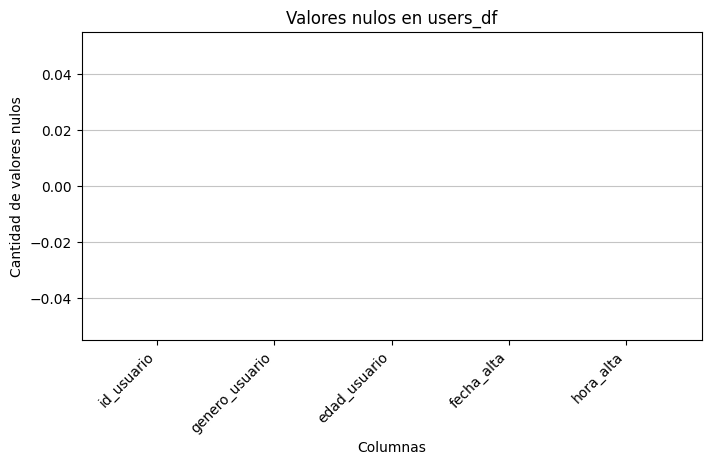

In [7]:
# Exploraci√≥n de valores nulos
plt.figure(figsize=(8, 4))
plt.grid(axis='y', alpha=0.75)
plt.bar(users_df.columns, users_df.isnull().sum(), align='center', zorder=2)
plt.xticks(rotation=45, ha='right')
plt.title('Valores nulos en users_df')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores nulos')
plt.show()

In [8]:
# Usuarios duplicados
duplicated_users = users_df[users_df.duplicated(subset='id_usuario', keep=False)]
print(f"Cantidad de usuarios duplicados: {duplicated_users['id_usuario'].nunique()}")
duplicated_users.sort_values(by='id_usuario').head(10)

Cantidad de usuarios duplicados: 0


Empty DataFrame
Columns: [id_usuario, genero_usuario, edad_usuario, fecha_alta, hora_alta]
Index: []

##### Exploraci√≥n de generos

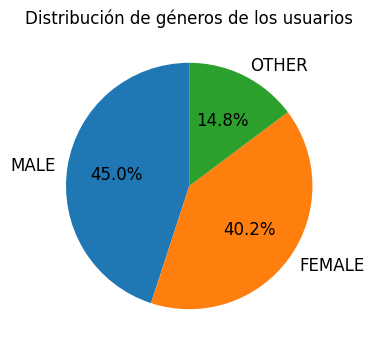

In [9]:
# Pie chart de los g√©neros de usuarios
plt.figure(figsize=(4, 4))
users_df['genero_usuario'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, fontsize=12)
plt.title('Distribuci√≥n de g√©neros de los usuarios')
plt.ylabel('')
plt.show()

In [10]:
# Conteo de usuarios por g√©nero
gender_counts = users_df['genero_usuario'].value_counts()
print(gender_counts)

genero_usuario
MALE      88656
FEMALE    79310
OTHER     29113
Name: count, dtype: int64


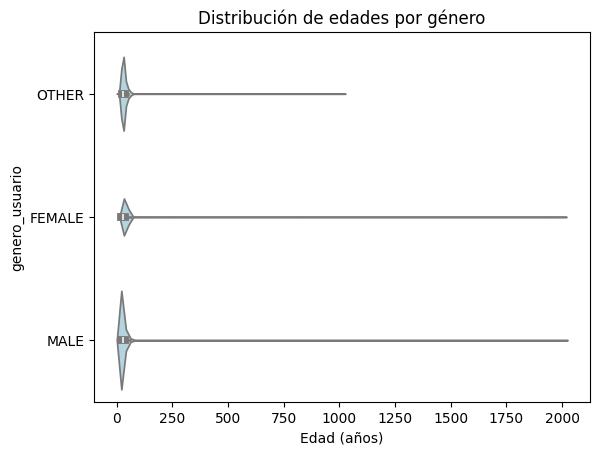

In [11]:
sns.violinplot(y=users_df['genero_usuario'], x=users_df['edad_usuario'], color='lightblue', inner='box')
plt.title('Distribuci√≥n de edades por g√©nero')
plt.xlabel('Edad (a√±os)')
plt.show()

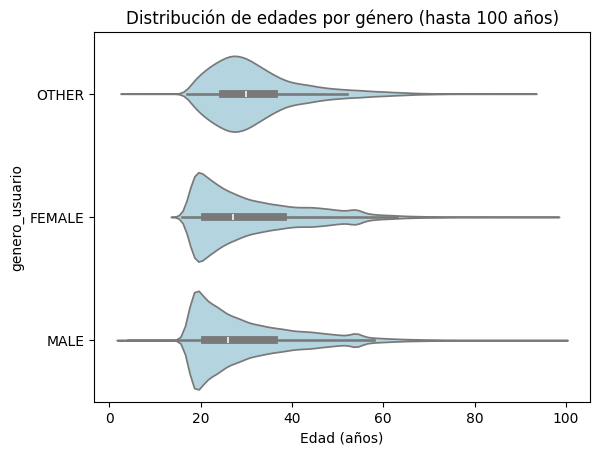

In [12]:
# Violin de edades por g√©nero (edades hasta 100 a√±os)
mask_edad = users_df['edad_usuario'] <= 100
sns.violinplot(y=users_df['genero_usuario'][mask_edad], x=users_df['edad_usuario'][mask_edad], color='lightblue', inner='box')
plt.title('Distribuci√≥n de edades por g√©nero (hasta 100 a√±os)')
plt.xlabel('Edad (a√±os)')
plt.show()

##### Exploraci√≥n de edades

In [13]:
# Edades de usuarios menores de 18 a√±os
users_df[users_df['edad_usuario'] < 18].value_counts('edad_usuario').sort_index()

edad_usuario
4      2
5      4
15     3
16     7
17    16
Name: count, dtype: int64

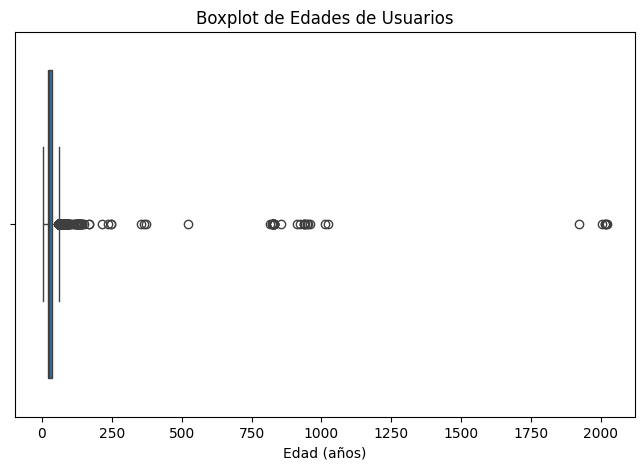

In [14]:
# Boxplot de edades
plt.figure(figsize=(8, 5))
sns.boxplot(x=users_df['edad_usuario'])
plt.title('Boxplot de Edades de Usuarios')
plt.xlabel('Edad (a√±os)')
plt.show()

In [15]:
# Cuartiles en a√±os
Q1 = users_df['edad_usuario'].quantile(0.25)
Q2 = users_df['edad_usuario'].quantile(0.50)
Q3 = users_df['edad_usuario'].quantile(0.75)
IQR = Q3 - Q1

print("Q1 (25%):", Q1)
print("Q2 (Mediana, 50%):", Q2)
print("Q3 (75%):", Q3)
print("IQR (Rango Intercuart√≠lico):", IQR)

Q1 (25%): 21.0
Q2 (Mediana, 50%): 27.0
Q3 (75%): 37.0
IQR (Rango Intercuart√≠lico): 16.0


In [16]:
# Media moda mediana de edades (en a√±os)
mean = users_df['edad_usuario'].mean().round(2)
median = users_df['edad_usuario'].median().round(2)
mode = users_df['edad_usuario'].mode()[0].round(2)
var = users_df['edad_usuario'].var().round(2)
std_dev = users_df['edad_usuario'].std().round(2)

print(f"Media: {mean} a√±os")
print(f"Mediana: {median} a√±os")
print(f"Moda: {mode} a√±os")
print(f"Varianza: {var} a√±os¬≤")
print(f"Desviaci√≥n est√°ndar: {std_dev} a√±os")

Media: 30.76 a√±os
Mediana: 27.0 a√±os
Moda: 18 a√±os
Varianza: 357.07 a√±os¬≤
Desviaci√≥n est√°ndar: 18.9 a√±os


In [17]:
print(f"As√≠metr√≠a de edad: {users_df['edad_usuario'].skew()}")
print(f"Curtosis de edad: {users_df['edad_usuario'].kurtosis()}")

As√≠metr√≠a de edad: 47.583628237635786
Curtosis de edad: 4173.90573483157


La edad de usuario es altamente asim√©trica:
- Tiene muchos valores bajos
- Tiene pocos valores extremadamente altos (estiran la cola a derecha)

La edad de usuario tiene una curtosis muy alta:
- Tiene una distribuci√≥n 'picuda'
- Tiene una cola bien pesada

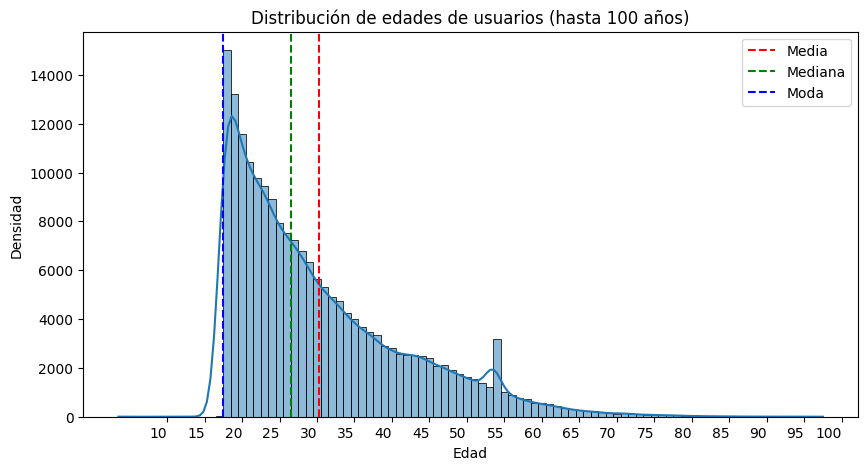

In [18]:
# Histograma de edades (hasta 100 a√±os)
mask_edad = users_df['edad_usuario'] <= 100
plt.figure(figsize=(10, 5))
ax = sns.histplot(users_df[mask_edad]['edad_usuario'], kde=True, binwidth=1)
ticks = [t + 0.5 for t in range(10, 101, 5)]  # Esto es para centrar los bines en los ticks
ax.xaxis.set_major_locator(FixedLocator(ticks))
ax.set_xticklabels([str(int(tick)) for tick in ticks], ha='right')
plt.title('Distribuci√≥n de edades de usuarios (hasta 100 a√±os)')
plt.xlabel('Edad')
plt.ylabel('Densidad')

# Media, moda y mediana
ax.axvline(mean, color='r', linestyle='--', label='Media')
ax.axvline(median, color='g', linestyle='--', label='Mediana')
ax.axvline(mode, color='b', linestyle='--', label='Moda')
ax.legend()

plt.show()


Text(0, 0.5, 'Densidad')

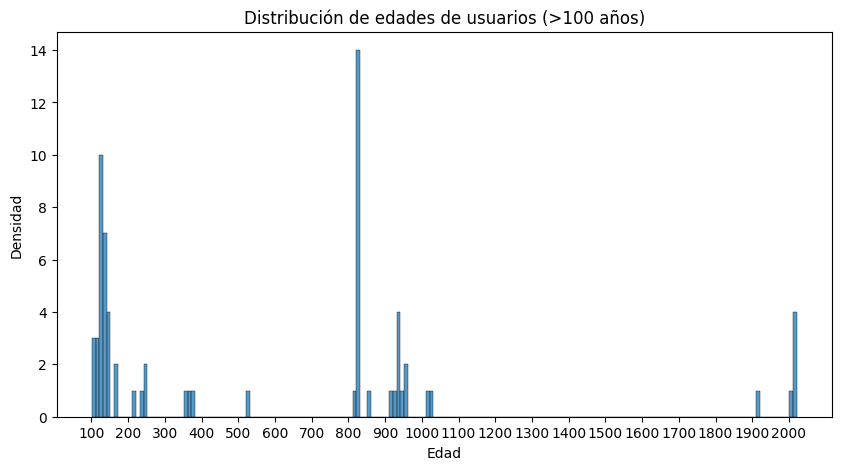

In [19]:
# Histograma de edades de mas de 100 a√±os
mask_edad = users_df["edad_usuario"] > 100
plt.figure(figsize=(10, 5))
sns.histplot(users_df[mask_edad]['edad_usuario'], binwidth=10)
plt.title('Distribuci√≥n de edades de usuarios (>100 a√±os)')
plt.xticks(range(100, users_df['edad_usuario'].max() + 1, 100))
plt.xlabel('Edad')
plt.ylabel('Densidad')

In [20]:
# 10 usuarios mas 'viejos'
users_df.sort_values(by='edad_usuario', ascending=False).head(10)

id_usuario genero_usuario  edad_usuario  fecha_alta hora_alta
56690      1109473           MALE          2021  2024-02-11  20:24:45
104417     1238144           MALE          2019  2024-10-27  20:08:47
124365     1130915         FEMALE          2016  2024-03-21  21:19:50
184254     1202670           MALE          2016  2024-09-07  18:39:34
66885      1189702         FEMALE          2004  2024-08-09  22:34:35
10936      1150325         FEMALE          1921  2024-04-29  13:33:57
137312     1277262          OTHER          1022  2024-12-27  13:11:42
62421      1167228           MALE          1012  2024-06-16  15:20:11
18616      1199423          OTHER           960  2024-09-02  17:37:56
92904      1279416          OTHER           952  2024-12-30  09:20:27

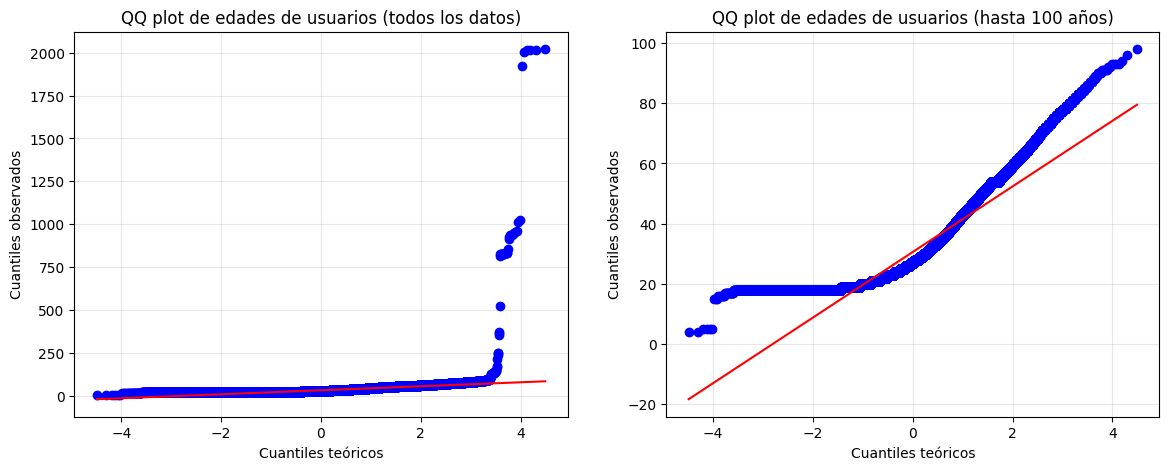

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# QQ plot con todos los datos de edad
stats.probplot(users_df['edad_usuario'], dist="norm", plot=ax1)
ax1.set_title('QQ plot de edades de usuarios (todos los datos)', fontsize=12)
ax1.set_xlabel('Cuantiles te√≥ricos')
ax1.set_ylabel('Cuantiles observados')
ax1.grid(alpha=0.3)

# QQ plot solo con edades hasta 100 a√±os
mask_edad = users_df['edad_usuario'] <= 100
stats.probplot(users_df[mask_edad]['edad_usuario'], dist="norm", plot=ax2)
ax2.set_title('QQ plot de edades de usuarios (hasta 100 a√±os)', fontsize=12)
ax2.set_xlabel('Cuantiles te√≥ricos')
ax2.set_ylabel('Cuantiles observados')
ax2.grid(alpha=0.3)

plt.show()

El QQ plot muestra
- Clara desviaci√≥n respecto a la normalidad
- Cola pesada
- Muchas edades peque√±as y pocas edades muy grandes

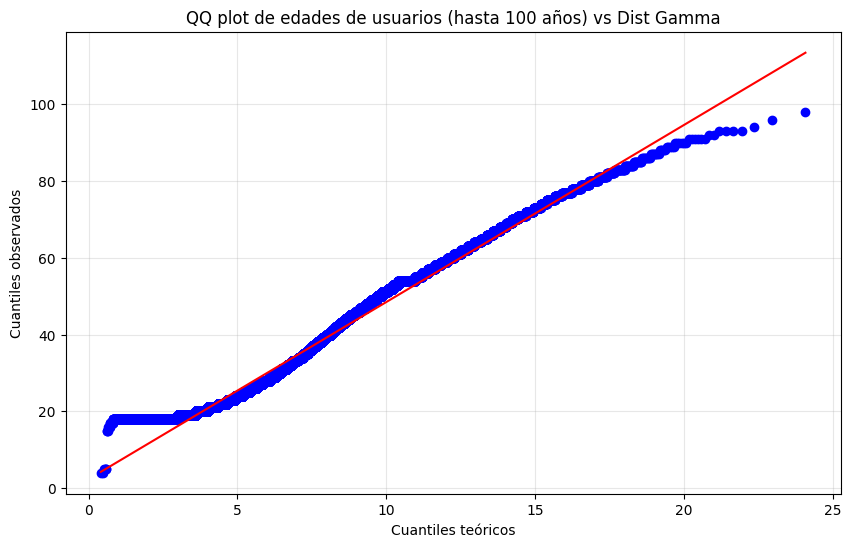

In [22]:
# QQ plot contra distribuci√≥n Gamma
mask_edad = users_df['edad_usuario'] <= 100

a, loc, scale = stats.gamma.fit(users_df[mask_edad]['edad_usuario'])

fig, ax = plt.subplots(figsize=(10, 6))
stats.probplot(users_df[mask_edad]['edad_usuario'], dist=stats.gamma, sparams=(a,), plot=ax)
ax.set_title('QQ plot de edades de usuarios (hasta 100 a√±os) vs Dist Gamma', fontsize=12)
ax.set_xlabel('Cuantiles te√≥ricos')
ax.set_ylabel('Cuantiles observados')
ax.grid(alpha=0.3)
plt.show()

##### Exploraci√≥n de fecha y hora de alta

In [23]:
# Parseo de columnas de fecha y hora
users_df['fecha_alta_dt'] = pd.to_datetime(users_df['fecha_alta'], errors='coerce')
users_df['hora_alta_dt'] = pd.to_datetime(users_df['hora_alta'], format='%H:%M:%S', errors='coerce').dt.time
users_df['dia_semana'] = users_df['fecha_alta_dt'].dt.day_name()

In [24]:
# 10 fechas de alta mas repetidas
users_df['fecha_alta_dt'].value_counts().head(10)

fecha_alta_dt
2024-11-09    1720
2024-05-09    1315
2024-10-11    1278
2024-09-29    1197
2024-10-27    1154
2024-11-10    1128
2024-11-18    1119
2024-09-08    1076
2024-01-24    1062
2024-09-15    1041
Name: count, dtype: int64

In [25]:
# 10 horas de alta mas repetidas
users_df['hora_alta_dt'].apply(lambda x: x.hour).value_counts().head(10)

hora_alta_dt
16    18531
15    17762
17    17386
14    15614
18    14997
13    14042
12    13425
11    11756
19    11261
10     8984
Name: count, dtype: int64

In [26]:
# Altas por dia de la semana
users_df['dia_semana'].value_counts()

dia_semana
Sunday       31073
Saturday     28801
Monday       28599
Thursday     27978
Friday       27115
Tuesday      26841
Wednesday    26672
Name: count, dtype: int64

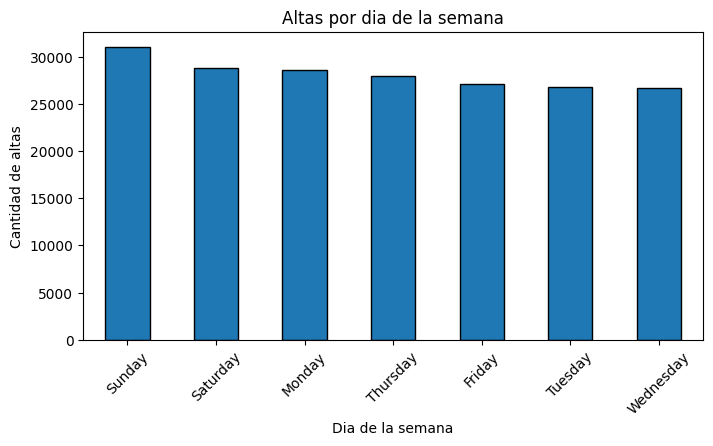

In [27]:
# Bar chart de altas por dia de la semana
plt.figure(figsize=(8, 4))
users_df['dia_semana'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Altas por dia de la semana')
plt.xlabel('Dia de la semana')
plt.ylabel('Cantidad de altas')
plt.xticks(rotation=45)
plt.show()

# Dataset de recorridos (CSV)
Contiene informaci√≥n de los viajes realizados.

In [28]:
rides_df.info()
# duracion_recorrido est√° en segundos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560404 entries, 0 to 3560403
Data columns (total 17 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   id_recorrido                int64  
 1   duracion_recorrido          int64  
 2   fecha_origen_recorrido      object 
 3   id_estacion_origen          int64  
 4   nombre_estacion_origen      object 
 5   direccion_estacion_origen   object 
 6   long_estacion_origen        float64
 7   lat_estacion_origen         float64
 8   fecha_destino_recorrido     object 
 9   id_estacion_destino         int64  
 10  nombre_estacion_destino     object 
 11  direccion_estacion_destino  object 
 12  long_estacion_destino       float64
 13  lat_estacion_destino        float64
 14  id_usuario                  float64
 15  modelo_bicicleta            object 
 16  genero                      object 
dtypes: float64(5), int64(4), object(8)
memory usage: 461.8+ MB


In [29]:
rides_df.head()

id_recorrido  duracion_recorrido fecha_origen_recorrido  \
0      24496816                  17    2024-12-31 08:18:58   
1      24492524                   2    2024-12-30 19:21:45   
2      24493951                   0    2024-12-30 21:08:03   
3      24494848                6575    2024-12-30 23:22:17   
4      24495039                3162    2024-12-30 23:52:00   

   id_estacion_origen     nombre_estacion_origen  \
0                 202  001 - FACULTAD DE DERECHO   
1                 251     388 - Plaza Jose C Paz   
2                 418        345 - Plaza Mafalda   
3                 177            177 -PLANETARIO   
4                 359                250 - Fleni   

              direccion_estacion_origen  long_estacion_origen  \
0       Av. Pres. Figueroa Alcorta 2120            -58.390602   
1           Dr. Prof. Pedro Chutro 2881            -58.402483   
2             Conde & Concepci√≥n Arenal            -58.444580   
3  Av. Belisario Rold√°n y Av. Sarmiento            -58.411598   
4                       2292 Monta√±eses            -58.450479   

   lat_estacion_origen fecha_destino_recorrido  id_estacion_destino  \
0           -34.583749     2024-12-31 08:19:15                  202   
1           -34.641728     2024-12-30 19:21:47                   41   
2           -34.580938                     NaN                  418   
3           -34.571079     2024-12-31 01:11:52                  336   
4           -34.555602     2024-12-31 00:44:42                   85   

     nombre_estacion_destino                  direccion_estacion_destino  \
0  001 - FACULTAD DE DERECHO             Av. Pres. Figueroa Alcorta 2120   
1  041 - PARQUE PATRICIOS II                             Av Caseros 3015   
2        345 - Plaza Mafalda                   Conde & Concepci√≥n Arenal   
3       207 - PLAZA ARENALES                             Nueva York 3949   
4               085 - AGUERO  Aguero & Mansilla, Lucio Norberto, General   

   long_estacion_destino  lat_estacion_destino  id_usuario modelo_bicicleta  \
0             -58.390602            -34.583749   1166678.0              FIT   
1             -58.405888            -34.637123   1133415.0              FIT   
2             -58.444580            -34.580938   1158360.0           ICONIC   
3             -58.511146            -34.599731   1224331.0              FIT   
4             -58.409178            -34.594806   1280053.0           ICONIC   

   genero  
0  FEMALE  
1  FEMALE  
2  FEMALE  
3  FEMALE  
4  FEMALE

In [30]:
rides_df.describe()

id_recorrido  duracion_recorrido  id_estacion_origen  \
count  3.560404e+06        3.560404e+06        3.560404e+06   
mean   2.234132e+07        1.274680e+03        2.355957e+02   
std    1.257073e+06        9.582717e+03        1.657999e+02   
min    2.018097e+07        0.000000e+00        2.000000e+00   
25%    2.123866e+07        4.930000e+02        9.300000e+01   
50%    2.235131e+07        8.810000e+02        1.990000e+02   
75%    2.343700e+07        1.473000e+03        3.780000e+02   
max    2.450328e+07        2.571165e+06        5.770000e+02   

       long_estacion_origen  lat_estacion_origen  id_estacion_destino  \
count          3.560404e+06         3.560404e+06         3.560404e+06   
mean          -5.842302e+01        -3.459877e+01         2.371506e+02   
std            3.830469e-02         2.441487e-02         1.657100e+02   
min           -5.852710e+01        -3.468777e+01         2.000000e+00   
25%           -5.844965e+01        -3.461635e+01         9.600000e+01   
50%           -5.842095e+01        -3.460028e+01         2.000000e+02   
75%           -5.839374e+01        -3.458255e+01         3.790000e+02   
max           -5.835547e+01        -3.453669e+01         5.770000e+02   

       long_estacion_destino  lat_estacion_destino    id_usuario  
count           3.560404e+06          3.560404e+06  3.560404e+06  
mean           -5.842318e+01         -3.459896e+01  7.908728e+05  
std             3.848631e-02          2.477407e-02  3.881981e+05  
min            -5.852710e+01         -3.468777e+01  2.400000e+01  
25%            -5.844966e+01         -3.461649e+01  5.118240e+05  
50%            -5.842095e+01         -3.460075e+01  9.131670e+05  
75%            -5.839374e+01         -3.458234e+01  1.113537e+06  
max            -5.835547e+01         -3.453669e+01  1.280599e+06

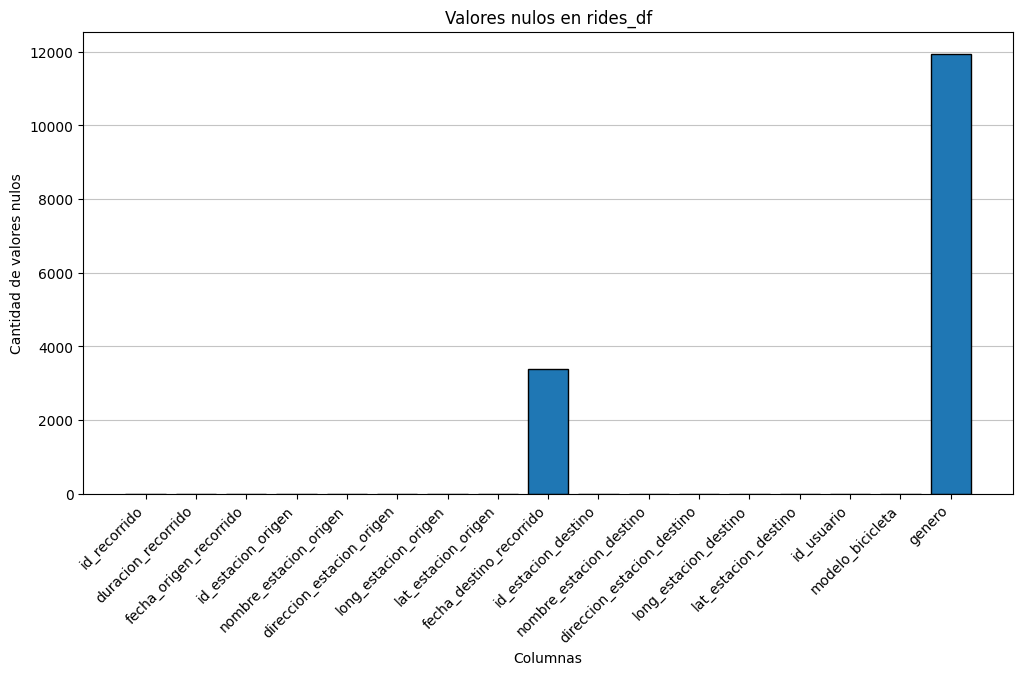

In [31]:
# Exploraci√≥n de valores nulos
plt.figure(figsize=(12, 6))
plt.grid(axis='y', alpha=0.75)
plt.bar(rides_df.columns, rides_df.isnull().sum(), align='center', zorder=2, edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.title('Valores nulos en rides_df')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores nulos')
plt.show()

##### Exploraci√≥n de duraciones de recorrido

In [32]:
rides_df['duracion_recorrido_min'] = rides_df['duracion_recorrido'] / 60

In [33]:
# Recorrido mas largo en d√≠as
print(f"Recorrido m√°s largo: {round(rides_df['duracion_recorrido'].max()/3600/24, 2)} d√≠as")

Recorrido m√°s largo: 29.76 d√≠as


In [34]:
# Recorrido mas corto en minutos
print(f"Recorrido m√°s corto: {round(rides_df['duracion_recorrido_min'].min(), 2)} minutos")

# Recorrido mas largo en minutos
print(f"Recorrido m√°s largo: {round(rides_df['duracion_recorrido_min'].max(), 2)} minutos")

Recorrido m√°s corto: 0.0 minutos
Recorrido m√°s largo: 42852.75 minutos


In [35]:
# El usuario que m√°s tiempo us√≥ las bicicletas
user_durations = rides_df.groupby('id_usuario')['duracion_recorrido'].sum()
max_user_id = user_durations.idxmax()
max_user_duration = user_durations.max()

print(f"Usuario m√°s activo: {max_user_duration/3600:.2f} hs")

Usuario m√°s activo: 738.33 hs


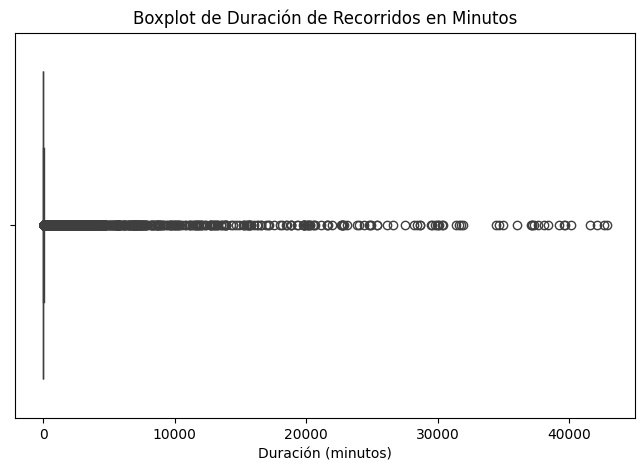

In [36]:
# Boxplot de duracion de recorridos en minutos
plt.figure(figsize=(8, 5))
sns.boxplot(x=rides_df['duracion_recorrido_min'])
plt.title('Boxplot de Duraci√≥n de Recorridos en Minutos')
plt.xlabel('Duraci√≥n (minutos)')
plt.show()

In [37]:
# Cuartiles en minutos
Q1 = rides_df['duracion_recorrido_min'].quantile(0.25)
Q2 = rides_df['duracion_recorrido_min'].quantile(0.50)
Q3 = rides_df['duracion_recorrido_min'].quantile(0.75)
IQR = Q3 - Q1

print("Q1 (25%):", Q1)
print("Q2 (Mediana, 50%):", Q2)
print("Q3 (75%):", Q3)
print("IQR (Rango Intercuart√≠lico):", IQR)

Q1 (25%): 8.216666666666667
Q2 (Mediana, 50%): 14.683333333333334
Q3 (75%): 24.55
IQR (Rango Intercuart√≠lico): 16.333333333333336


In [38]:
# Media moda mediana de duraciones (en minutos)
mean = rides_df['duracion_recorrido_min'].mean().round(2)
median = rides_df['duracion_recorrido_min'].median().round(2)
mode = rides_df['duracion_recorrido_min'].mode()[0].round(2)
var = rides_df['duracion_recorrido_min'].var().round(2)
std_dev = rides_df['duracion_recorrido_min'].std().round(2)

print(f"Media: {mean} min")
print(f"Mediana: {median} min")
print(f"Moda: {mode} min")
print(f"Varianza: {var} min¬≤")
print(f"Desviaci√≥n est√°ndar: {std_dev} min")

Media: 21.24 min
Mediana: 14.68 min
Moda: 0.03 min
Varianza: 25507.91 min¬≤
Desviaci√≥n est√°ndar: 159.71 min


In [39]:
print(f"As√≠metr√≠a de duracion: {rides_df['duracion_recorrido_min'].skew():.2f}")
print(f"Curtosis de duracion: {rides_df['duracion_recorrido_min'].kurtosis():.2f}")

As√≠metr√≠a de duracion: 156.24
Curtosis de duracion: 30117.53


La duraci√≥n de recorridos es altamente asim√©trica:
- Tiene muchos valores bajos
- Tiene pocos valores extremadamente altos (estiran la cola a derecha)

La duraci√≥n de recorridos tiene una curtosis muy alta:
- Tiene una distribuci√≥n 'picuda'
- Tiene una cola bien pesada

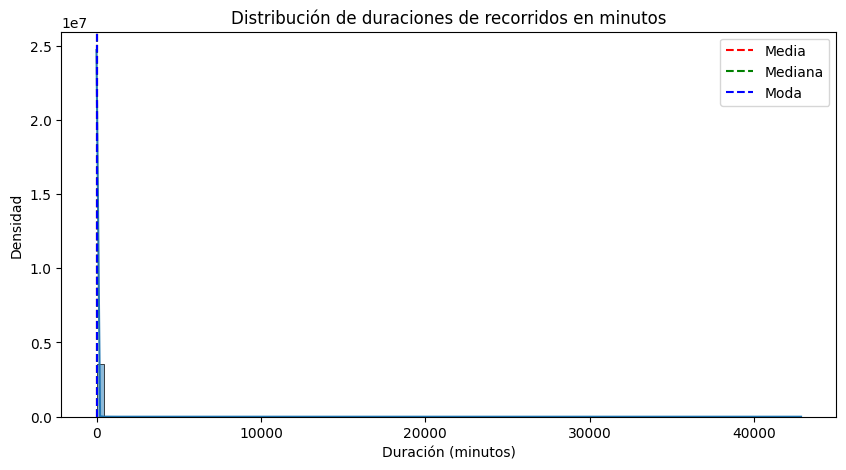

In [40]:
# Histograma de duraciones de recorridos en minutos
plt.figure(figsize=(10, 5))
ax =sns.histplot(rides_df['duracion_recorrido_min'], bins=100, kde=True)
plt.title('Distribuci√≥n de duraciones de recorridos en minutos')
plt.xlabel('Duraci√≥n (minutos)')
plt.ylabel('Densidad')

# Media, moda y mediana
ax.axvline(mean, color='r', linestyle='--', label='Media')
ax.axvline(median, color='g', linestyle='--', label='Mediana')
ax.axvline(mode, color='b', linestyle='--', label='Moda')
ax.legend()

plt.show()

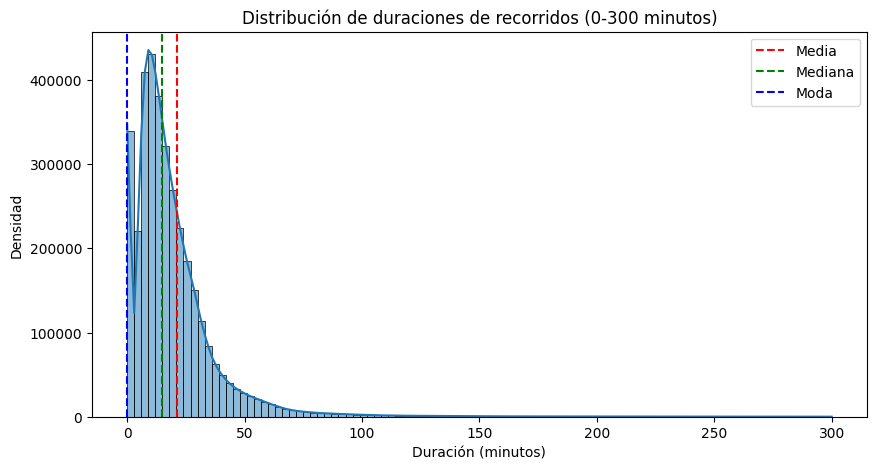

In [41]:
# Histograma de duraciones de recorridos en minutos (>0 y < 300)
mask_duration = (rides_df['duracion_recorrido_min'] > 0) & (rides_df['duracion_recorrido_min'] < 300)
plt.figure(figsize=(10, 5))
ax = sns.histplot(rides_df[mask_duration]['duracion_recorrido_min'], bins=100, kde=True)
plt.title('Distribuci√≥n de duraciones de recorridos (0-300 minutos)')
plt.xlabel('Duraci√≥n (minutos)')
plt.ylabel('Densidad')

# Media, moda y mediana
ax.axvline(mean, color='r', linestyle='--', label='Media')
ax.axvline(median, color='g', linestyle='--', label='Mediana')
ax.axvline(mode, color='b', linestyle='--', label='Moda')
ax.legend()

plt.show()

##### Exploraci√≥n de fecha origen de recorrido

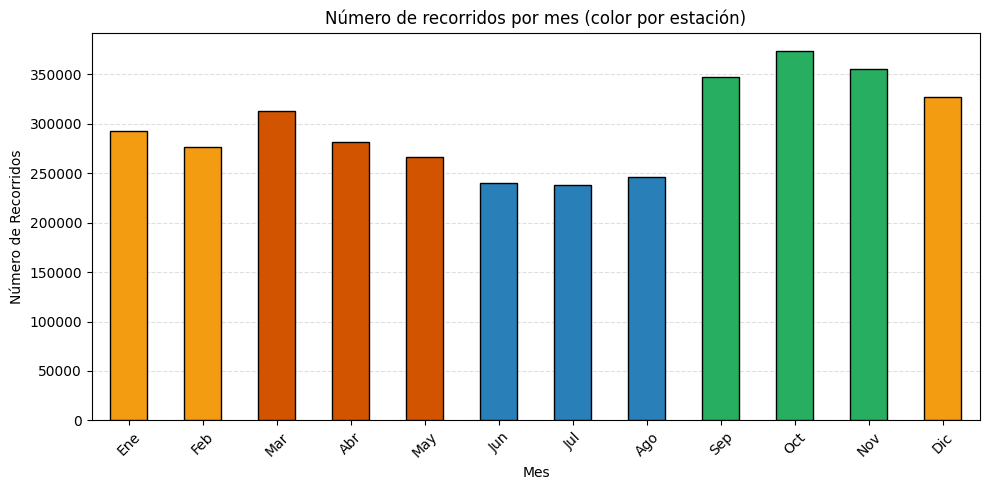

In [42]:
rides_df['fecha_origen_recorrido'] = pd.to_datetime(rides_df['fecha_origen_recorrido'])
rides_df['mes'] = rides_df['fecha_origen_recorrido'].dt.month

counts = rides_df['mes'].value_counts().reindex(range(1,13), fill_value=0).sort_index()

# Verano: Dic-Ene-Feb; Oto√±o: Mar-Abr-May; Invierno: Jun-Jul-Ago; Primavera: Sep-Oct-Nov
season_of = {12:'verano', 1:'verano', 2:'verano',
             3:'oto√±o', 4:'oto√±o', 5:'oto√±o',
             6:'invierno', 7:'invierno', 8:'invierno',
             9:'primavera', 10:'primavera', 11:'primavera'}
palette = {'verano':'#F39C12', 'oto√±o':'#D35400', 'invierno':'#2980B9', 'primavera':'#27AE60'}
colors = [palette[season_of[m]] for m in counts.index]

fig, ax = plt.subplots(figsize=(10, 5))
counts.plot(kind='bar', ax=ax, color=colors, edgecolor='black', zorder=3)

ax.grid(axis='y', linestyle='--', alpha=0.4, zorder=0)
ax.set_axisbelow(True)

ax.set_title('N√∫mero de recorridos por mes (color por estaci√≥n)')
ax.set_xlabel('Mes'); ax.set_ylabel('N√∫mero de Recorridos')
ax.set_xticks(range(12))
ax.set_xticklabels(['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic'], rotation=45)

plt.tight_layout()
plt.show()


In [43]:
# Dia de la semana con m√°s recorridos
rides_df['dia_semana_origen_recorrido'] = rides_df['fecha_origen_recorrido'].dt.day_name()
print(f"D√≠a de la semana con m√°s recorridos: {rides_df['dia_semana_origen_recorrido'].value_counts().idxmax()} con {rides_df['dia_semana_origen_recorrido'].value_counts().max()} recorridos")

D√≠a de la semana con m√°s recorridos: Thursday con 641452 recorridos


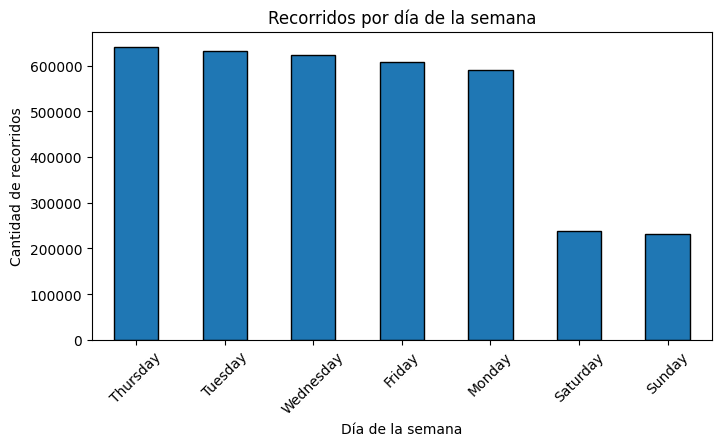

In [44]:
# Bar chart de recorridos por dia de la semana
plt.figure(figsize=(8, 4))
rides_df['dia_semana_origen_recorrido'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Recorridos por d√≠a de la semana')
plt.xlabel('D√≠a de la semana')
plt.ylabel('Cantidad de recorridos')
plt.xticks(rotation=45)
plt.show()

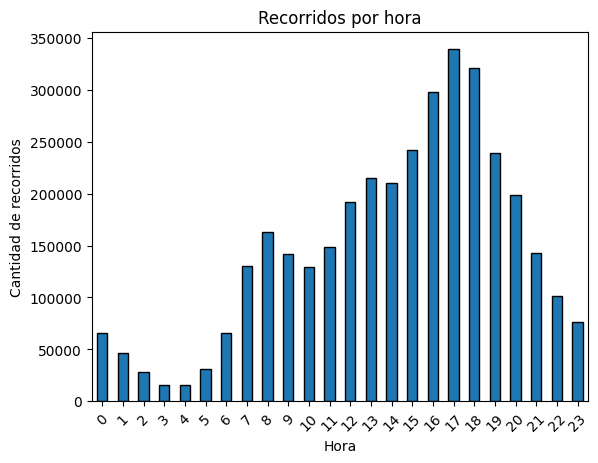

In [45]:
# Recorridos por hora
rides_df['hora_origen_recorrido'] = pd.to_datetime(rides_df['fecha_origen_recorrido'], format='%H:%M:%S', errors='coerce').dt.hour
rides_df['hora_origen_recorrido'].value_counts().sort_index().plot(kind='bar', edgecolor='black')
plt.title('Recorridos por hora')
plt.xlabel('Hora')
plt.ylabel('Cantidad de recorridos')
plt.xticks(rotation=45)
plt.show()

##### Exploraci√≥n de estaciones

In [46]:
# Estaciones m√°s usadas para iniciar recorridos
origin_top_stations = rides_df['nombre_estacion_origen'].value_counts().sort_values(ascending=False).head(5)
print(origin_top_stations)

nombre_estacion_origen
147 - Constituci√≥n           38284
014 - Pacifico               37594
368 - PLAZA DE LA SHO√Å       37201
005 - Plaza Italia           34547
001 - FACULTAD DE DERECHO    30955
Name: count, dtype: int64


In [47]:
# Estaciones m√°s usadas para terminar recorridos
destination_top_stations = rides_df['nombre_estacion_destino'].value_counts().sort_values(ascending=False).head(5)
print(destination_top_stations)

nombre_estacion_destino
147 - Constituci√≥n           38363
368 - PLAZA DE LA SHO√Å       37425
014 - Pacifico               37278
005 - Plaza Italia           34607
001 - FACULTAD DE DERECHO    30897
Name: count, dtype: int64


In [48]:
# Mapa
caba_coords = [-34.6037, -58.3816]
m = folium.Map(location=caba_coords, zoom_start=13, tiles='OpenStreetMap')

# Origenes
cols_ori = ['nombre_estacion_origen', 'lat_estacion_origen', 'long_estacion_origen']
coords = (rides_df[rides_df['nombre_estacion_origen'].isin(origin_top_stations.index)]
          [cols_ori].dropna().drop_duplicates('nombre_estacion_origen'))

for _, r in coords.iterrows():
    nombre, lat, lon = r['nombre_estacion_origen'], float(r['lat_estacion_origen']), float(r['long_estacion_origen'])
    
    folium.Marker([lat, lon], popup=nombre, tooltip=nombre,
                  icon=folium.Icon(color='green', icon='play', prefix='fa')).add_to(m)
    
    folium.Marker([lat, lon],
        icon=folium.DivIcon(
            html=f'<div style="transform:translate(12px,-18px);'
             'background:#fff;border:1px solid rgba(0,0,0,.2);border-radius:4px;'
             'padding:2px 6px;font-size:12px;font-weight:700;color:#000;'
             'display:inline-block;max-width:180px;white-space:nowrap;'
             'overflow:hidden;text-overflow:ellipsis;pointer-events:none;">'
             f'{nombre}</div>'
        )
    ).add_to(m)

m.save('mapa_caba_top_estaciones_orig.html')

In [49]:
# Mapa
caba_coords = [-34.6037, -58.3816]
m = folium.Map(location=caba_coords, zoom_start=13, tiles='OpenStreetMap')

# Destinos
cols_dest = ['nombre_estacion_destino', 'lat_estacion_destino', 'long_estacion_destino']
coords_dest = (rides_df[rides_df['nombre_estacion_destino'].isin(destination_top_stations.index)]
               [cols_dest].dropna().drop_duplicates('nombre_estacion_destino'))

for _, r in coords_dest.iterrows():
    nombre, lat, lon = r['nombre_estacion_destino'], float(r['lat_estacion_destino']), float(r['long_estacion_destino'])
    folium.Marker([lat, lon], popup=nombre, tooltip=nombre,
                  icon=folium.Icon(color='red', icon='flag-checkered', prefix='fa')).add_to(m)
    folium.Marker([lat, lon],
        icon=folium.DivIcon(
            html=f'<div style="transform:translate(12px,-18px);'
             'background:#fff;border:1px solid rgba(0,0,0,.2);border-radius:4px;'
             'padding:2px 6px;font-size:12px;font-weight:700;color:#000;'
             'display:inline-block;max-width:180px;white-space:nowrap;'
             'overflow:hidden;text-overflow:ellipsis;pointer-events:none;">'
             f'{nombre}</div>'
        )
    ).add_to(m)

m.save('mapa_caba_top_estaciones_dest.html')

In [50]:
# Estaciones menos usadas para iniciar recorridos
origin_bottom_stations = rides_df['nombre_estacion_origen'].value_counts().sort_values(ascending=True).head(5)
print(origin_bottom_stations)

nombre_estacion_origen
040 - HERRERA    258
125 - BILBAO     268
327 - IBERA      331
321 - EZEIZA     360
326 - PICO       385
Name: count, dtype: int64


In [51]:
# Estaciones menos usadas para terminar recorridos
destination_bottom_stations = rides_df['nombre_estacion_destino'].value_counts().sort_values(ascending=True).head(5)
print(destination_bottom_stations)

nombre_estacion_destino
-- CDO Chacarita -- (Temporal)      2
363 - Udaondo                       9
291 - REPARACION DE K7             11
125 - BILBAO                      272
040 - HERRERA                     283
Name: count, dtype: int64


##### Exploraci√≥n de usuarios de recorridos

In [52]:
rides_df['id_usuario'] = rides_df['id_usuario'].astype('Int64')

In [53]:
# Usuario que m√°s recorridos hizo
top_user = rides_df['id_usuario'].value_counts().idxmax()
print(f"Usuario que m√°s recorridos hizo: ID {top_user} con {rides_df['id_usuario'].value_counts().max()} recorridos")

Usuario que m√°s recorridos hizo: ID 844251 con 8488 recorridos


##### Exploraci√≥n de modelo de bicicleta
No aporta informaci√≥n significativa

In [54]:
rides_df['modelo_bicicleta'].value_counts()

modelo_bicicleta
FIT       2583213
ICONIC     977191
Name: count, dtype: int64

##### Exploraci√≥n de g√©neros (en recorridos, algunos no tienen g√©nero asociado)

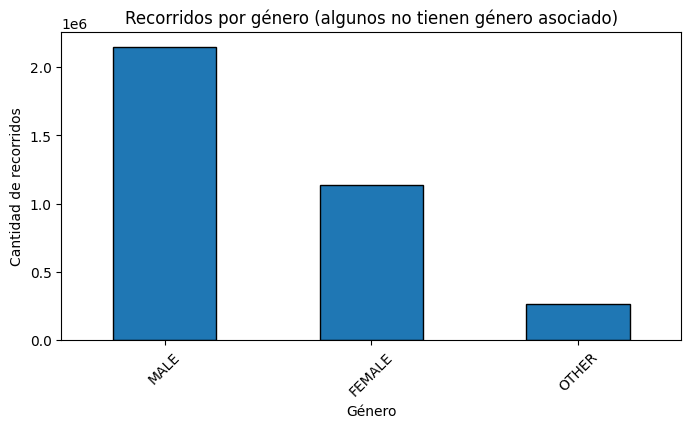

In [55]:
# Bar chart de recorridos por genero
plt.figure(figsize=(8, 4))
rides_df['genero'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Recorridos por g√©nero (algunos no tienen g√©nero asociado)')
plt.xlabel('G√©nero')
plt.ylabel('Cantidad de recorridos')
plt.xticks(rotation=45)
plt.show()

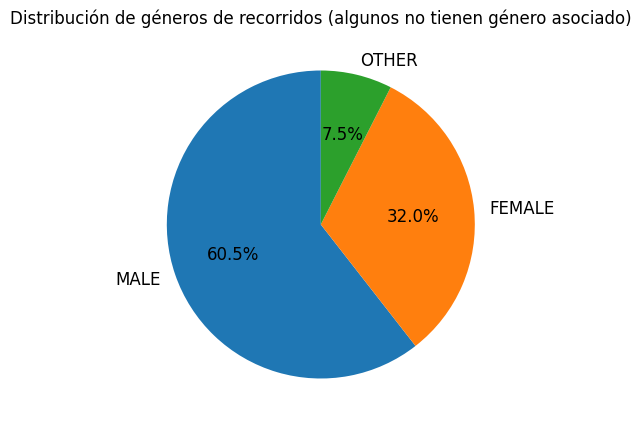

In [56]:
# Pie chart de generos de los recorridos (algunos recorridos no tienen g√©nero asociado)
plt.figure(figsize=(5, 5))
rides_df['genero'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, fontsize=12)
plt.title('Distribuci√≥n de g√©neros de recorridos (algunos no tienen g√©nero asociado)')
plt.ylabel('')
plt.show()

### Merge datasets usuarios + recorridos?

In [57]:
# Cu√°ntos usuarios de rides_df est√°n en users_df?
np.isin(rides_df['id_usuario'], users_df['id_usuario']).sum()

np.int64(1136610)

No resulta √∫til unir ambos datasets, ya que m√°s de un mill√≥n de recorridos no tienen `id_usuario` asociado.<br>
Esto se debe a que el dataset de usuarios 2024 solo incluye altas realizadas en ese a√±o, mientras que el dataset de recorridos 2024 tambi√©n contiene viajes de usuarios que se registraron en a√±os anteriores.<br>
<br>
**Por eso se van a tratar ambos datasets de forma separada.**

# Split de los datasets

### Estrategia de partici√≥n para el dataset de recorridos

Se realiza un **split aleatorio** en lugar de un split temporal, por las siguientes razones:
- Datos √∫nicamente de 2024 (un solo a√±o)
- Existe fuerte estacionalidad intra-anual (m√°s viajes en primavera/verano, menos en invierno)
- No se cuenta con datos hist√≥ricos de a√±os anteriores o posteriores

**Justificaci√≥n del split aleatorio:**
1. **Evita sesgo estacional**: Un split temporal (por ej.: 80% primeros meses ‚Üí 20% √∫ltimos meses) har√≠a que train y test tengan distribuciones estacionales diferentes, sesgando la evaluaci√≥n.

2. **Representatividad**: El shuffle garantiza que tanto train como test contengan datos de todas las estaciones del a√±o, manteniendo la distribuci√≥n temporal.

3. **No hay generalizaci√≥n temporal**: Como solo tenemos un a√±o, no podemos evaluar predicci√≥n hacia el futuro (2025 en adelante). El objetivo en este dataset es evaluar la capacidad de generalizaci√≥n del modelo sobre patrones intra-anuales, no sobre datos futuros desconocidos.

<br>

**Nota: Si en el futuro se incorporan datos de m√∫ltiples a√±os, ser√≠a apropiado usar un split temporal (entrenar con a√±os 2022-2023, testear con 2024) para evaluar capacidad predictiva sobre el futuro, y evitando data leakage.**

In [58]:
TEST_PROPORTION = 0.2  # 20% para test
RANDOM_SEED = 25

In [59]:
users_df_train, users_df_test = train_test_split(users_df,
                                                 test_size=TEST_PROPORTION,
                                                 shuffle=True,
                                                 random_state=RANDOM_SEED)

In [60]:
rides_df_train, rides_df_test = train_test_split(rides_df,
                                                 test_size=TEST_PROPORTION,
                                                 random_state=RANDOM_SEED)

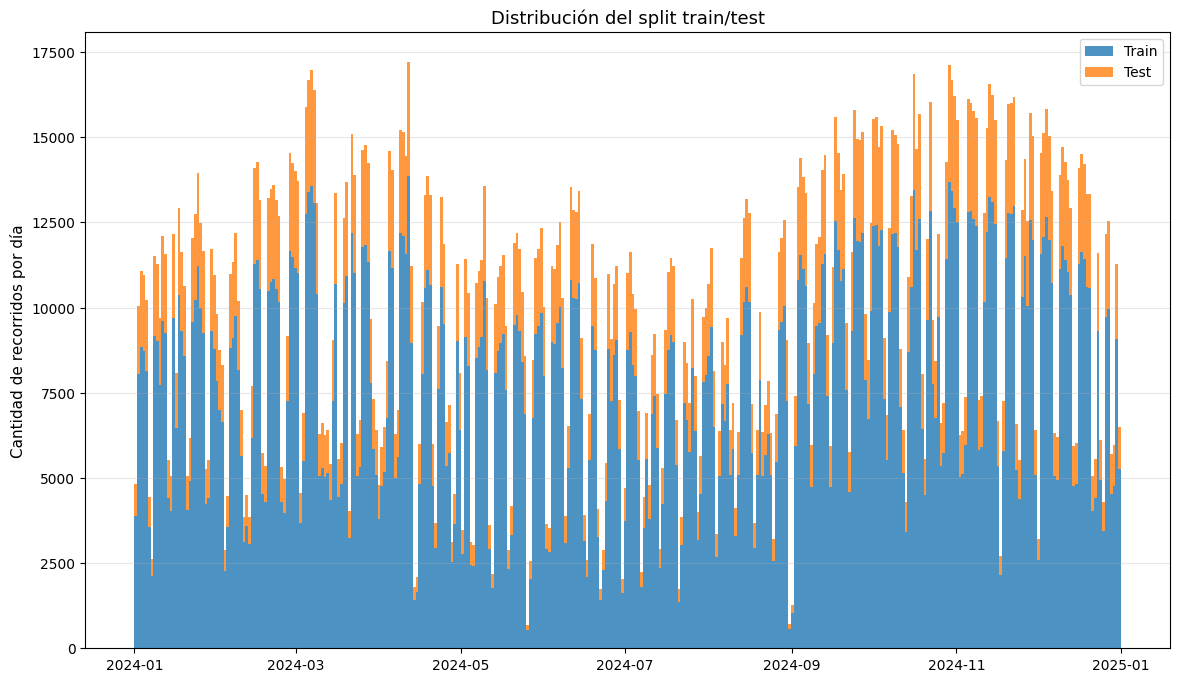

In [61]:
# Verificaci√≥n del split
fig, ax = plt.subplots(figsize=(14, 8))

ax.hist([rides_df_train['fecha_origen_recorrido'], rides_df_test['fecha_origen_recorrido']], 
         bins=365,  # Un bin por d√≠a
         stacked=True,
         label=['Train', 'Test'],
         color=['#1f77b4', '#ff7f0e'],
         alpha=0.8,
         edgecolor='none')

ax.set_ylabel('Cantidad de recorridos por d√≠a', fontsize=11)
ax.set_title('Distribuci√≥n del split train/test', 
              fontsize=13)
ax.legend(loc='upper right', fontsize=10)
ax.grid(axis='y', alpha=0.3)

plt.show()

# An√°lisis y tratamiento de faltantes

### Usuarios

In [62]:
users_df_train.isna().sum()

id_usuario        0
genero_usuario    0
edad_usuario      0
fecha_alta        0
hora_alta         0
fecha_alta_dt     0
hora_alta_dt      0
dia_semana        0
dtype: int64

In [63]:
users_df_train.dia_semana.unique()  # Check que los d√≠as sean datos v√°lidos

array(['Saturday', 'Tuesday', 'Wednesday', 'Friday', 'Sunday', 'Monday',
       'Thursday'], dtype=object)

In [64]:
users_df_train.genero_usuario.unique()  # Check que los g√©neros sean datos v√°lidos

array(['FEMALE', 'MALE', 'OTHER'], dtype=object)

In [65]:
users_df_train['fecha_alta_dt'].dt.year.unique()  # Check que los a√±os sean datos v√°lidos

array([2024], dtype=int32)

**No hay datos faltantes en el dataset de usuarios**

### Recorridos

In [66]:
rides_df_train.isna().sum()

id_recorrido                      0
duracion_recorrido                0
fecha_origen_recorrido            0
id_estacion_origen                0
nombre_estacion_origen            0
direccion_estacion_origen         0
long_estacion_origen              0
lat_estacion_origen               0
fecha_destino_recorrido        2700
id_estacion_destino               0
nombre_estacion_destino           0
direccion_estacion_destino        0
long_estacion_destino             0
lat_estacion_destino              0
id_usuario                        0
modelo_bicicleta                  0
genero                         9543
duracion_recorrido_min            0
mes                               0
dia_semana_origen_recorrido       0
hora_origen_recorrido             0
dtype: int64

In [67]:
mask_duration_zero = rides_df_train["duracion_recorrido"] == 0
print(f"Recorridos con duraci√≥n 0: {mask_duration_zero.sum()}")

mask_origin_neq_destination = rides_df_train["id_estacion_origen"] != rides_df_train["id_estacion_destino"]
mask_origin_eq_destination = rides_df_train["id_estacion_origen"] == rides_df_train["id_estacion_destino"]

mask_duration_zero_and_origin_neq_destination = mask_duration_zero & mask_origin_neq_destination
mask_duration_zero_and_origin_eq_destination = mask_duration_zero & mask_origin_eq_destination

print(f"Recorridos con duraci√≥n 0 y origen distinto a destino: {mask_duration_zero_and_origin_neq_destination.sum()}")
print(f"Recorridos con duraci√≥n 0 y origen igual a destino: {mask_duration_zero_and_origin_eq_destination.sum()}")

mask_duration_zero_and_origin_eq_destination_and_same_date = mask_duration_zero_and_origin_eq_destination & (rides_df_train["fecha_origen_recorrido"] == rides_df_train["fecha_destino_recorrido"])
mask_duration_zero_and_origin_eq_destination_and_different_date = mask_duration_zero_and_origin_eq_destination & (rides_df_train["fecha_origen_recorrido"] != rides_df_train["fecha_destino_recorrido"])
print(f"Recorridos con duraci√≥n 0, origen igual a destino y misma fecha de origen y destino: {mask_duration_zero_and_origin_eq_destination_and_same_date.sum()}")
print(f"Recorridos con duraci√≥n 0, origen igual a destino y distinta fecha de origen y destino: {mask_duration_zero_and_origin_eq_destination_and_different_date.sum()}")

Recorridos con duraci√≥n 0: 30149
Recorridos con duraci√≥n 0 y origen distinto a destino: 25156
Recorridos con duraci√≥n 0 y origen igual a destino: 4993
Recorridos con duraci√≥n 0, origen igual a destino y misma fecha de origen y destino: 4928
Recorridos con duraci√≥n 0, origen igual a destino y distinta fecha de origen y destino: 65


**Podemos considerar que los siguientes registros de duraci√≥n de recorridos son faltantes:**
- **Duraci√≥n 0 y origen distinto a destino**: la bicicleta se movi√≥ de estaci√≥n, el tiempo de viaje no puede ser 0
- **Duraci√≥n 0 y origen igual a destino, pero distinta fecha de origen que destino**: la bicicleta viaj√≥ y volvi√≥ a la misma estaci√≥n, el tiempo de viaje no puede ser 0

In [68]:
rides_df_train[mask_duration_zero_and_origin_neq_destination]["mes"].value_counts().sort_index()

mes
1     1157
2     2230
3     2436
4     2036
5     1788
6     1475
7     1285
8     1609
9     2283
10    2114
11    2918
12    3825
Name: count, dtype: int64

In [69]:
print(f"Proporci√≥n de recorridos con duraci√≥n 0 y origen distinto a destino: {mask_duration_zero_and_origin_neq_destination.sum() / len(rides_df_train) * 100:.3f} %")

Proporci√≥n de recorridos con duraci√≥n 0 y origen distinto a destino: 0.883 %


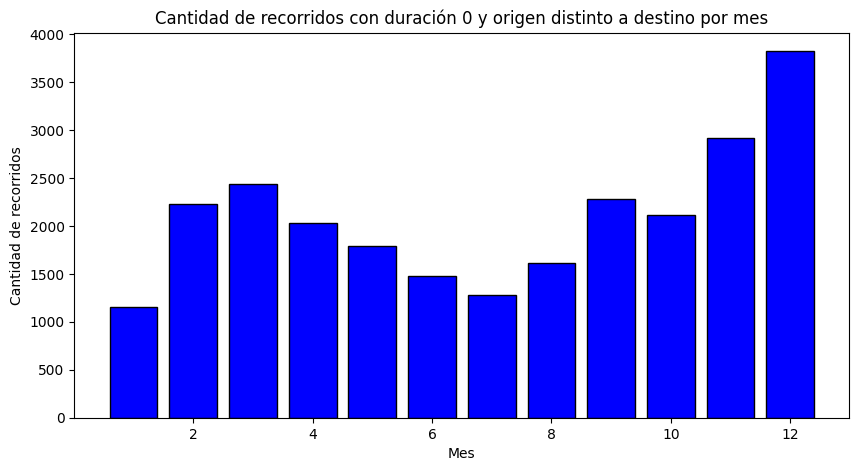

In [70]:
# Bar chart de cantidad de recorridos con duraci√≥n 0 y origen distinto a destino por mes
plt.figure(figsize=(10, 5))
month_counts = rides_df_train[mask_duration_zero_and_origin_neq_destination]['mes'].value_counts().sort_index()
plt.bar(month_counts.index, month_counts.values, color='blue', edgecolor='black')
plt.title('Cantidad de recorridos con duraci√≥n 0 y origen distinto a destino por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de recorridos')
plt.show()

**Los recorridos con duraci√≥n 0 y origen distinto a destino, no se distribuyen con un patr√≥n espec√≠fico sino que siguen el comportamiento del n√∫mero de recorridos totales por mes, con lo cual parece que estos registros faltan de forma completamente aleatoria (MCAR).**

In [71]:
rides_df_train[mask_duration_zero_and_origin_eq_destination_and_different_date]["mes"].value_counts().sort_index()

mes
11    25
12    40
Name: count, dtype: int64

In [72]:
print(f"Proporci√≥n de recorridos con duraci√≥n 0 y origen igual a destino y distinta fecha de origen que destino: {mask_duration_zero_and_origin_eq_destination_and_different_date.sum() / len(rides_df_train) * 100:.3f} %")

Proporci√≥n de recorridos con duraci√≥n 0 y origen igual a destino y distinta fecha de origen que destino: 0.002 %


**Los recorridos con duraci√≥n 0, origen igual a destino pero distinta fecha de origen que destino no se distribuyen de forma random, sino que solo se dan en noviembre y diciembre, probablemente est√©n relacionados con los faltantes que est√°n m√°s adelante en este an√°lisis.**

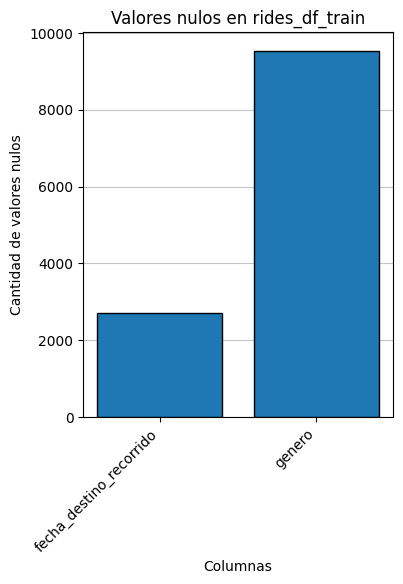

In [73]:
cols = ["fecha_destino_recorrido", "genero"]

plt.figure(figsize=(4, 5))
plt.grid(axis='y', alpha=0.75)
plt.bar(cols, rides_df_train[cols].isnull().sum(), align='center', zorder=2, edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.title('Valores nulos en rides_df_train')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores nulos')
plt.show()

##### Faltantes de fecha_destino_recorrido

In [74]:
mask_date_na = rides_df_train["fecha_destino_recorrido"].isna()
rides_df_train[mask_date_na].head(5)

id_recorrido  duracion_recorrido fecha_origen_recorrido  \
923079       24181455                   0    2024-12-05 17:55:10   
452438       24362617                   0    2024-12-18 21:13:51   
1073307      24231281                   0    2024-12-09 20:31:15   
1708802      24002555                   0    2024-11-22 21:16:05   
722927       24282718                   0    2024-12-12 22:20:04   

         id_estacion_origen    nombre_estacion_origen  \
923079                  449  352 - San Jose de Flores   
452438                  183     183 - VIRREY CEVALLOS   
1073307                  61       098 - BENITO JUAREZ   
1708802                 118              118 - MEXICO   
722927                  213             136 - Acevedo   

        direccion_estacion_origen  long_estacion_origen  lat_estacion_origen  \
923079         Av. Rivadavia 6955            -58.463297           -34.628836   
452438                Mexico 1652            -58.389973           -34.615699   
1073307        Benito Juarez 2231            -58.505177           -34.618927   
1708802         Saavedra & Mexico            -58.402653           -34.617020   
722927          Acevedo y Padilla            -58.442685           -34.599659   

        fecha_destino_recorrido  id_estacion_destino  \
923079                      NaN                  509   
452438                      NaN                  474   
1073307                     NaN                  197   
1708802                     NaN                  183   
722927                      NaN                  449   

             nombre_estacion_destino direccion_estacion_destino  \
923079         386 - VELEZ SARSFIELD           Av. Carrasco 214   
452438               224 - BAIGORRIA             Baigorria 4101   
1073307  197 - PLAZA CIUDAD DE UDINE              Mercedes 1480   
1708802        183 - VIRREY CEVALLOS                Mexico 1652   
722927      352 - San Jose de Flores         Av. Rivadavia 6955   

         long_estacion_destino  lat_estacion_destino  id_usuario  \
923079              -58.489810            -34.633638       67340   
452438              -58.503020            -34.610892      709592   
1073307             -58.493044            -34.620998     1197740   
1708802             -58.389973            -34.615699     1049513   
722927              -58.463297            -34.628836      751098   

        modelo_bicicleta  genero  duracion_recorrido_min  mes  \
923079            ICONIC    MALE                     0.0   12   
452438            ICONIC    MALE                     0.0   12   
1073307              FIT  FEMALE                     0.0   12   
1708802              FIT    MALE                     0.0   11   
722927               FIT    MALE                     0.0   12   

        dia_semana_origen_recorrido  hora_origen_recorrido  
923079                     Thursday                     17  
452438                    Wednesday                     21  
1073307                      Monday                     20  
1708802                      Friday                     21  
722927                     Thursday                     22

In [75]:
rides_df_train[mask_date_na]["mes"].value_counts().sort_index()

mes
11     911
12    1789
Name: count, dtype: int64

**Indicios de que el sistema funcion√≥ mal en algunos dias de noviembre y diciembre.**

In [76]:
print(f"Proporci√≥n de recorridos con fecha destino nula: {mask_date_na.sum() / len(rides_df_train) * 100:.3f} %")

Proporci√≥n de recorridos con fecha destino nula: 0.095 %


In [77]:
mask_nov = rides_df_train["mes"] == 11
mask_dec = rides_df_train["mes"] == 12
mask_nov_dec = mask_nov | mask_dec
mask_nov_na = mask_nov & mask_date_na
mask_dec_na = mask_dec & mask_date_na

In [78]:
rides_df_train[mask_nov_na]

id_recorrido  duracion_recorrido fecha_origen_recorrido  \
1708802      24002555                   0    2024-11-22 21:16:05   
1790058      24002606                   0    2024-11-22 21:20:10   
1827770      24031179                   0    2024-11-25 19:43:09   
1659379      24050491                   0    2024-11-26 21:53:56   
2807471      23779551                   0    2024-11-07 20:26:25   
...               ...                 ...                    ...   
1457363      24102163                   0    2024-11-29 22:16:15   
1805173      24049208                   0    2024-11-26 20:19:34   
1818433      24010944                   0    2024-11-23 23:40:26   
1553177      24101483                   0    2024-11-29 21:11:11   
1590738      24066087                   0    2024-11-27 22:27:20   

         id_estacion_origen    nombre_estacion_origen  \
1708802                 118              118 - MEXICO   
1790058                 208           145 - RAVIGNANI   
1827770                 316          205 - SAN MARTIN   
1659379                  65      065 - Juli√°n √Ålvarez   
2807471                 329    100 - Plaza Gurruchaga   
...                     ...                       ...   
1457363                 163             163 - ONCE II   
1805173                 476  279 - PLAZA MONTE CASTRO   
1818433                 543         139 - CASA ROSADA   
1553177                   9    009 - Parque Las Heras   
1590738                 492             325 - MEDRANO   

               direccion_estacion_origen  long_estacion_origen  \
1708802                Saavedra & Mexico            -58.402653   
1790058            EMILIO RAVIGNANI 1802            -58.438404   
1827770                 1471 Cucha Cucha            -58.453475   
1659379                      3822 Guemes            -58.415787   
2807471                  Gurruchaga 1084            -58.435066   
...                                  ...                   ...   
1457363  Bartolome Mitre & Av. Puyrredon            -58.406431   
1805173                Gualeguaych√∫ 1900            -58.498525   
1818433   Av. Alicia Moreau de Justo 861            -58.366741   
1553177    2300 Diaz, Cnel. Av. & French            -58.407741   
1590738             3905 Bartolom√© Mitre            -58.421563   

         lat_estacion_origen fecha_destino_recorrido  id_estacion_destino  \
1708802           -34.617020                     NaN                  183   
1790058           -34.580716                     NaN                   99   
1827770           -34.605567                     NaN                  281   
1659379           -34.587312                     NaN                  242   
2807471           -34.593110                     NaN                  291   
...                      ...                     ...                  ...   
1457363           -34.609566                     NaN                  194   
1805173           -34.618292                     NaN                  455   
1818433           -34.607480                     NaN                  202   
1553177           -34.585443                     NaN                   50   
1590738           -34.609710                     NaN                  231   

                 nombre_estacion_destino  \
1708802            183 - VIRREY CEVALLOS   
1790058                    099 - Malabia   
1827770              350 - Plaza Irlanda   
1659379                      103 - MALBA   
2807471                       244 - UADE   
...                                  ...   
1457363  194 - PER√ìN Y ACU√ëA DE FIGUEROA   
1805173            039 - Plaza Don Bosco   
1818433        001 - FACULTAD DE DERECHO   
1553177         050 - Hospital Rivadavia   
1590738         384 - PLAZA BENITO NAZAR   

                   direccion_estacion_destino  long_estacion_destino  \
1708802                           Mexico 1652             -58.389973   
1790058                  780 Malabia & Loyola             -58.435408   
1827770                        Av. Gao

In [79]:
mask_duration_zero_and_nov_na = mask_nov_na & mask_duration_zero
print(f"Recorridos en noviembre con duraci√≥n 0 y fecha destino nula: {mask_duration_zero_and_nov_na.sum()}")

mask_duration_zero_and_dec_na = mask_dec_na & mask_duration_zero
print(f"Recorridos en diciembre con duraci√≥n 0 y fecha destino nula: {mask_duration_zero_and_dec_na.sum()}")

Recorridos en noviembre con duraci√≥n 0 y fecha destino nula: 911
Recorridos en diciembre con duraci√≥n 0 y fecha destino nula: 1789


**Se observa que todos los registros faltantes de `fecha_destino_recorrido` tambi√©n tienen duraci√≥n 0**

In [80]:
pd.to_datetime(rides_df_train["fecha_origen_recorrido"], errors='coerce').dt.year.unique()  # Check que los a√±os sean datos v√°lidos

array([2024], dtype=int32)

In [81]:
pd.to_datetime(rides_df_train['fecha_destino_recorrido'], errors='coerce').dt.year.unique()  # Check que los a√±os sean datos v√°lidos

array([2024.,   nan, 2025.])

##### Faltantes de genero

In [82]:
mask_gen_na = rides_df_train["genero"].isna()
print(f"Recorridos con g√©nero faltante: {mask_gen_na.sum()}")

Recorridos con g√©nero faltante: 9543


In [83]:
print(f"Proporci√≥n de recorridos con g√©nero faltante: {mask_gen_na.sum() / len(rides_df_train) * 100:.3f} %")

Proporci√≥n de recorridos con g√©nero faltante: 0.335 %


In [84]:
rides_df_train[mask_gen_na]["mes"].value_counts().sort_index()

mes
1     778
2     671
3     853
4     756
5     861
6     723
7     720
8     765
9     871
10    912
11    830
12    803
Name: count, dtype: int64

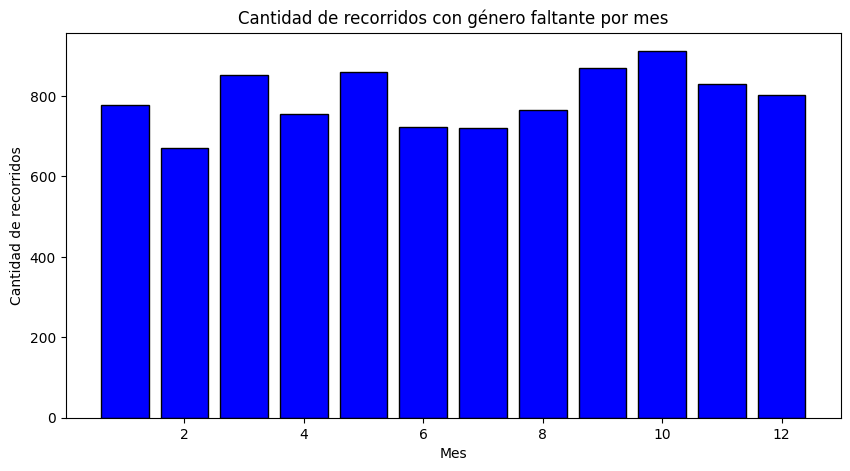

In [85]:
# Bar chart de cantidad de recorridos con g√©nero faltante por mes
plt.figure(figsize=(10, 5))
month_counts = rides_df_train[mask_gen_na]['mes'].value_counts().sort_index()
plt.bar(month_counts.index, month_counts.values, color='blue', edgecolor='black')
plt.title('Cantidad de recorridos con g√©nero faltante por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de recorridos')
plt.show()

**Los recorridos con g√©nero faltante, no se distribuyen con un patr√≥n espec√≠fico sino que siguen el comportamiento del n√∫mero de recorridos totales por mes, con lo cual parece que estos registros faltan de forma completamente aleatoria (MCAR).**

### Estrategias para tratamiento de faltantes
- Recorridos con duraci√≥n 0 y origen distinto a destino faltan de forma completamente aleatoria (MCAR) y representan un 0.88 % de los registros de training -> **Aplicamos eliminaci√≥n de fila**
<br>
<br>
- Recorridos con duraci√≥n 0 y origen igual a destino y distinta fecha de origen que destino no son MCAR, pero igualmente representan un 0.002 % -> **Aplicamos eliminaci√≥n de fila**
<br>
<br>
- Recorridos con fecha destino nula no son MCAR, pero igualmente representan un 0.095 % de los registros de training -> **Aplicamos eliminaci√≥n de fila**
<br>
<br>
- Recorridos sin g√©nero faltan de forma completamente aleatoria (MCAR) y representan un 0.335 % de los registros de training -> **Aplicamos eliminaci√≥n de fila**

In [86]:
# No se eliminan datos en users_df_train
users_df_train_cleaned = users_df_train.copy()

In [87]:
mask_for_deletion = mask_duration_zero_and_origin_neq_destination | mask_duration_zero_and_origin_eq_destination_and_different_date | mask_date_na | mask_gen_na
print(f"Total de recorridos a eliminar: {mask_for_deletion.sum()} ({mask_for_deletion.sum() / len(rides_df_train) * 100:.3f} % del total)")
rides_df_train_cleaned = rides_df_train[~mask_for_deletion].copy()
rides_df_train_cleaned.reset_index(drop=True, inplace=True)

Total de recorridos a eliminar: 34680 (1.218 % del total)


# An√°lisis y tratamiento de outliers

### Usuarios

Se vio M√°s arriba en la etapa exploratoria que `edad_usuario` contiene muchos valores at√≠picos, incluso algunos por encima de los 1000 a√±os.<br>
Probablemente se debi√≥ a un error al ingresar el dato en el sistema, al momento del alta de usuario.<br>
Los t√©rminos y condiciones del sistema contemplan usuarios con edad m√≠nima 16 a√±os.

In [88]:
# Edades < 16
mask_age_lt_16 = users_df_train_cleaned["edad_usuario"] < 16
print(f"Usuarios con edad < 16: {mask_age_lt_16.sum()} ({mask_age_lt_16.sum() / len(users_df_train_cleaned) * 100:.3f} % del total)")
users_df_train_cleaned[mask_age_lt_16]

Usuarios con edad < 16: 8 (0.005 % del total)


id_usuario genero_usuario  edad_usuario  fecha_alta hora_alta  \
157229     1087178           MALE            15  2024-01-05  23:09:04   
132348     1257721          OTHER             5  2024-11-24  14:02:31   
116314     1225229           MALE             5  2024-10-09  11:42:12   
94405      1083783           MALE             4  2024-01-01  12:05:43   
73194      1138759           MALE             5  2024-04-02  08:47:40   
124842     1192893           MALE            15  2024-08-16  00:07:41   
44659      1200706           MALE             4  2024-09-04  19:32:10   
49179      1216711          OTHER             5  2024-09-28  10:55:52   

       fecha_alta_dt hora_alta_dt dia_semana  
157229    2024-01-05     23:09:04     Friday  
132348    2024-11-24     14:02:31     Sunday  
116314    2024-10-09     11:42:12  Wednesday  
94405     2024-01-01     12:05:43     Monday  
73194     2024-04-02     08:47:40    Tuesday  
124842    2024-08-16     00:07:41     Friday  
44659     2024-09-04     19:32:10  Wednesday  
49179     2024-09-28     10:55:52   Saturday

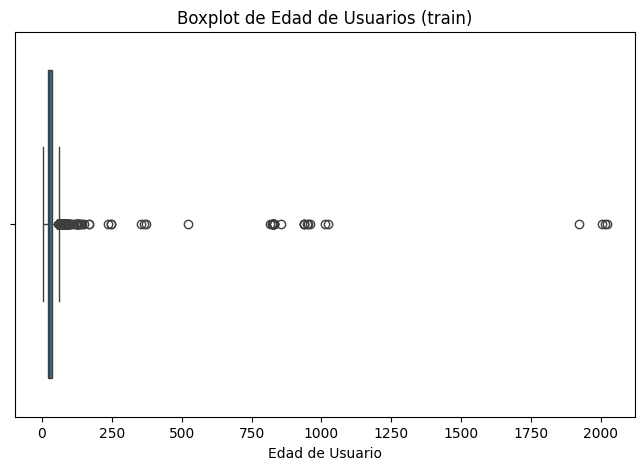

Outliers en edad_usuario: 2663 (1.689 % del total)
Valores de outliers: 2021 (m√°ximo), 62 (m√≠nimo)
Conteo de valores de outliers:
62: 368
63: 309
64: 249
65: 220
66: 184
67: 182
68: 153
71: 119
69: 111
72: 105
70: 98
73: 78
75: 66
74: 59
77: 50
76: 49
78: 40
79: 32
80: 29
83: 18
81: 18
82: 15
84: 10
86: 9
85: 9
88: 5
89: 5
90: 4
93: 4
87: 4
828: 4
91: 4
830: 3
938: 3
102: 2
124: 2
123: 2
92: 2
247: 2
129: 2
960: 1
827: 1
825: 1
2004: 1
236: 1
815: 1
139: 1
98: 1
2016: 1
829: 1
952: 1
353: 1
94: 1
138: 1
127: 1
373: 1
855: 1
824: 1
1012: 1
107: 1
170: 1
168: 1
149: 1
367: 1
113: 1
96: 1
948: 1
524: 1
142: 1
128: 1
2021: 1
826: 1
131: 1
1022: 1
1921: 1


In [89]:
# Detectar outliers en edad_usuario usando m√©todo de IQR
Q1 = users_df_train_cleaned['edad_usuario'].quantile(0.25)
Q3 = users_df_train_cleaned['edad_usuario'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_mask = (users_df_train_cleaned['edad_usuario'] < lower_bound) | (users_df_train_cleaned['edad_usuario'] > upper_bound)
outliers = users_df_train_cleaned[outliers_mask]

plt.figure(figsize=(8, 5))
sns.boxplot(x=users_df_train_cleaned['edad_usuario'])
plt.title('Boxplot de Edad de Usuarios (train)')
plt.xlabel('Edad de Usuario')
plt.show()

print(f"Outliers en edad_usuario: {outliers.shape[0]} ({outliers.shape[0] / users_df_train_cleaned.shape[0] * 100:.3f} % del total)")
print(f"Valores de outliers: {outliers['edad_usuario'].max()} (m√°ximo), {outliers['edad_usuario'].min()} (m√≠nimo)")
print(f"Conteo de valores de outliers:")
for valor, cantidad in outliers['edad_usuario'].value_counts().items():
    print(f"{valor}: {cantidad}")

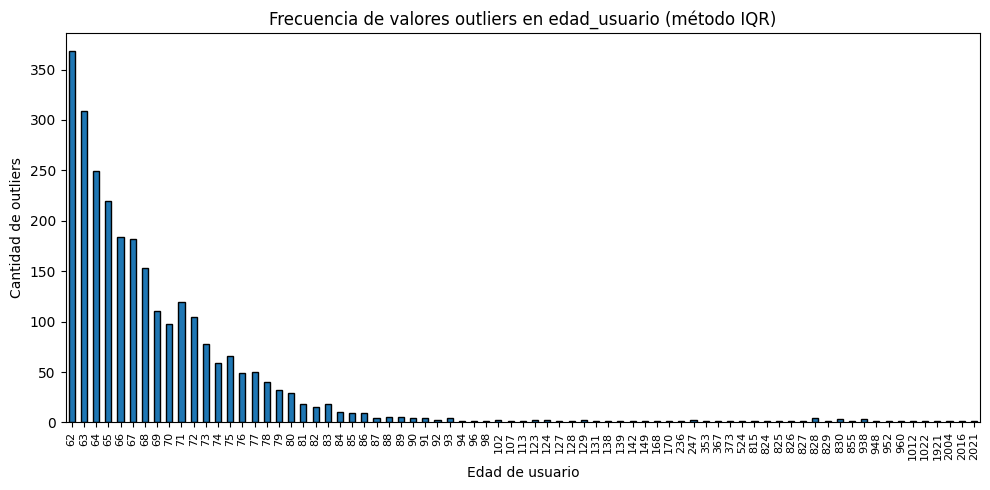

In [90]:
plt.figure(figsize=(10, 5))
outliers['edad_usuario'].value_counts().sort_index().plot(kind='bar', edgecolor='black')
plt.title('Frecuencia de valores outliers en edad_usuario (m√©todo IQR)')
plt.xlabel('Edad de usuario')
plt.ylabel('Cantidad de outliers')
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()

El m√©todo de IQR parece tomar valores perfectamente posibles (62 a 98) como outliers.<br>
Esto se debe a que este m√©todo funciona mejor para distribuciones relativamente sim√©tricas, y `edad_usuario` no lo es, es una distribuci√≥n asim√©trica con cola pesada a derecha.

In [153]:
# Outliers en edad_usuario usando m√©todo de desvio estandar (Z-score)
z_scores = np.abs(stats.zscore(users_df_train_cleaned['edad_usuario']))
z_threshold = 3  # Umbral t√≠pico
outliers_z = users_df_train_cleaned[z_scores > z_threshold]
print(f"Outliers detectados en edad_usuario por Z-score: {outliers_z.shape[0]} ({outliers_z.shape[0] / users_df_train_cleaned.shape[0] * 100:.3f} % del total)")
print(f"Valores de outliers por Z-score: {outliers_z['edad_usuario'].max()} (m√°ximo), {outliers_z['edad_usuario'].min()} (m√≠nimo)")
outliers_z['edad_usuario'].value_counts().sort_index()

Outliers detectados en edad_usuario por Z-score: 92 (0.058 % del total)
Valores de outliers por Z-score: 2021 (m√°ximo), 86 (m√≠nimo)


edad_usuario
86      9
87      4
88      5
89      5
90      4
91      4
92      2
93      4
94      1
96      1
98      1
102     2
107     1
113     1
123     2
124     2
127     1
128     1
129     2
131     1
138     1
139     1
142     1
149     1
168     1
170     1
236     1
247     2
353     1
367     1
373     1
524     1
815     1
824     1
825     1
826     1
827     1
828     4
829     1
830     3
855     1
938     3
948     1
952     1
960     1
1012    1
1022    1
1921    1
2004    1
2016    1
2021    1
Name: count, dtype: int64

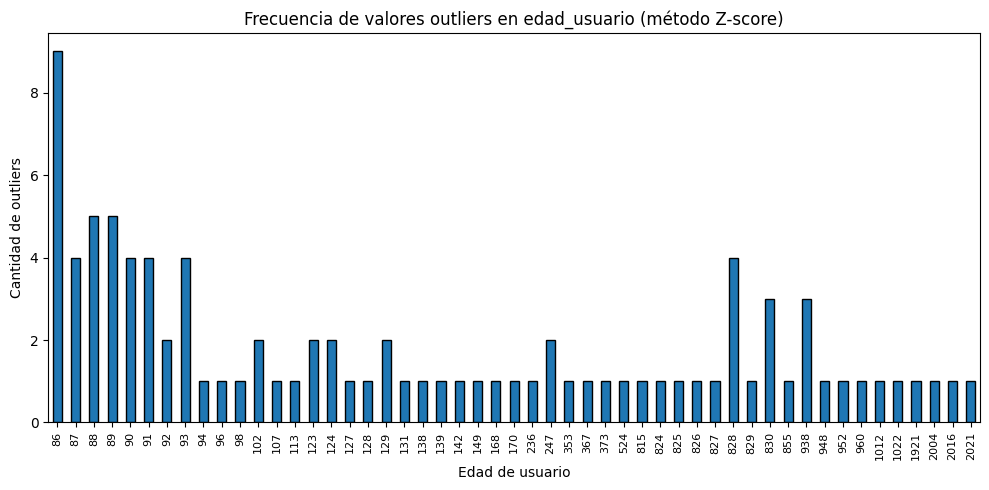

In [92]:
# Plot de outliers detectados por Z-score
plt.figure(figsize=(10, 5))
outliers_z['edad_usuario'].value_counts().sort_index().plot(kind='bar', edgecolor='black')
plt.title('Frecuencia de valores outliers en edad_usuario (m√©todo Z-score)')
plt.xlabel('Edad de usuario')
plt.ylabel('Cantidad de outliers')
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()

El m√©todo de desvio estandar (Z-score) parece funcionar mejor que el m√©todo de IQR, pero igualmente funciona mejor para distribuciones relativamente sim√©tricas, y `edad_usuario` no lo es, es una distribuci√≥n asim√©trica con cola pesada a derecha.

In [93]:
# Winsorizaci√≥n de edades en users
def winsorize_by_quantiles(series, lower_quantile=0.01, upper_quantile=0.99):
    lower_bound = series.quantile(lower_quantile)
    upper_bound = series.quantile(upper_quantile)
    return series.clip(lower=lower_bound, upper=upper_bound)

def winsorize_by_values(series, lower_value=16, upper_value=100):
    return series.clip(lower=lower_value, upper=upper_value)

users_df_train_cleaned['edad_usuario_winsorized'] = winsorize_by_values(users_df_train_cleaned['edad_usuario'])
print("Edades despu√©s de winsorizaci√≥n:")
print(users_df_train_cleaned['edad_usuario_winsorized'].describe().apply(lambda x: f"{x:,.2f}"))

Edades despu√©s de winsorizaci√≥n:
count    157,663.00
mean          30.59
std           11.66
min           16.00
25%           21.00
50%           27.00
75%           37.00
max          100.00
Name: edad_usuario_winsorized, dtype: object


In [94]:
users_df_train_cleaned['edad_usuario_winsorized'].value_counts().sort_index()

edad_usuario_winsorized
16        14
17        13
18     11996
19     10566
20      9221
       ...  
93         4
94         1
96         1
98         1
100       52
Name: count, Length: 82, dtype: int64

El m√©todo de winsorizaci√≥n genera una gran cantidad de valores en el 'tope' superior de los datos, sesgando el an√°lisis.

In [95]:
# Reemplazo de valores con edad mayor a 100 y menores a 16 por la mediana
median_age = users_df_train_cleaned['edad_usuario'].median()
users_df_train_cleaned['edad_usuario_cleaned_median'] = users_df_train_cleaned['edad_usuario'].apply(lambda x: median_age if x > 100 or x < 16 else x)
print("Edades despu√©s de reemplazo de valores > 100 y < 16 por la mediana:")
print(users_df_train_cleaned['edad_usuario_cleaned_median'].describe())

Edades despu√©s de reemplazo de valores > 100 y < 16 por la mediana:
count    157663.000000
mean         30.568669
std          11.588608
min          16.000000
25%          21.000000
50%          27.000000
75%          37.000000
max          98.000000
Name: edad_usuario_cleaned_median, dtype: float64


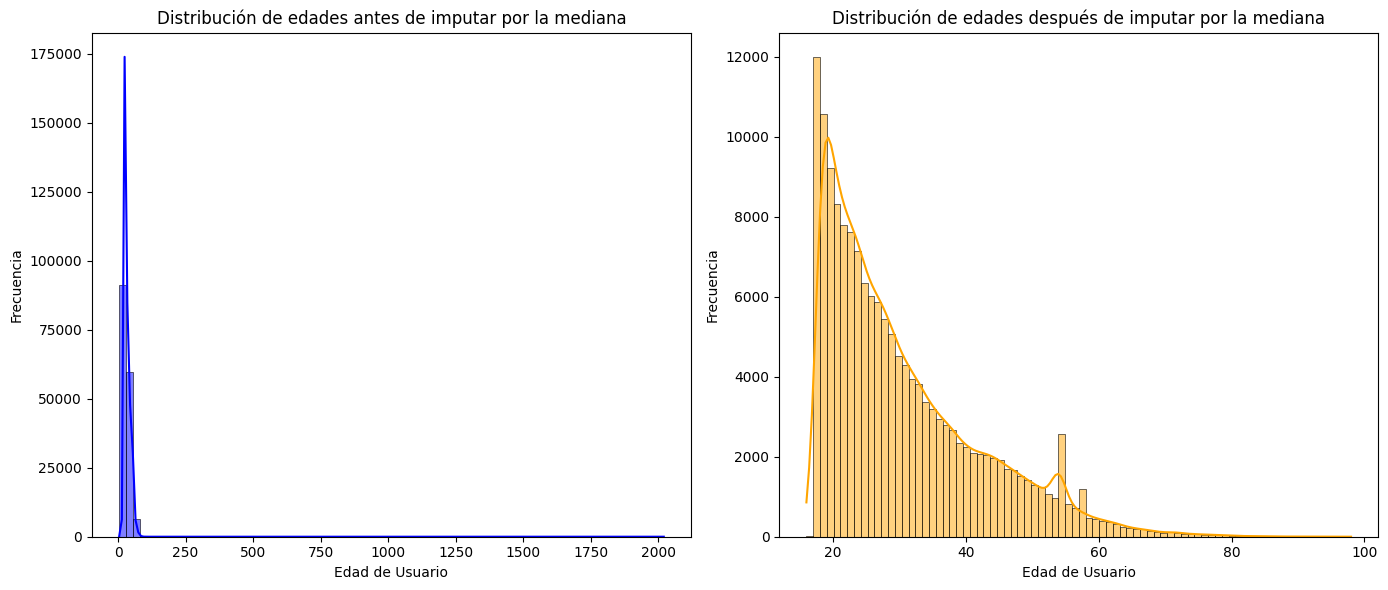

In [96]:
# Bar chart de edades antes y despu√©s de imputar edades >100 por la mediana
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(users_df_train_cleaned['edad_usuario'], bins=80, kde=True, color='blue')
plt.title('Distribuci√≥n de edades antes de imputar por la mediana')
plt.xlabel('Edad de Usuario')
plt.ylabel('Frecuencia')
plt.subplot(1, 2, 2)
sns.histplot(users_df_train_cleaned['edad_usuario_cleaned_median'], bins=80, kde=True, color='orange')
plt.title('Distribuci√≥n de edades despu√©s de imputar por la mediana')
plt.xlabel('Edad de Usuario')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

#### Estrategia para el tratamiento de outliers en `edad_usuario`
Se decidi√≥ entender la l√≥gica de negocio y basado en los siguientes criterios, se imputaron:
- Los valores menores a 16 por la mediana (TyC de Ecobici no contempla menores de 16 a√±os)
- Los valores mayores a 100 por la mediana
<br>
<br>
**Se imput√≥ por la mediana, dado que `edad_usuario` tiene una distribuci√≥n con sesgo positivo y la media resulta muy sensible ante valores extremos.**

In [97]:
# Limpieza final, quitamos las columnas que no se usan
if 'edad_usuario_winsorized' in users_df_train_cleaned.columns:
    users_df_train_cleaned.drop(columns=['edad_usuario_winsorized'], inplace=True)

### Recorridos

Se vio M√°s arriba en la etapa exploratoria que `duracion_recorrido` contiene muchos valores at√≠picos, incluso algunos por encima de los 40.000 minutos (~28 dias).<br>
Probablemente los valores altamente at√≠picos se debieron a bicicletas que no fueron devueltas (robadas) o a errores del sistema.

In [98]:
# Detectar outliers en duracion_recorrido usando m√©todo de IQR
Q1 = rides_df_train_cleaned['duracion_recorrido_min'].quantile(0.25)
Q3 = rides_df_train_cleaned['duracion_recorrido_min'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = rides_df_train_cleaned[(rides_df_train_cleaned['duracion_recorrido_min'] < lower_bound) | (rides_df_train_cleaned['duracion_recorrido_min'] > upper_bound)]

print(f"Outliers en duracion_recorrido (min): {outliers.shape[0]} ({outliers.shape[0] / rides_df_train_cleaned.shape[0] * 100:.3f} % del total)")
print(f"Valores de outliers (min): {outliers['duracion_recorrido_min'].max()} (m√°ximo), {outliers['duracion_recorrido_min'].min()} (m√≠nimo)")
print(f"Conteo de valores de outliers:")
for valor, cantidad in outliers['duracion_recorrido_min'].value_counts().sort_index().items():
    print(f"{valor:.2f}: {cantidad}")

Outliers en duracion_recorrido (min): 157561 (5.600 % del total)
Valores de outliers (min): 42852.75 (m√°ximo), 49.166666666666664 (m√≠nimo)
Conteo de valores de outliers:
49.17: 126
49.18: 130
49.20: 137
49.22: 132
49.23: 148
49.25: 133
49.27: 127
49.28: 126
49.30: 130
49.32: 117
49.33: 120
49.35: 124
49.37: 132
49.38: 121
49.40: 130
49.42: 106
49.43: 118
49.45: 145
49.47: 127
49.48: 122
49.50: 124
49.52: 125
49.53: 132
49.55: 117
49.57: 131
49.58: 126
49.60: 121
49.62: 134
49.63: 114
49.65: 129
49.67: 136
49.68: 135
49.70: 122
49.72: 114
49.73: 139
49.75: 132
49.77: 118
49.78: 132
49.80: 123
49.82: 119
49.83: 117
49.85: 139
49.87: 146
49.88: 114
49.90: 116
49.92: 117
49.93: 143
49.95: 145
49.97: 130
49.98: 123
50.00: 135
50.02: 109
50.03: 134
50.05: 107
50.07: 105
50.08: 123
50.10: 98
50.12: 126
50.13: 144
50.15: 106
50.17: 120
50.18: 137
50.20: 130
50.22: 116
50.23: 126
50.25: 150
50.27: 139
50.28: 117
50.30: 112
50.32: 111
50.33: 111
50.35: 130
50.37: 141
50.38: 114
50.40: 116
50.4

El m√©todo de IQR parece tomar valores perfectamente posibles (~49 min en adelante) como outliers.<br>
Incluso cambiando el factor multiplicador del IQR para hacerlo menos restrictivo sigue siendo demasiado acotado.<br>
Esto se debe a que este m√©todo funciona mejor para distribuciones relativamente sim√©tricas, y `duracion_recorrido` no lo es, es una distribuci√≥n asim√©trica con cola pesada a derecha.

In [99]:
# Outliers en duracion_recorrido usando m√©todo de desvio estandar (Z-score)
z_scores = np.abs(stats.zscore(rides_df_train_cleaned['duracion_recorrido_min']))
z_threshold = 3  # Umbral t√≠pico
outliers_z = rides_df_train_cleaned[z_scores > z_threshold]

print(f"Outliers detectados en duracion_recorrido (min) por Z-score: {outliers_z.shape[0]} ({outliers_z.shape[0] / rides_df_train_cleaned.shape[0] * 100:.3f} % del total)")
print(f"Valores de outliers (min) usando Z-score: {outliers_z['duracion_recorrido_min'].max()} (m√°ximo), {outliers_z['duracion_recorrido_min'].min()} (m√≠nimo)")
print(f"\nConteo de valores de outliers por Z-score:")
for valor, cantidad in outliers_z['duracion_recorrido_min'].value_counts().sort_index().items():
    print(f"{valor:.2f}: {cantidad}")

Outliers detectados en duracion_recorrido (min) por Z-score: 1907 (0.068 % del total)
Valores de outliers (min) usando Z-score: 42852.75 (m√°ximo), 507.9166666666667 (m√≠nimo)

Conteo de valores de outliers por Z-score:
507.92: 1
508.28: 1
508.35: 1
508.38: 1
508.63: 1
508.97: 1
509.05: 1
509.45: 1
509.58: 1
510.13: 1
510.35: 1
510.62: 1
510.80: 1
510.95: 1
511.08: 1
511.10: 1
511.12: 1
511.15: 1
511.20: 2
511.23: 1
511.32: 1
512.00: 1
512.05: 1
512.85: 1
513.27: 1
513.32: 1
513.45: 1
513.52: 1
513.53: 1
514.10: 1
514.12: 1
514.58: 1
515.05: 1
515.25: 1
515.32: 1
515.45: 1
515.65: 1
515.70: 1
516.02: 1
516.03: 1
516.28: 1
516.32: 1
516.38: 1
516.53: 1
516.72: 1
517.48: 1
517.60: 1
518.42: 1
518.52: 1
518.60: 1
518.82: 1
519.17: 1
519.93: 1
520.18: 1
520.28: 1
520.37: 1
521.07: 1
522.02: 1
522.08: 1
522.10: 1
522.13: 1
522.65: 1
522.72: 1
523.27: 1
523.37: 1
523.78: 1
523.98: 1
524.30: 2
524.52: 1
524.55: 1
524.58: 1
524.63: 1
524.75: 1
524.83: 1
524.85: 1
525.00: 1
525.08: 1
525.10: 1


El m√©todo de desvio estandar (Z-score) parece funcionar mejor que el m√©todo de IQR, pero igualmente funciona mejor para distribuciones relativamente sim√©tricas, y `duracion_recorrido` no lo es, es una distribuci√≥n asim√©trica con cola pesada a derecha.

In [100]:
# Winsorizaci√≥n de duracion_recorrido en recorridos
rides_df_train_cleaned['duracion_recorrido_min_winsorized'] = winsorize_by_quantiles(rides_df_train_cleaned['duracion_recorrido_min'], lower_quantile=0.001, upper_quantile=0.9995)
print("Duraci√≥n de recorridos (min) despu√©s de winsorizaci√≥n:")
print(rides_df_train_cleaned['duracion_recorrido_min_winsorized'].describe().apply(lambda x: f"{x:,.2f}"))
winsorized = rides_df_train_cleaned[rides_df_train_cleaned['duracion_recorrido_min'] != rides_df_train_cleaned['duracion_recorrido_min_winsorized']]
print(f"\nRegistros winsorizados: {winsorized.shape[0]} ({winsorized.shape[0] / rides_df_train_cleaned.shape[0] * 100:.3f} % del total)")

Duraci√≥n de recorridos (min) despu√©s de winsorizaci√≥n:
count    2,813,643.00
mean            20.02
std             27.25
min              0.00
25%              8.37
50%             14.82
75%             24.68
max            643.99
Name: duracion_recorrido_min_winsorized, dtype: object

Registros winsorizados: 1407 (0.050 % del total)


# Feature engineering

Agregamos una feature derivada (si una fecha cae en feriado) cruzando con los datos de feriados Argentina 2024.<br>
Dicha columna se agrega a los conjuntos train y test dado que "feriado" no depende de ninguna informaci√≥n futura ni de la variable objetivo, es simplemente una transformaci√≥n determin√≠stica de la fecha de cada recorrido, por ese motivo no hay data leakage.

In [101]:
import holidays

feriados_ar = holidays.Argentina(years=[2024])

In [102]:
# Indica si la fecha de origen del recorrido es feriado
rides_df_train_cleaned['feriado'] = rides_df_train_cleaned['fecha_origen_recorrido'].dt.date.isin(feriados_ar)
rides_df_test['feriado'] = rides_df_test['fecha_origen_recorrido'].dt.date.isin(feriados_ar)

In [103]:
# Verificaci√≥n de feriados
mask_holiday = rides_df_train_cleaned['feriado'] == True
rides_df_train_cleaned[mask_holiday].sample(10)


id_recorrido  duracion_recorrido fecha_origen_recorrido  \
1483719      23398619                 535    2024-10-11 13:10:33   
2464559      21143899                3888    2024-03-24 19:20:18   
388058       23402788                  21    2024-10-11 18:54:54   
264354       23405172                1539    2024-10-12 05:34:02   
2783809      21199211                 990    2024-03-28 12:07:31   
1474226      20183929                4144    2024-01-01 16:55:25   
388533       20635224                2008    2024-02-12 20:36:46   
2366632      20181985                1067    2024-01-01 07:28:27   
815095       21238442                 648    2024-04-02 08:28:14   
1246459      21206395                 917    2024-03-28 21:50:55   

         id_estacion_origen             nombre_estacion_origen  \
1483719                 169       169 - FACULTAD DE PSICOLOGIA   
2464559                 171                      171 - Pasteur   
388058                  498                       055 - HABANA   
264354                   46                        046 - Chile   
2783809                 480        353 - PLAZA V√âLEZ SARSFIELD   
1474226                 516             368 - PLAZA DE LA SHO√Å   
388533                  429  201 - PLAZA EJERCITO DE LOS ANDES   
2366632                 167       275 - PLAZA 24 DE SEPTIEMBRE   
815095                  289        255 - BARRANCAS DE BELGRANO   
1246459                 200             200 - AUSTRIA Y FRENCH   

                                 direccion_estacion_origen  \
1483719                         Av. Hip√≥lito Yrigoyen 3417   
2464559                                        519 Pasteur   
388058         Gral. Jos√© Gervasio Artigas 4298 (y Habana)   
264354                                            Per√∫ 718   
2783809                                      Chivilcoy 400   
1474226                            Av. Del Libertador 3899   
388533                            Av. Rivadavia y Albari√±o   
2366632                                1355 San Martin Av.   
815095   Sucre, Antonio Jose De, Mcal. Y Vertiz Virrey Av.   
1246459                                       Austria 2075   

         long_estacion_origen  lat_estacion_origen fecha_destino_recorrido  \
1483719            -58.414971           -34.613071     2024-10-11 13:19:28   
2464559            -58.399755           -34.603281     2024-03-24 20:25:06   
388058             -58.494959           -34.586598     2024-10-11 18:55:15   
264354             -58.374370           -34.616373     2024-10-12 05:59:41   
2783809            -58.483603           -34.629334     2024-03-28 12:24:01   
1474226            -58.423347           -34.570998     2024-01-01 18:04:29   
388533             -58.510102           -34.638974     2024-02-12 21:10:14   
2366632            -58.448540           -34.606984     2024-01-01 07:46:14   
815095             -58.448314           -34.559801     2024-04-02 08:39:02   
1246459            -58.404261           -34.588300     2024-03-28 22:06:12   

         id_estacion_destino         nombre_estacion_destino  \
1483719                   96             096 - Carlos Gardel   
2464559                  461  106 - MOSCONI Y CONSTITUYENTES   
388058                   498                    055 - HABANA   
264354                   184             184 - Pedro Echague   
2783809                  473            216 - EMILIO LAMARCA   
1474226                  260     371 - Paseo de las Americas   
388533                   255                      374 - Puan   
2366632                  281             350 - Plaza Irlanda   
815095                   379             390 - De Los Ombues   
1246459                  467              328 - SARMIENTO II   

                          direccion_estacion_destino  long_estacion_destino  \
1483719                  3302 Guardia Vieja & Aguero             -58.411659   
2464559                          CONSTITUYENTES 4710             -58.493630   
388058   Gral. Jos√© Gervasio Artigas 4298 

=== AN√ÅLISIS: DISTANCIA VS USO DE ESTACIONES ===
N√∫mero de pares de estaciones analizados: 86388
Rango de distancias: 0.004 - 18.319 km
Rango de uso promedio: 280 - 29885 viajes


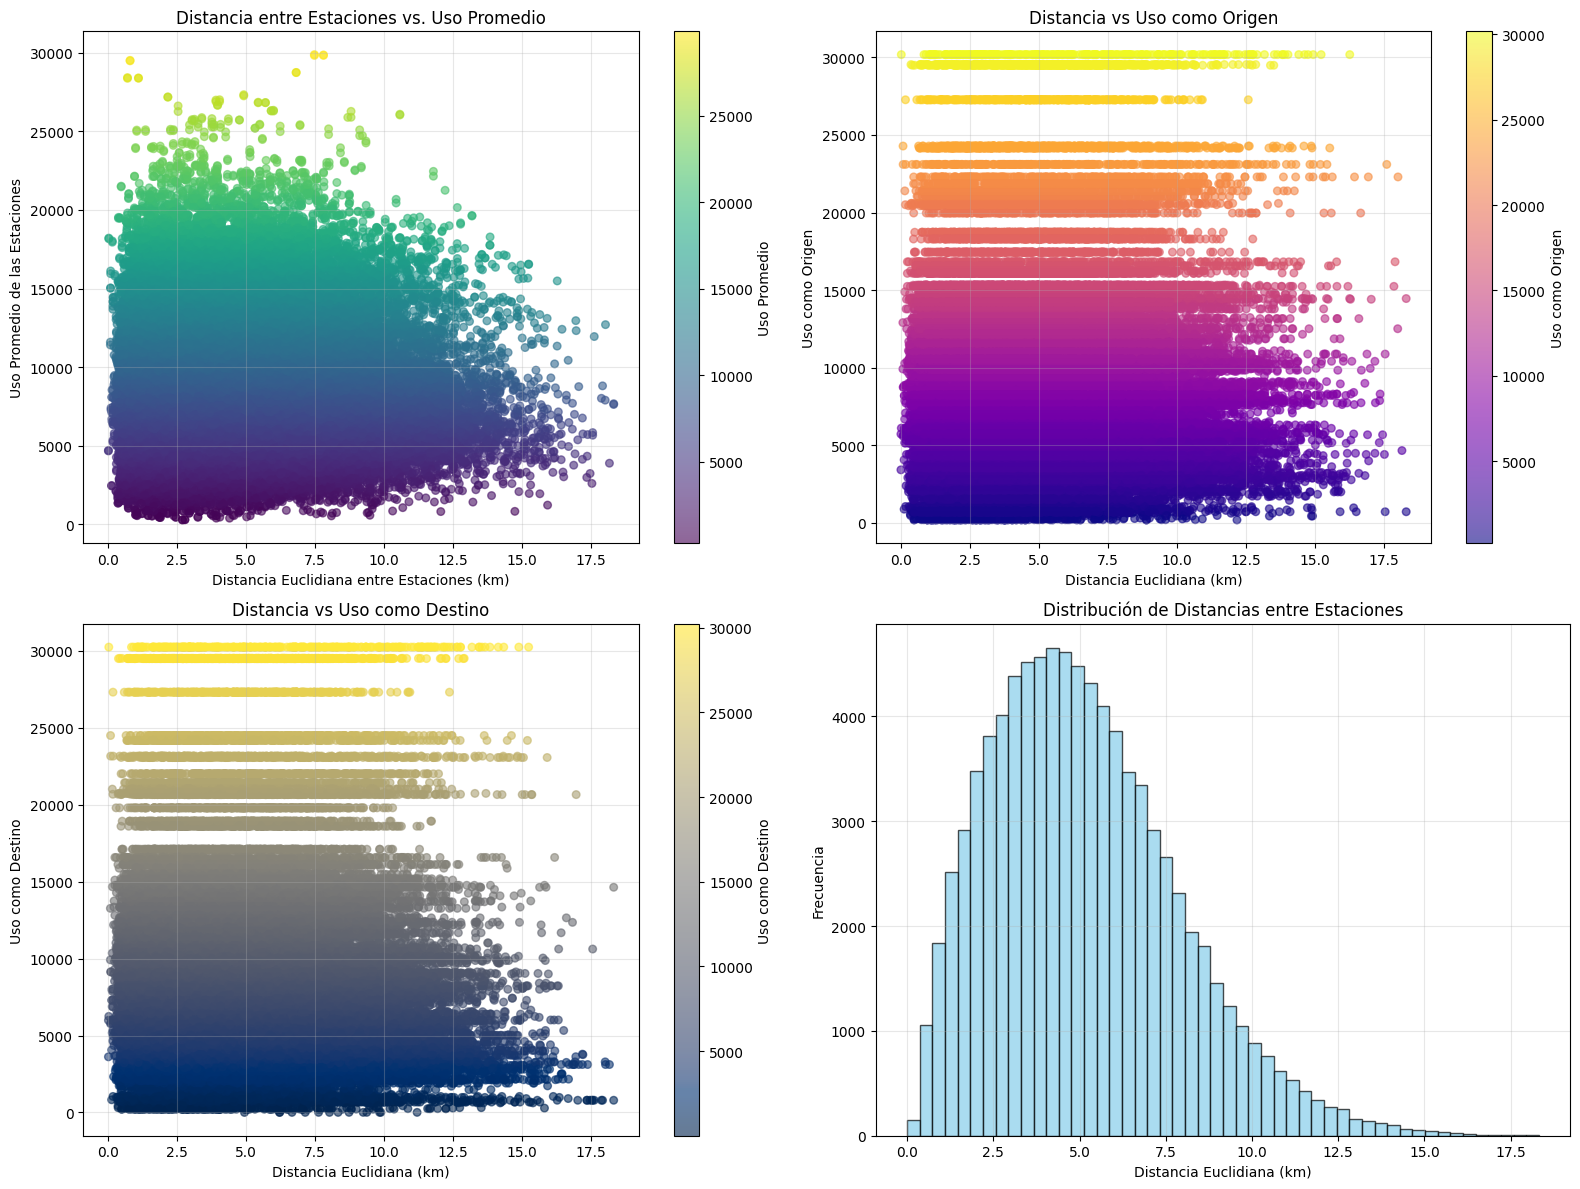


=== AN√ÅLISIS DE CORRELACI√ìN ===
Correlaci√≥n entre distancia y uso promedio: 0.025

=== TOP 10 PARES DE ESTACIONES M√ÅS UTILIZADOS ===
014 - Pacifico ‚Üí 147 - Constituci√≥n
  Distancia: 7.471 km, Uso promedio: 29885 viajes

368 - PLAZA DE LA SHO√Å ‚Üí 147 - Constituci√≥n
  Distancia: 7.800 km, Uso promedio: 29862 viajes

147 - Constituci√≥n ‚Üí 368 - PLAZA DE LA SHO√Å
  Distancia: 7.800 km, Uso promedio: 29839 viajes

147 - Constituci√≥n ‚Üí 014 - Pacifico
  Distancia: 7.471 km, Uso promedio: 29833 viajes

014 - Pacifico ‚Üí 368 - PLAZA DE LA SHO√Å
  Distancia: 0.789 km, Uso promedio: 29518 viajes

368 - PLAZA DE LA SHO√Å ‚Üí 014 - Pacifico
  Distancia: 0.789 km, Uso promedio: 29489 viajes

005 - Plaza Italia ‚Üí 147 - Constituci√≥n
  Distancia: 6.810 km, Uso promedio: 28750 viajes

147 - Constituci√≥n ‚Üí 005 - Plaza Italia
  Distancia: 6.810 km, Uso promedio: 28742 viajes

014 - Pacifico ‚Üí 005 - Plaza Italia
  Distancia: 0.696 km, Uso promedio: 28421 viajes

368 - PLAZA DE LA S

In [104]:
# 1. Distancia euclidiana entre estaciones
rides_df_train_cleaned['distancia_km'] = np.sqrt(
    (rides_df_train_cleaned['long_estacion_destino'] - rides_df_train_cleaned['long_estacion_origen'])**2 + 
    (rides_df_train_cleaned['lat_estacion_destino'] - rides_df_train_cleaned['lat_estacion_origen'])**2
) * 111  # Aproximaci√≥n: 1 grado = 111 km

# Gr√°fico: Distancia euclidiana entre estaciones vs. uso de esas estaciones
print("=== AN√ÅLISIS: DISTANCIA VS USO DE ESTACIONES ===")

# Calcular el uso de cada estaci√≥n como origen y destino
uso_origen = rides_df_train_cleaned['nombre_estacion_origen'].value_counts().rename('uso_origen')
uso_destino = rides_df_train_cleaned['nombre_estacion_destino'].value_counts().rename('uso_destino')

# Crear DataFrame de pares de estaciones con su distancia promedio
pares_estaciones = rides_df_train_cleaned.groupby(['nombre_estacion_origen', 'nombre_estacion_destino']).agg({
    'distancia_km': 'mean'
}).reset_index()

# Filtrar solo pares de estaciones diferentes (origen ‚â† destino)
pares_estaciones = pares_estaciones[pares_estaciones['nombre_estacion_origen'] != pares_estaciones['nombre_estacion_destino']]

# Agregar el uso de cada estaci√≥n al DataFrame de pares
pares_estaciones = pares_estaciones.merge(uso_origen, left_on='nombre_estacion_origen', right_index=True, how='left')
pares_estaciones = pares_estaciones.merge(uso_destino, left_on='nombre_estacion_destino', right_index=True, how='left')

# Calcular el uso promedio entre origen y destino
pares_estaciones['uso_promedio'] = pares_estaciones[['uso_origen', 'uso_destino']].mean(axis=1)

print(f"N√∫mero de pares de estaciones analizados: {len(pares_estaciones)}")
print(f"Rango de distancias: {pares_estaciones['distancia_km'].min():.3f} - {pares_estaciones['distancia_km'].max():.3f} km")
print(f"Rango de uso promedio: {pares_estaciones['uso_promedio'].min():.0f} - {pares_estaciones['uso_promedio'].max():.0f} viajes")

# Crear visualizaci√≥n con m√∫ltiples gr√°ficos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gr√°fico 1: Scatter plot principal - Distancia vs Uso Promedio
scatter = axes[0,0].scatter(pares_estaciones['distancia_km'], pares_estaciones['uso_promedio'], 
                           alpha=0.6, s=30, c=pares_estaciones['uso_promedio'], cmap='viridis')
axes[0,0].set_xlabel('Distancia Euclidiana entre Estaciones (km)')
axes[0,0].set_ylabel('Uso Promedio de las Estaciones')
axes[0,0].set_title('Distancia entre Estaciones vs. Uso Promedio')
axes[0,0].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[0,0], label='Uso Promedio')

# Gr√°fico 2: Distancia vs Uso como Origen
scatter2 = axes[0,1].scatter(pares_estaciones['distancia_km'], pares_estaciones['uso_origen'], 
                            alpha=0.6, s=30, c=pares_estaciones['uso_origen'], cmap='plasma')
axes[0,1].set_xlabel('Distancia Euclidiana (km)')
axes[0,1].set_ylabel('Uso como Origen')
axes[0,1].set_title('Distancia vs Uso como Origen')
axes[0,1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[0,1], label='Uso como Origen')

# Gr√°fico 3: Distancia vs Uso como Destino
scatter3 = axes[1,0].scatter(pares_estaciones['distancia_km'], pares_estaciones['uso_destino'], 
                            alpha=0.6, s=30, c=pares_estaciones['uso_destino'], cmap='cividis')
axes[1,0].set_xlabel('Distancia Euclidiana (km)')
axes[1,0].set_ylabel('Uso como Destino')
axes[1,0].set_title('Distancia vs Uso como Destino')
axes[1,0].grid(True, alpha=0.3)
plt.colorbar(scatter3, ax=axes[1,0], label='Uso como Destino')

# Gr√°fico 4: Histograma de distancias
axes[1,1].hist(pares_estaciones['distancia_km'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[1,1].set_xlabel('Distancia Euclidiana (km)')
axes[1,1].set_ylabel('Frecuencia')
axes[1,1].set_title('Distribuci√≥n de Distancias entre Estaciones')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# An√°lisis de correlaci√≥n
correlacion = pares_estaciones['distancia_km'].corr(pares_estaciones['uso_promedio'])
print(f"\n=== AN√ÅLISIS DE CORRELACI√ìN ===")
print(f"Correlaci√≥n entre distancia y uso promedio: {correlacion:.3f}")

# Top 10 pares de estaciones m√°s utilizados
top_pares = pares_estaciones.nlargest(10, 'uso_promedio')[['nombre_estacion_origen', 'nombre_estacion_destino', 'distancia_km', 'uso_promedio']]
print(f"\n=== TOP 10 PARES DE ESTACIONES M√ÅS UTILIZADOS ===")
for idx, row in top_pares.iterrows():
    print(f"{row['nombre_estacion_origen']} ‚Üí {row['nombre_estacion_destino']}")
    print(f"  Distancia: {row['distancia_km']:.3f} km, Uso promedio: {row['uso_promedio']:.0f} viajes\n")

### Creacion de variable objetivo: Demanda de bicicletas por estaci√≥n de origen

In [124]:
# Creaci√≥n de variable objetivo: demanda de bicicletas por estaci√≥n
# Agrupamos por: d√≠a, estaci√≥n de ORIGEN y rango horario (1 hora)
# Esto representa cu√°ntas bicicletas se toman de cada estaci√≥n en cada momento

# 1. Extraer la hora del timestamp de origen
rides_df_train_cleaned['hora_origen'] = rides_df_train_cleaned['fecha_origen_recorrido'].dt.hour

# 2. Extraer la fecha (sin hora) del timestamp de origen
rides_df_train_cleaned['fecha_origen'] = rides_df_train_cleaned['fecha_origen_recorrido'].dt.date

# 3. Crear la variable objetivo: contar viajes por (fecha, estaci√≥n_ORIGEN, hora)
demanda_por_estacion = (rides_df_train_cleaned
                       .groupby(['fecha_origen', 'nombre_estacion_origen', 'hora_origen'])
                       .size()
                       .reset_index(name='demanda_bicicletas'))

# 4. Convertir fecha_origen a datetime para extraer variables temporales
demanda_por_estacion['fecha_origen'] = pd.to_datetime(demanda_por_estacion['fecha_origen'])

# 5. Agregar variables temporales y derivadas
print("=== AGREGANDO VARIABLES TEMPORALES Y DERIVADAS ===")

# Variables temporales b√°sicas
demanda_por_estacion['dia_semana'] = demanda_por_estacion['fecha_origen'].dt.day_name()
demanda_por_estacion['numero_dia_semana'] = demanda_por_estacion['fecha_origen'].dt.dayofweek  # 0=Lunes, 6=Domingo
demanda_por_estacion['mes'] = demanda_por_estacion['fecha_origen'].dt.month
demanda_por_estacion['dia_del_mes'] = demanda_por_estacion['fecha_origen'].dt.day
demanda_por_estacion['semana_del_a√±o'] = demanda_por_estacion['fecha_origen'].dt.isocalendar().week
demanda_por_estacion['trimestre'] = demanda_por_estacion['fecha_origen'].dt.quarter

# Variables derivadas
demanda_por_estacion['es_fin_de_semana'] = demanda_por_estacion['numero_dia_semana'].isin([5, 6])  # S√°bado y Domingo
demanda_por_estacion['es_feriado'] = demanda_por_estacion['fecha_origen'].dt.date.isin(feriados_ar)

# Estaci√≥n del a√±o
def obtener_estacion(mes):
    if mes in [12, 1, 2]:
        return 'Verano'
    elif mes in [3, 4, 5]:
        return 'Oto√±o'
    elif mes in [6, 7, 8]:
        return 'Invierno'
    else:  # [9, 10, 11]
        return 'Primavera'

demanda_por_estacion['estacion_a√±o'] = demanda_por_estacion['mes'].apply(obtener_estacion)

# Categorizaci√≥n horaria
def categorizar_hora(hora):
    if 5 <= hora <= 11:
        return 'Ma√±ana'
    elif 12 <= hora <= 17:
        return 'Tarde'  
    elif 18 <= hora <= 23:
        return 'Noche'
    else:  # 0-4
        return 'Madrugada'

demanda_por_estacion['periodo_dia'] = demanda_por_estacion['hora_origen'].apply(categorizar_hora)

# Horarios pico
def es_hora_pico(hora, es_fin_semana):
    if es_fin_semana:
        # Fin de semana: picos m√°s suaves en la tarde
        return hora in [15, 16, 17, 18, 19, 20]
    else:
        # D√≠as laborales: picos ma√±ana y tarde
        return hora in [7, 8, 9, 17, 18, 19]

demanda_por_estacion['es_hora_pico'] = demanda_por_estacion.apply(
    lambda row: es_hora_pico(row['hora_origen'], row['es_fin_de_semana']), axis=1
)

# D√≠a laboral vs no laboral (considerando feriados)
demanda_por_estacion['es_dia_laboral'] = ~(demanda_por_estacion['es_fin_de_semana'] | demanda_por_estacion['es_feriado'])

# Variables c√≠clicas para hora (√∫tiles para modelos de ML)
demanda_por_estacion['hora_sin'] = np.sin(2 * np.pi * demanda_por_estacion['hora_origen'] / 24)
demanda_por_estacion['hora_cos'] = np.cos(2 * np.pi * demanda_por_estacion['hora_origen'] / 24)

# Variables c√≠clicas para d√≠a de la semana
demanda_por_estacion['dia_semana_sin'] = np.sin(2 * np.pi * demanda_por_estacion['numero_dia_semana'] / 7)
demanda_por_estacion['dia_semana_cos'] = np.cos(2 * np.pi * demanda_por_estacion['numero_dia_semana'] / 7)

# Variables c√≠clicas para mes
demanda_por_estacion['mes_sin'] = np.sin(2 * np.pi * demanda_por_estacion['mes'] / 12)
demanda_por_estacion['mes_cos'] = np.cos(2 * np.pi * demanda_por_estacion['mes'] / 12)

# Variables c√≠clicas para d√≠a del mes
demanda_por_estacion['dia_del_mes_sin'] = np.sin(2 * np.pi * demanda_por_estacion['dia_del_mes'] / 31)
demanda_por_estacion['dia_del_mes_cos'] = np.cos(2 * np.pi * demanda_por_estacion['dia_del_mes'] / 31)

# Variables c√≠clicas para semana del a√±o
demanda_por_estacion['semana_del_a√±o_sin'] = np.sin(2 * np.pi * demanda_por_estacion['semana_del_a√±o'] / 52)
demanda_por_estacion['semana_del_a√±o_cos'] = np.cos(2 * np.pi * demanda_por_estacion['semana_del_a√±o'] / 52)

# Variables c√≠clicas para trimestre
demanda_por_estacion['trimestre_sin'] = np.sin(2 * np.pi * demanda_por_estacion['trimestre'] / 4)
demanda_por_estacion['trimestre_cos'] = np.cos(2 * np.pi * demanda_por_estacion['trimestre'] / 4)

print(f"Shape del dataset de demanda: {demanda_por_estacion.shape}")
print(f"Rango de demanda: {demanda_por_estacion['demanda_bicicletas'].min()} - {demanda_por_estacion['demanda_bicicletas'].max()} bicicletas")
print(f"Demanda promedio por estaci√≥n-hora: {demanda_por_estacion['demanda_bicicletas'].mean():.2f} bicicletas")
print(f"N√∫mero de estaciones √∫nicas: {demanda_por_estacion['nombre_estacion_origen'].nunique()}")
print(f"N√∫mero de fechas √∫nicas: {demanda_por_estacion['fecha_origen'].nunique()}")
print(f"Nuevas columnas agregadas: {len(demanda_por_estacion.columns) - 4}")

# Mostrar resumen de las nuevas variables
print(f"\n=== RESUMEN DE VARIABLES CREADAS ===")
nuevas_columnas = ['dia_semana', 'numero_dia_semana', 'mes', 'dia_del_mes', 'semana_del_a√±o', 'trimestre',
                   'es_fin_de_semana', 'es_feriado', 'estacion_a√±o', 'periodo_dia', 'es_hora_pico', 
                   'es_dia_laboral', 'hora_sin', 'hora_cos', 'dia_semana_sin', 'dia_semana_cos', 
                   'mes_sin', 'mes_cos', 'dia_del_mes_sin', 'dia_del_mes_cos', 
                   'semana_del_a√±o_sin', 'semana_del_a√±o_cos', 'trimestre_sin', 'trimestre_cos']

for col in nuevas_columnas:
    if col in demanda_por_estacion.columns:
        if demanda_por_estacion[col].dtype == 'object' or demanda_por_estacion[col].dtype == 'bool':
            print(f"{col}: {demanda_por_estacion[col].value_counts().head(3).to_dict()}")
        else:
            print(f"{col}: rango [{demanda_por_estacion[col].min():.3f}, {demanda_por_estacion[col].max():.3f}]")

demanda_por_estacion.head(10)

=== AGREGANDO VARIABLES TEMPORALES Y DERIVADAS ===
Shape del dataset de demanda: (1229535, 28)
Rango de demanda: 1 - 41 bicicletas
Demanda promedio por estaci√≥n-hora: 2.29 bicicletas
N√∫mero de estaciones √∫nicas: 395
N√∫mero de fechas √∫nicas: 366
Nuevas columnas agregadas: 24

=== RESUMEN DE VARIABLES CREADAS ===
dia_semana: {'Thursday': 210754, 'Tuesday': 207838, 'Friday': 205561}
numero_dia_semana: rango [0.000, 6.000]
mes: rango [1.000, 12.000]
dia_del_mes: rango [1.000, 31.000]
semana_del_a√±o: rango [1.000, 52.000]
trimestre: rango [1.000, 4.000]
es_fin_de_semana: {False: 1027806, True: 201729}
es_feriado: {False: 1187150, True: 42385}
Shape del dataset de demanda: (1229535, 28)
Rango de demanda: 1 - 41 bicicletas
Demanda promedio por estaci√≥n-hora: 2.29 bicicletas
N√∫mero de estaciones √∫nicas: 395
N√∫mero de fechas √∫nicas: 366
Nuevas columnas agregadas: 24

=== RESUMEN DE VARIABLES CREADAS ===
dia_semana: {'Thursday': 210754, 'Tuesday': 207838, 'Friday': 205561}
numero_dia_

fecha_origen     nombre_estacion_origen  hora_origen  demanda_bicicletas  \
0   2024-01-01  001 - FACULTAD DE DERECHO            6                   2   
1   2024-01-01  001 - FACULTAD DE DERECHO            9                   2   
2   2024-01-01  001 - FACULTAD DE DERECHO           10                   2   
3   2024-01-01  001 - FACULTAD DE DERECHO           11                   3   
4   2024-01-01  001 - FACULTAD DE DERECHO           13                   3   
5   2024-01-01  001 - FACULTAD DE DERECHO           14                   3   
6   2024-01-01  001 - FACULTAD DE DERECHO           15                   6   
7   2024-01-01  001 - FACULTAD DE DERECHO           16                  10   
8   2024-01-01  001 - FACULTAD DE DERECHO           17                   6   
9   2024-01-01  001 - FACULTAD DE DERECHO           18                  13   

  dia_semana  numero_dia_semana  mes  dia_del_mes  semana_del_a√±o  trimestre  \
0     Monday                  0    1            1               1          1   
1     Monday                  0    1            1               1          1   
2     Monday                  0    1            1               1          1   
3     Monday                  0    1            1               1          1   
4     Monday                  0    1            1               1          1   
5     Monday                  0    1            1               1          1   
6     Monday                  0    1            1               1          1   
7     Monday                  0    1            1               1          1   
8     Monday                  0    1            1               1          1   
9     Monday                  0    1            1               1          1   

   es_fin_de_semana  es_feriado estacion_a√±o periodo_dia  es_hora_pico  \
0             False        True       Verano      Ma√±ana         False   
1             False        True       Verano      Ma√±ana          True   
2             False        True       Verano      Ma√±ana         False   
3             False        True       Verano      Ma√±ana         False   
4             False        True       Verano       Tarde         False   
5             False        True       Verano       Tarde         False   
6             False        True       Verano       Tarde         False   
7             False        True       Verano       Tarde         False   
8             False        True       Verano       Tarde          True   
9             False        True       Verano       Noche          True   

   es_dia_laboral  hora_sin      hora_cos  dia_semana_sin  dia_semana_cos  \
0           False  1.000000  6.123234e-17             0.0             1.0   
1           False  0.707107 -7.071068e-01             0.0             1.0   
2           False  0.500000 -8.660254e-01             0.0             1.0   
3           False  0.258819 -9.659258e-01             0.0             1.0   
4           False -0.258819 -9.659258e-01             0.0             1.0   
5           False -0.500000 -8.660254e-01             0.0             1.0   
6           False -0.707107 -7.071068e-01             0.0             1.0   
7           False -0.866025 -5.000000e-01             0.0             1.0   
8           False -0.965926 -2.588190e-01             0.0             1.0   
9           False -1.000000 -1.836970e-16             0.0             1.0   

   mes_sin   mes_cos  dia_del_mes_sin  dia_del_mes_cos  semana_del_a√±o_sin  \
0      0.5  0.866025         0.201299          0.97953            0.120537   
1      0.5  0.866025         0.201299          0.97953            0.120537   
2      0.5  0.866025         0.201299          0.97953            0.120537   
3      0.5  0.866025         0.201299          0.97953            0.120537   
4      0.5  0.866025         0.201299          0.97953            0.120537   
5      0.5  0.866025         0.201299          0.97953            0.120537   
6      0.5  0.866025         0.201299         

=== AN√ÅLISIS DE VARIABLES TEMPORALES Y DERIVADAS ===


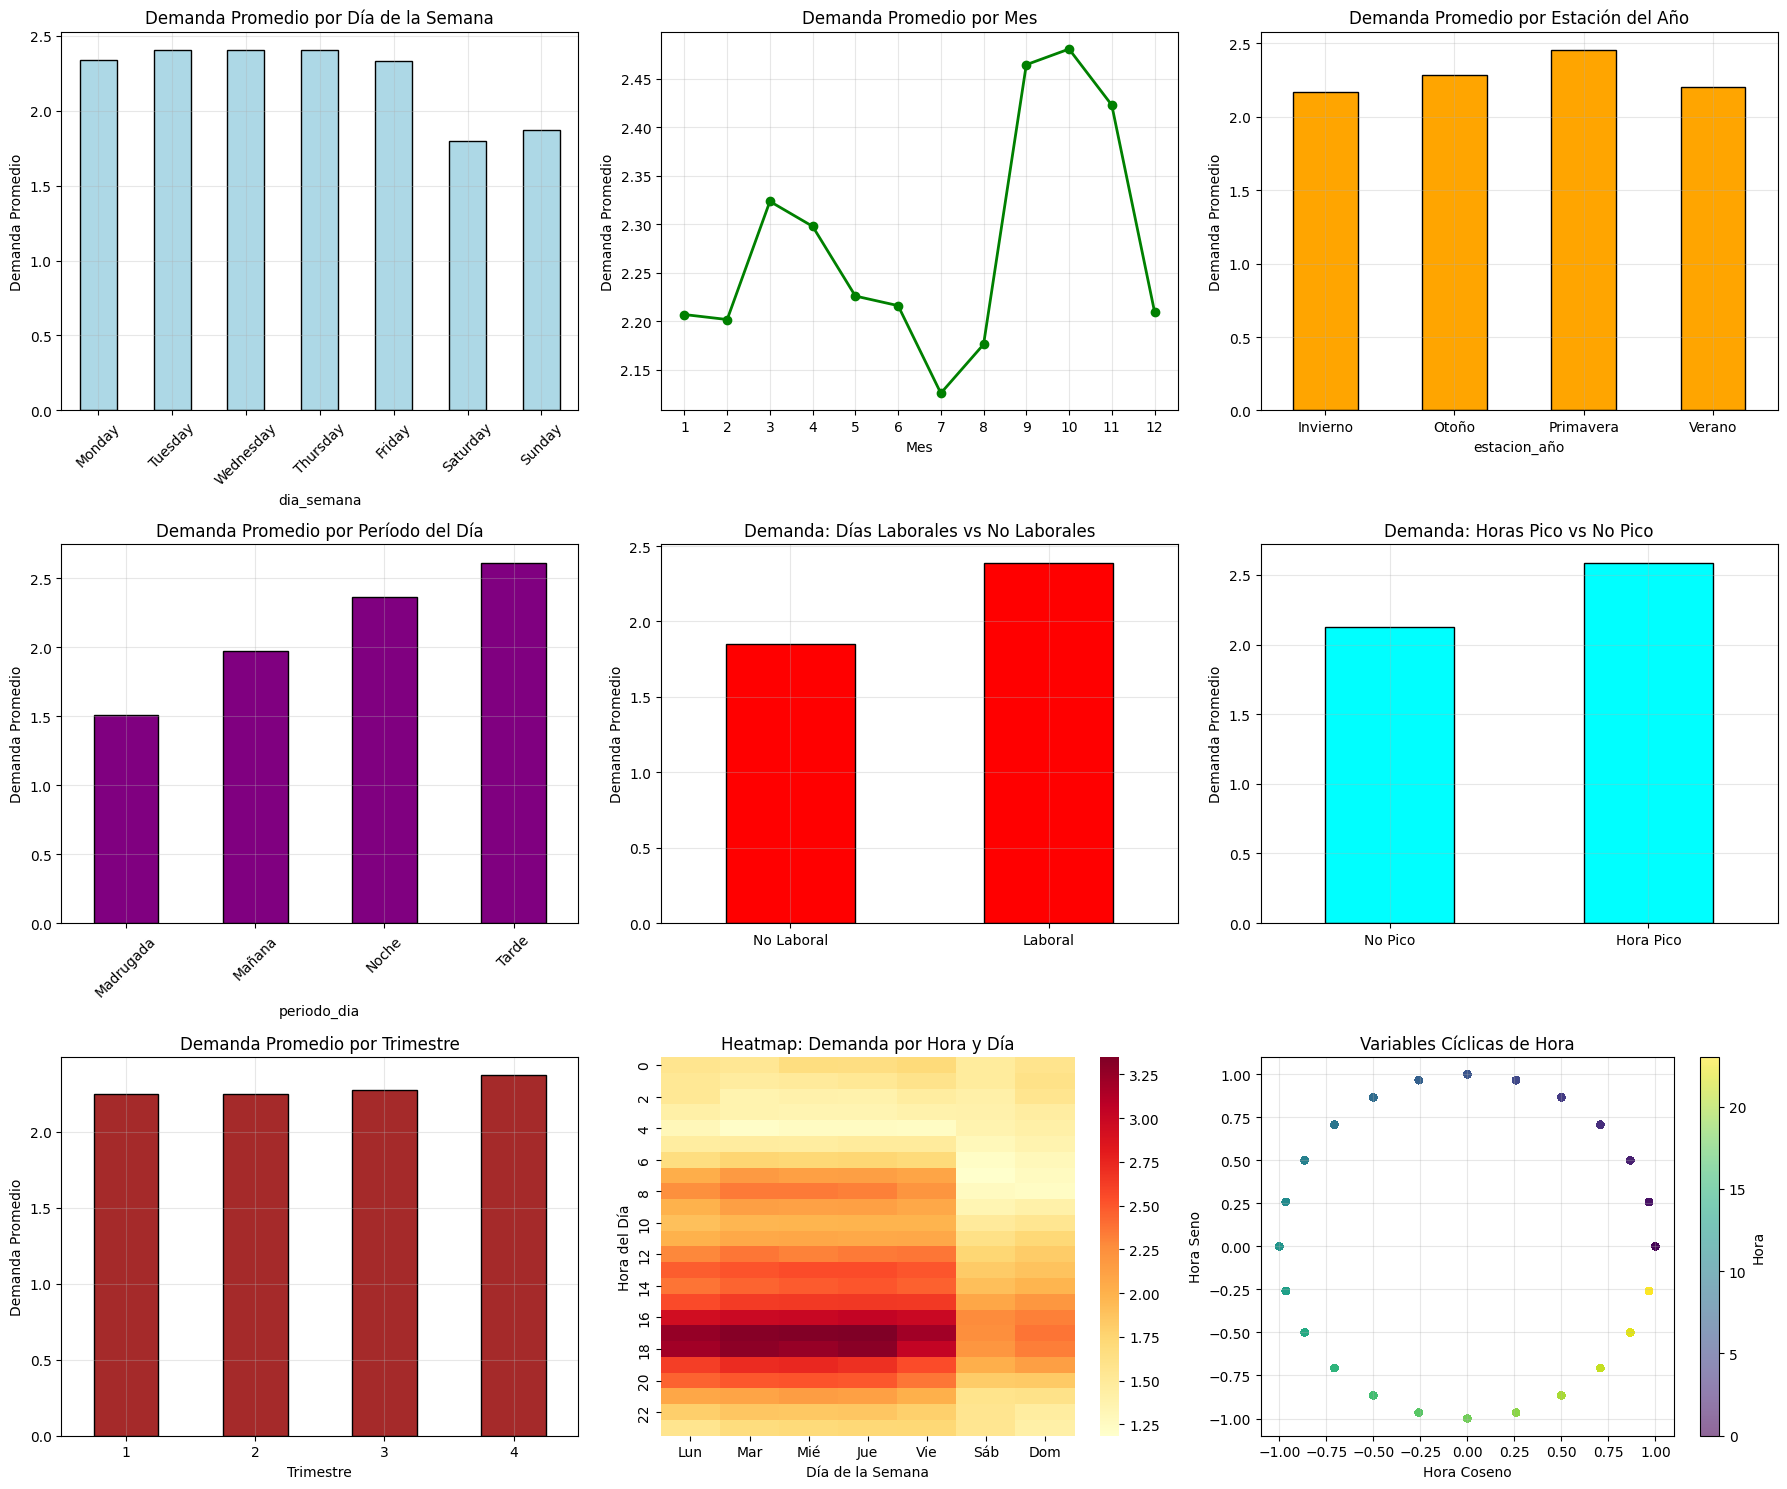


=== ESTAD√çSTICAS RESUMIDAS ===
Distribuci√≥n por tipo de d√≠a:
  - D√≠as laborales: 80.9%
  - Fines de semana: 16.4%
  - Feriados: 3.4%
  - Horas pico: 35.2%

Demanda promedio por categor√≠a:
  - D√≠as laborales: 2.39
  - D√≠as no laborales: 1.85
  - Horas pico: 2.59
  - D√≠as no laborales: 1.85
  - Horas pico: 2.59
  - Horas no pico: 2.13

Dataset final:
  - Filas: 1,229,535
  - Columnas: 28
  - Variables temporales/derivadas: 18
  - Horas no pico: 2.13

Dataset final:
  - Filas: 1,229,535
  - Columnas: 28
  - Variables temporales/derivadas: 18


In [125]:
# An√°lisis de las variables temporales y derivadas creadas
print("=== AN√ÅLISIS DE VARIABLES TEMPORALES Y DERIVADAS ===")

fig, axes = plt.subplots(3, 3, figsize=(18, 15))

# 1. Demanda por d√≠a de la semana
demanda_por_dia_sem = demanda_por_estacion.groupby('dia_semana')['demanda_bicicletas'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
demanda_por_dia_sem.plot(kind='bar', ax=axes[0,0], color='lightblue', edgecolor='black')
axes[0,0].set_title('Demanda Promedio por D√≠a de la Semana')
axes[0,0].set_ylabel('Demanda Promedio')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(True, alpha=0.3)

# 2. Demanda por mes
demanda_por_mes_nuevo = demanda_por_estacion.groupby('mes')['demanda_bicicletas'].mean()
demanda_por_mes_nuevo.plot(kind='line', ax=axes[0,1], color='green', marker='o', linewidth=2, markersize=6)
axes[0,1].set_title('Demanda Promedio por Mes')
axes[0,1].set_ylabel('Demanda Promedio')
axes[0,1].set_xlabel('Mes')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].set_xticks(range(1, 13))

# 3. Demanda por estaci√≥n del a√±o
demanda_por_estacion_nueva = demanda_por_estacion.groupby('estacion_a√±o')['demanda_bicicletas'].mean()
demanda_por_estacion_nueva.plot(kind='bar', ax=axes[0,2], color='orange', edgecolor='black')
axes[0,2].set_title('Demanda Promedio por Estaci√≥n del A√±o')
axes[0,2].set_ylabel('Demanda Promedio')
axes[0,2].tick_params(axis='x', rotation=0)
axes[0,2].grid(True, alpha=0.3)

# 4. Demanda por per√≠odo del d√≠a
demanda_por_periodo = demanda_por_estacion.groupby('periodo_dia')['demanda_bicicletas'].mean()
demanda_por_periodo.plot(kind='bar', ax=axes[1,0], color='purple', edgecolor='black')
axes[1,0].set_title('Demanda Promedio por Per√≠odo del D√≠a')
axes[1,0].set_ylabel('Demanda Promedio')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].grid(True, alpha=0.3)

# 5. Comparaci√≥n d√≠as laborales vs no laborales
demanda_laboral = demanda_por_estacion.groupby('es_dia_laboral')['demanda_bicicletas'].mean()
demanda_laboral.index = ['No Laboral', 'Laboral']
demanda_laboral.plot(kind='bar', ax=axes[1,1], color='red', edgecolor='black')
axes[1,1].set_title('Demanda: D√≠as Laborales vs No Laborales')
axes[1,1].set_ylabel('Demanda Promedio')
axes[1,1].tick_params(axis='x', rotation=0)
axes[1,1].grid(True, alpha=0.3)

# 6. Demanda en horas pico vs no pico
demanda_pico = demanda_por_estacion.groupby('es_hora_pico')['demanda_bicicletas'].mean()
demanda_pico.index = ['No Pico', 'Hora Pico']
demanda_pico.plot(kind='bar', ax=axes[1,2], color='cyan', edgecolor='black')
axes[1,2].set_title('Demanda: Horas Pico vs No Pico')
axes[1,2].set_ylabel('Demanda Promedio')
axes[1,2].tick_params(axis='x', rotation=0)
axes[1,2].grid(True, alpha=0.3)

# 7. Demanda por trimestre
demanda_trimestre = demanda_por_estacion.groupby('trimestre')['demanda_bicicletas'].mean()
demanda_trimestre.plot(kind='bar', ax=axes[2,0], color='brown', edgecolor='black')
axes[2,0].set_title('Demanda Promedio por Trimestre')
axes[2,0].set_ylabel('Demanda Promedio')
axes[2,0].set_xlabel('Trimestre')
axes[2,0].tick_params(axis='x', rotation=0)
axes[2,0].grid(True, alpha=0.3)

# 8. Heatmap: Demanda por hora y d√≠a de la semana
pivot_demanda_nuevo = demanda_por_estacion.pivot_table(
    values='demanda_bicicletas', 
    index='hora_origen', 
    columns='numero_dia_semana', 
    aggfunc='mean'
)
pivot_demanda_nuevo.columns = ['Lun', 'Mar', 'Mi√©', 'Jue', 'Vie', 'S√°b', 'Dom']

sns.heatmap(pivot_demanda_nuevo, annot=False, cmap='YlOrRd', ax=axes[2,1])
axes[2,1].set_title('Heatmap: Demanda por Hora y D√≠a')
axes[2,1].set_ylabel('Hora del D√≠a')
axes[2,1].set_xlabel('D√≠a de la Semana')

# 9. Variables c√≠clicas - ejemplo con hora
scatter = axes[2,2].scatter(demanda_por_estacion['hora_cos'], demanda_por_estacion['hora_sin'], 
                           c=demanda_por_estacion['hora_origen'], cmap='viridis', alpha=0.6, s=20)
axes[2,2].set_title('Variables C√≠clicas de Hora')
axes[2,2].set_xlabel('Hora Coseno')
axes[2,2].set_ylabel('Hora Seno')
axes[2,2].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[2,2], label='Hora')

plt.tight_layout()
plt.show()

# Estad√≠sticas resumidas
print(f"\n=== ESTAD√çSTICAS RESUMIDAS ===")
print(f"Distribuci√≥n por tipo de d√≠a:")
print(f"  - D√≠as laborales: {(demanda_por_estacion['es_dia_laboral'].sum() / len(demanda_por_estacion) * 100):.1f}%")
print(f"  - Fines de semana: {(demanda_por_estacion['es_fin_de_semana'].sum() / len(demanda_por_estacion) * 100):.1f}%")
print(f"  - Feriados: {(demanda_por_estacion['es_feriado'].sum() / len(demanda_por_estacion) * 100):.1f}%")
print(f"  - Horas pico: {(demanda_por_estacion['es_hora_pico'].sum() / len(demanda_por_estacion) * 100):.1f}%")

print(f"\nDemanda promedio por categor√≠a:")
print(f"  - D√≠as laborales: {demanda_por_estacion[demanda_por_estacion['es_dia_laboral']]['demanda_bicicletas'].mean():.2f}")
print(f"  - D√≠as no laborales: {demanda_por_estacion[~demanda_por_estacion['es_dia_laboral']]['demanda_bicicletas'].mean():.2f}")
print(f"  - Horas pico: {demanda_por_estacion[demanda_por_estacion['es_hora_pico']]['demanda_bicicletas'].mean():.2f}")
print(f"  - Horas no pico: {demanda_por_estacion[~demanda_por_estacion['es_hora_pico']]['demanda_bicicletas'].mean():.2f}")

print(f"\nDataset final:")
print(f"  - Filas: {len(demanda_por_estacion):,}")
print(f"  - Columnas: {len(demanda_por_estacion.columns)}")
print(f"  - Variables temporales/derivadas: 18")

In [154]:
demanda_por_estacion.head(1)

fecha_origen     nombre_estacion_origen  hora_origen  demanda_bicicletas  \
0   2024-01-01  001 - FACULTAD DE DERECHO            6                   2   

  dia_semana  numero_dia_semana  mes  dia_del_mes  semana_del_a√±o  trimestre  \
0     Monday                  0    1            1               1          1   

   es_fin_de_semana  es_feriado estacion_a√±o periodo_dia  es_hora_pico  \
0             False        True       Verano      Ma√±ana         False   

   es_dia_laboral  hora_sin      hora_cos  dia_semana_sin  dia_semana_cos  \
0           False       1.0  6.123234e-17             0.0             1.0   

   mes_sin   mes_cos  dia_del_mes_sin  dia_del_mes_cos  semana_del_a√±o_sin  \
0      0.5  0.866025         0.201299          0.97953            0.120537   

   semana_del_a√±o_cos  trimestre_sin  trimestre_cos  
0            0.992709            1.0   6.123234e-17

In [138]:
df_aplicar_reduccion = demanda_por_estacion[['nombre_estacion_origen', 'hora_origen',
       'demanda_bicicletas', 'es_fin_de_semana','es_feriado','estacion_a√±o','periodo_dia','es_hora_pico',
       'es_dia_laboral','hora_cos','dia_semana_cos','mes_cos','dia_del_mes_cos', 'semana_del_a√±o_cos','trimestre_cos']].copy()



# Encoding de Variables Categ√≥ricas para Reducci√≥n de Dimensionalidad

Antes de aplicar t√©cnicas de reducci√≥n de dimensionalidad como PCA, necesitamos convertir todas las variables categ√≥ricas a formato num√©rico.

In [187]:
# Primero, analicemos la estructura del dataframe
print("Estructura del dataframe df_aplicar_reduccion:")
print("="*50)
print(f"Dimensiones: {df_aplicar_reduccion.shape}")
print("\nTipos de datos:")
print(df_aplicar_reduccion.dtypes)
print("\nInformaci√≥n general:")
df_aplicar_reduccion.info()

Estructura del dataframe df_aplicar_reduccion:
Dimensiones: (1229535, 15)

Tipos de datos:
nombre_estacion_origen     object
hora_origen                 int32
demanda_bicicletas          int64
es_fin_de_semana             bool
es_feriado                   bool
estacion_a√±o               object
periodo_dia                object
es_hora_pico                 bool
es_dia_laboral               bool
hora_cos                  float64
dia_semana_cos            float64
mes_cos                   float64
dia_del_mes_cos           float64
semana_del_a√±o_cos        Float64
trimestre_cos             float64
dtype: object

Informaci√≥n general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229535 entries, 0 to 1229534
Data columns (total 15 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   nombre_estacion_origen  1229535 non-null  object 
 1   hora_origen             1229535 non-null  int32  
 2   demanda_bicicletas    

In [188]:
# Analicemos las variables categ√≥ricas que necesitan encoding
variables_categoricas = ['nombre_estacion_origen', 'estacion_a√±o', 'periodo_dia']
variables_booleanas = ['es_fin_de_semana', 'es_feriado', 'es_hora_pico', 'es_dia_laboral']

print("Variables categ√≥ricas a codificar:")
for var in variables_categoricas:
    print(f"\n{var}:")
    print(f"  - Valores √∫nicos: {df_aplicar_reduccion[var].nunique()}")
    print(f"  - Algunos valores: {list(df_aplicar_reduccion[var].unique()[:10])}")
    
print("\nVariables booleanas (ya est√°n en formato num√©rico):")
for var in variables_booleanas:
    print(f"{var}: {df_aplicar_reduccion[var].dtype}")
    print(f"  Valores √∫nicos: {df_aplicar_reduccion[var].unique()}")

Variables categ√≥ricas a codificar:

nombre_estacion_origen:
  - Valores √∫nicos: 395
  - Algunos valores: ['001 - FACULTAD DE DERECHO', '002 - Retiro I', '003 - ADUANA', '004 - Plaza Roma', '005 - Plaza Italia', '007 - OBELISCO', '008 - Congreso', '009 - Parque Las Heras', '010 - Madero UCA', '011 - RIO DE JANEIRO']

estacion_a√±o:
  - Valores √∫nicos: 4
  - Algunos valores: ['Verano', 'Oto√±o', 'Invierno', 'Primavera']

periodo_dia:
  - Valores √∫nicos: 4
  - Algunos valores: ['Ma√±ana', 'Tarde', 'Noche', 'Madrugada']

Variables booleanas (ya est√°n en formato num√©rico):
es_fin_de_semana: bool
  Valores √∫nicos: [False  True]
es_feriado: bool
  Valores √∫nicos: [ True False]
es_hora_pico: bool
  Valores √∫nicos: [False  True]
es_dia_laboral: bool
  Valores √∫nicos: [False  True]


## Estrategia de Encoding

Aplicaremos diferentes t√©cnicas de encoding seg√∫n el tipo de variable:

1. **Variables booleanas**: Ya est√°n en formato num√©rico (0/1)
2. **Variables ordinales** (`estacion_a√±o`, `periodo_dia`): Label Encoding con orden l√≥gico
3. **Variable nominal de alta cardinalidad** (`nombre_estacion_origen`): Target Encoding
4. **Variables num√©ricas c√≠clicas**: Ya est√°n transformadas con funciones trigonom√©tricas

In [189]:
# Importamos las librer√≠as necesarias para encoding
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import numpy as np

# Crear una copia del dataframe para el encoding
df_encoded = df_aplicar_reduccion.copy()

print("Dataframe original:")
print(f"Forma: {df_encoded.shape}")
print(f"Columnas: {list(df_encoded.columns)}")

Dataframe original:
Forma: (1229535, 15)
Columnas: ['nombre_estacion_origen', 'hora_origen', 'demanda_bicicletas', 'es_fin_de_semana', 'es_feriado', 'estacion_a√±o', 'periodo_dia', 'es_hora_pico', 'es_dia_laboral', 'hora_cos', 'dia_semana_cos', 'mes_cos', 'dia_del_mes_cos', 'semana_del_a√±o_cos', 'trimestre_cos']


In [190]:
# 1. CONVERSI√ìN DE VARIABLES BOOLEANAS A ENTEROS
print("1. Convirtiendo variables booleanas a enteros...")
variables_bool = ['es_fin_de_semana', 'es_feriado', 'es_hora_pico', 'es_dia_laboral']

for var in variables_bool:
    df_encoded[var] = df_encoded[var].astype(int)
    print(f"   {var}: {df_encoded[var].dtype}")

print("‚úì Variables booleanas convertidas")

1. Convirtiendo variables booleanas a enteros...
   es_fin_de_semana: int64
   es_feriado: int64
   es_hora_pico: int64
   es_dia_laboral: int64
‚úì Variables booleanas convertidas


In [191]:
# 2. LABEL ENCODING PARA VARIABLES ORDINALES CON ORDEN L√ìGICO
print("2. Aplicando Label Encoding a variables ordinales...")

# Estaci√≥n del a√±o (orden por temperatura/actividad)
estacion_orden = {'Invierno': 0, 'Oto√±o': 1, 'Primavera': 2, 'Verano': 3}
df_encoded['estacion_a√±o_encoded'] = df_encoded['estacion_a√±o'].map(estacion_orden)

print(f"   estacion_a√±o: {df_encoded['estacion_a√±o'].unique()}")
print(f"   estacion_a√±o_encoded: {df_encoded['estacion_a√±o_encoded'].unique()}")

# Per√≠odo del d√≠a (orden temporal)
periodo_orden = {'Madrugada': 0, 'Ma√±ana': 1, 'Tarde': 2, 'Noche': 3}
df_encoded['periodo_dia_encoded'] = df_encoded['periodo_dia'].map(periodo_orden)

print(f"   periodo_dia: {df_encoded['periodo_dia'].unique()}")
print(f"   periodo_dia_encoded: {df_encoded['periodo_dia_encoded'].unique()}")

print("‚úì Variables ordinales codificadas")

2. Aplicando Label Encoding a variables ordinales...
   estacion_a√±o: ['Verano' 'Oto√±o' 'Invierno' 'Primavera']
   estacion_a√±o_encoded: [3 1 0 2]
   periodo_dia: ['Ma√±ana' 'Tarde' 'Noche' 'Madrugada']
   periodo_dia_encoded: [1 2 3 0]
‚úì Variables ordinales codificadas


In [192]:
# 3. TARGET ENCODING PARA VARIABLE DE ALTA CARDINALIDAD
print("3. Aplicando Target Encoding a nombre_estacion_origen...")

# Calculamos la media de demanda por estaci√≥n
target_means_estacion = df_encoded.groupby('nombre_estacion_origen')['demanda_bicicletas'].mean()

# Aplicamos target encoding
df_encoded['estacion_target_encoded'] = df_encoded['nombre_estacion_origen'].map(target_means_estacion)

print(f"   Estaciones √∫nicas: {df_encoded['nombre_estacion_origen'].nunique()}")
print(f"   Rango de target encoding: {df_encoded['estacion_target_encoded'].min():.2f} - {df_encoded['estacion_target_encoded'].max():.2f}")

# Mostramos algunos ejemplos
print("\\n   Ejemplos de encoding por estaci√≥n:")
ejemplos = target_means_estacion.head(10)
for estacion, valor in ejemplos.items():
    print(f"     {estacion}: {valor:.2f}")

print("‚úì Target encoding aplicado")

3. Aplicando Target Encoding a nombre_estacion_origen...
   Estaciones √∫nicas: 395
   Rango de target encoding: 1.32 - 5.14
\n   Ejemplos de encoding por estaci√≥n:
     -CDO CUCHA CUCHA-: 2.11
     001 - FACULTAD DE DERECHO: 4.33
     002 - Retiro I: 2.78
     003 - ADUANA: 3.16
     004 - Plaza Roma: 3.40
     005 - Plaza Italia: 4.18
     006 - Parque Lezama: 2.42
     007 - OBELISCO: 1.87
     008 - Congreso: 3.98
     009 - Parque Las Heras: 3.49
‚úì Target encoding aplicado


In [193]:
# 4. CREACI√ìN DEL DATAFRAME FINAL COMPLETAMENTE NUM√âRICO
print("4. Creando dataframe final completamente num√©rico...")

# Seleccionamos solo las columnas num√©ricas y las nuevas variables encoded
columnas_finales = [
    # Variables originales num√©ricas
    'hora_origen', 'demanda_bicicletas',
    
    # Variables booleanas convertidas
    'es_fin_de_semana', 'es_feriado', 'es_hora_pico', 'es_dia_laboral',
    
    # Variables categ√≥ricas encoded
    'estacion_a√±o_encoded', 'periodo_dia_encoded', 'estacion_target_encoded',
    
    # Variables c√≠clicas (ya num√©ricas)
    'hora_cos', 'dia_semana_cos', 'mes_cos', 'dia_del_mes_cos', 
    'semana_del_a√±o_cos', 'trimestre_cos'
]

df_encoded_final = df_encoded[columnas_finales].copy()

print(f"‚úì Dataframe final creado:")
print(f"   Forma: {df_encoded_final.shape}")
print(f"   Columnas: {list(df_encoded_final.columns)}")
print(f"\\n   Tipos de datos:")
print(df_encoded_final.dtypes)
print(f"\\n   ¬øHay valores nulos? {df_encoded_final.isnull().sum().sum()}")

4. Creando dataframe final completamente num√©rico...
‚úì Dataframe final creado:
   Forma: (1229535, 15)
   Columnas: ['hora_origen', 'demanda_bicicletas', 'es_fin_de_semana', 'es_feriado', 'es_hora_pico', 'es_dia_laboral', 'estacion_a√±o_encoded', 'periodo_dia_encoded', 'estacion_target_encoded', 'hora_cos', 'dia_semana_cos', 'mes_cos', 'dia_del_mes_cos', 'semana_del_a√±o_cos', 'trimestre_cos']
\n   Tipos de datos:
hora_origen                  int32
demanda_bicicletas           int64
es_fin_de_semana             int64
es_feriado                   int64
es_hora_pico                 int64
es_dia_laboral               int64
estacion_a√±o_encoded         int64
periodo_dia_encoded          int64
estacion_target_encoded    float64
hora_cos                   float64
dia_semana_cos             float64
mes_cos                    float64
dia_del_mes_cos            float64
semana_del_a√±o_cos         Float64
trimestre_cos              float64
dtype: object
\n   ¬øHay valores nulos? 0


In [194]:
# 5. PREPARACI√ìN PARA REDUCCI√ìN DE DIMENSIONALIDAD
print("5. Preparando datos para reducci√≥n de dimensionalidad...")

# Separamos la variable objetivo de las caracter√≠sticas
X_features = df_encoded_final.drop('demanda_bicicletas', axis=1)
y_target = df_encoded_final['demanda_bicicletas']

print(f"‚úì Variables predictoras (X): {X_features.shape}")
print(f"‚úì Variable objetivo (y): {y_target.shape}")

# Verificamos estad√≠sticas b√°sicas
print(f"\\nEstad√≠sticas de las variables predictoras:")
print(X_features.describe())

5. Preparando datos para reducci√≥n de dimensionalidad...
‚úì Variables predictoras (X): (1229535, 14)
‚úì Variable objetivo (y): (1229535,)
\nEstad√≠sticas de las variables predictoras:
        hora_origen  es_fin_de_semana    es_feriado  es_hora_pico  \
count  1.229535e+06      1.229535e+06  1.229535e+06  1.229535e+06   
mean   1.363365e+01      1.640693e-01  3.447238e-02  3.523031e-01   
std    5.766247e+00      3.703386e-01  1.824392e-01  4.776880e-01   
min    0.000000e+00      0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.000000e+01      0.000000e+00  0.000000e+00  0.000000e+00   
50%    1.400000e+01      0.000000e+00  0.000000e+00  0.000000e+00   
75%    1.800000e+01      0.000000e+00  0.000000e+00  1.000000e+00   
max    2.300000e+01      1.000000e+00  1.000000e+00  1.000000e+00   

       es_dia_laboral  estacion_a√±o_encoded  periodo_dia_encoded  \
count    1.229535e+06          1.229535e+06         1.229535e+06   
mean     8.093328e-01          1.589212e+00         1.

In [196]:
# 6. ESTANDARIZACI√ìN DE VARIABLES PARA PCA
print("6. Estandarizando variables para PCA...")

# Las t√©cnicas de reducci√≥n de dimensionalidad como PCA requieren que las variables est√©n estandarizadas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

# Convertimos de vuelta a DataFrame para mantener los nombres de columnas
X_scaled_df = pd.DataFrame(X_scaled, columns=X_features.columns, index=X_features.index)

print(f"‚úì Variables estandarizadas:")
print(f"   Forma: {X_scaled_df.shape}")
print(f"   Media por columna (debe ser ~0): {X_scaled_df.mean().round(10)}")
print(f"   Desviaci√≥n est√°ndar por columna (debe ser ~1): {X_scaled_df.std().round(3)}")

print("\\n‚úÖ Datos listos para aplicar t√©cnicas de reducci√≥n de dimensionalidad!")

6. Estandarizando variables para PCA...
‚úì Variables estandarizadas:
   Forma: (1229535, 14)
   Media por columna (debe ser ~0): hora_origen               -0.0
es_fin_de_semana          -0.0
es_feriado                 0.0
es_hora_pico              -0.0
es_dia_laboral            -0.0
estacion_a√±o_encoded      -0.0
periodo_dia_encoded       -0.0
estacion_target_encoded   -0.0
hora_cos                   0.0
dia_semana_cos            -0.0
mes_cos                   -0.0
dia_del_mes_cos            0.0
semana_del_a√±o_cos        -0.0
trimestre_cos              0.0
dtype: float64
   Desviaci√≥n est√°ndar por columna (debe ser ~1): hora_origen                1.0
es_fin_de_semana           1.0
es_feriado                 1.0
es_hora_pico               1.0
es_dia_laboral             1.0
estacion_a√±o_encoded       1.0
periodo_dia_encoded        1.0
estacion_target_encoded    1.0
hora_cos                   1.0
dia_semana_cos             1.0
mes_cos                    1.0
dia_del_mes_cos          

## Resumen del Proceso de Encoding

Hemos aplicado exitosamente t√©cnicas de encoding a todas las variables categ√≥ricas del dataframe `df_aplicar_reduccion`:

### Transformaciones aplicadas:

1. **Variables booleanas** ‚Üí **Enteros (0/1)**:
   - `es_fin_de_semana`, `es_feriado`, `es_hora_pico`, `es_dia_laboral`

2. **Variables ordinales** ‚Üí **Label Encoding con orden l√≥gico**:
   - `estacion_a√±o`: Invierno(0) < Oto√±o(1) < Primavera(2) < Verano(3)
   - `periodo_dia`: Madrugada(0) < Ma√±ana(1) < Tarde(2) < Noche(3)

3. **Variable nominal de alta cardinalidad** ‚Üí **Target Encoding**:
   - `nombre_estacion_origen`: Codificada usando la media de demanda por estaci√≥n

4. **Variables num√©ricas c√≠clicas**: Ya estaban en formato adecuado
   - Variables coseno: `hora_cos`, `dia_semana_cos`, `mes_cos`, etc.

5. **Estandarizaci√≥n**: Todas las variables fueron estandarizadas (media=0, std=1)

### Resultado final:
- **Dataframe original**: 15 columnas (3 categ√≥ricas, 4 booleanas, 8 num√©ricas)
- **Dataframe encoded**: 14 variables predictoras + 1 variable objetivo
- **Todas las variables son num√©ricas** y est√°n listas para PCA, t-SNE, UMAP, etc.

In [197]:
# VERIFICACI√ìN FINAL: Mostramos las primeras filas del dataframe procesado
print("Verificaci√≥n final del dataframe procesado:")
print("="*60)
print("\\nüìä Dataframes disponibles para reducci√≥n de dimensionalidad:")
print(f"   ‚Ä¢ X_scaled_df: Variables predictoras estandarizadas - Forma: {X_scaled_df.shape}")
print(f"   ‚Ä¢ y_target: Variable objetivo - Forma: {y_target.shape}")

print("\\nüîç Primeras 5 filas de X_scaled_df:")
print(X_scaled_df.head())

print("\\nüìà Informaci√≥n de correlaci√≥n con la variable objetivo:")
correlaciones_con_target = pd.DataFrame({
    'Variable': X_features.columns,
    'Correlaci√≥n_con_demanda': [np.corrcoef(X_features[col], y_target)[0,1] for col in X_features.columns]
}).sort_values('Correlaci√≥n_con_demanda', key=abs, ascending=False)

print(correlaciones_con_target)

Verificaci√≥n final del dataframe procesado:
\nüìä Dataframes disponibles para reducci√≥n de dimensionalidad:
   ‚Ä¢ X_scaled_df: Variables predictoras estandarizadas - Forma: (1229535, 14)
   ‚Ä¢ y_target: Variable objetivo - Forma: (1229535,)
\nüîç Primeras 5 filas de X_scaled_df:
   hora_origen  es_fin_de_semana  es_feriado  es_hora_pico  es_dia_laboral  \
0    -1.323851         -0.443025    5.292327     -0.737517       -2.060277   
1    -0.803582         -0.443025    5.292327      1.355900       -2.060277   
2    -0.630158         -0.443025    5.292327     -0.737517       -2.060277   
3    -0.456735         -0.443025    5.292327     -0.737517       -2.060277   
4    -0.109889         -0.443025    5.292327     -0.737517       -2.060277   

   estacion_a√±o_encoded  periodo_dia_encoded  estacion_target_encoded  \
0              1.291468            -0.962949                 2.953945   
1              1.291468            -0.962949                 2.953945   
2              1.291468  

# An√°lisis de Componentes Principales (PCA)

Aplicaremos PCA para reducir la dimensionalidad de nuestros datos y identificar los componentes principales que explican la mayor varianza en los datos.

In [198]:
# Importamos las librer√≠as necesarias para PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

print("üîç PASO 1: An√°lisis exploratorio de varianza")
print("="*50)

# Primero, aplicamos PCA completo para analizar toda la varianza
pca_completo = PCA()
X_pca_completo = pca_completo.fit_transform(X_scaled_df)

# Varianza explicada por cada componente
varianza_explicada = pca_completo.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada)

print(f"üìä An√°lisis de varianza explicada:")
print(f"   Total de componentes posibles: {len(varianza_explicada)}")
print(f"   Varianza del 1er componente: {varianza_explicada[0]:.4f} ({varianza_explicada[0]*100:.2f}%)")
print(f"   Varianza del 2do componente: {varianza_explicada[1]:.4f} ({varianza_explicada[1]*100:.2f}%)")
print(f"   Varianza del 3er componente: {varianza_explicada[2]:.4f} ({varianza_explicada[2]*100:.2f}%)")

# Mostramos cu√°ntos componentes necesitamos para explicar cierto porcentaje de varianza
for threshold in [0.5, 0.7, 0.8, 0.9, 0.95]:
    n_components = np.argmax(varianza_acumulada >= threshold) + 1
    print(f"   Para {threshold*100:.0f}% de varianza: {n_components} componentes")

üîç PASO 1: An√°lisis exploratorio de varianza
üìä An√°lisis de varianza explicada:
   Total de componentes posibles: 14
   Varianza del 1er componente: 0.2437 (24.37%)
   Varianza del 2do componente: 0.1480 (14.80%)
   Varianza del 3er componente: 0.1454 (14.54%)
   Para 50% de varianza: 3 componentes
   Para 70% de varianza: 6 componentes
   Para 80% de varianza: 7 componentes
   Para 90% de varianza: 9 componentes
   Para 95% de varianza: 9 componentes


üìà PASO 2: Visualizaci√≥n de la varianza explicada


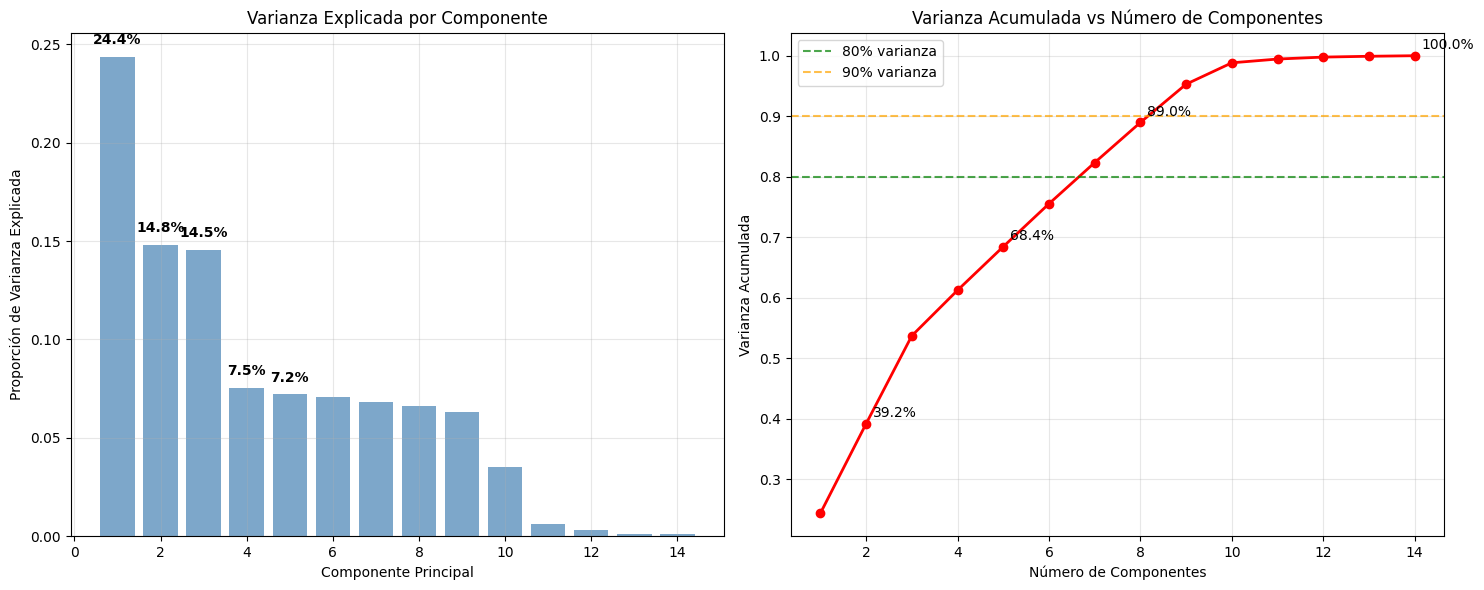

\nüí° Interpretaci√≥n:
   - Los primeros 3 componentes explican 53.7% de la varianza
   - Los primeros 6 componentes explican 75.5% de la varianza
   - Para 80% de varianza necesitamos 7 componentes


In [199]:
# PASO 2: Visualizaci√≥n de la varianza explicada
print("üìà PASO 2: Visualizaci√≥n de la varianza explicada")
print("="*50)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gr√°fico 1: Varianza explicada por cada componente
ax1.bar(range(1, len(varianza_explicada) + 1), varianza_explicada, alpha=0.7, color='steelblue')
ax1.set_xlabel('Componente Principal')
ax1.set_ylabel('Proporci√≥n de Varianza Explicada')
ax1.set_title('Varianza Explicada por Componente')
ax1.grid(True, alpha=0.3)

# A√±adimos etiquetas con porcentajes en las barras m√°s importantes
for i in range(min(5, len(varianza_explicada))):
    ax1.text(i+1, varianza_explicada[i] + 0.005, f'{varianza_explicada[i]*100:.1f}%', 
             ha='center', va='bottom', fontweight='bold')

# Gr√°fico 2: Varianza acumulada
ax2.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, 'o-', color='red', linewidth=2)
ax2.axhline(y=0.8, color='green', linestyle='--', alpha=0.7, label='80% varianza')
ax2.axhline(y=0.9, color='orange', linestyle='--', alpha=0.7, label='90% varianza')
ax2.set_xlabel('N√∫mero de Componentes')
ax2.set_ylabel('Varianza Acumulada')
ax2.set_title('Varianza Acumulada vs N√∫mero de Componentes')
ax2.legend()
ax2.grid(True, alpha=0.3)

# A√±adimos algunas etiquetas importantes
important_points = [2, 5, 8, len(varianza_acumulada)]
for point in important_points:
    if point <= len(varianza_acumulada):
        ax2.annotate(f'{varianza_acumulada[point-1]*100:.1f}%', 
                    xy=(point, varianza_acumulada[point-1]), 
                    xytext=(5, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

print(f"\\nüí° Interpretaci√≥n:")
print(f"   - Los primeros 3 componentes explican {varianza_acumulada[2]*100:.1f}% de la varianza")
print(f"   - Los primeros 6 componentes explican {varianza_acumulada[5]*100:.1f}% de la varianza")
print(f"   - Para 80% de varianza necesitamos {np.argmax(varianza_acumulada >= 0.8) + 1} componentes")

In [200]:
# PASO 3: An√°lisis de los componentes principales m√°s importantes
print("üî¨ PASO 3: An√°lisis de los componentes principales")
print("="*50)

# Seleccionamos un n√∫mero √≥ptimo de componentes (ej. para 80% de varianza)
n_componentes_optimo = np.argmax(varianza_acumulada >= 0.8) + 1
print(f"üìä N√∫mero √≥ptimo de componentes (80% varianza): {n_componentes_optimo}")

# Aplicamos PCA con el n√∫mero √≥ptimo de componentes
pca_optimo = PCA(n_components=n_componentes_optimo)
X_pca_reducido = pca_optimo.fit_transform(X_scaled_df)

print(f"\\n‚úÖ Reducci√≥n de dimensionalidad completada:")
print(f"   Dimensiones originales: {X_scaled_df.shape}")
print(f"   Dimensiones reducidas: {X_pca_reducido.shape}")
print(f"   Reducci√≥n: {X_scaled_df.shape[1]} ‚Üí {X_pca_reducido.shape[1]} variables")
print(f"   Varianza preservada: {pca_optimo.explained_variance_ratio_.sum()*100:.2f}%")

# An√°lisis de loadings (contribuciones de variables originales a cada componente)
print(f"\\nüîç Loadings de los componentes principales:")
componentes_principales = pca_optimo.components_

# Crear DataFrame de loadings para mejor visualizaci√≥n
loadings_df = pd.DataFrame(
    componentes_principales.T,
    columns=[f'PC{i+1}' for i in range(n_componentes_optimo)],
    index=X_scaled_df.columns
)

print(loadings_df.round(3))

üî¨ PASO 3: An√°lisis de los componentes principales
üìä N√∫mero √≥ptimo de componentes (80% varianza): 7
\n‚úÖ Reducci√≥n de dimensionalidad completada:
   Dimensiones originales: (1229535, 14)
   Dimensiones reducidas: (1229535, 7)
   Reducci√≥n: 14 ‚Üí 7 variables
   Varianza preservada: 82.33%
\nüîç Loadings de los componentes principales:
                           PC1    PC2    PC3    PC4    PC5    PC6    PC7
hora_origen             -0.008  0.482  0.470 -0.014 -0.004  0.027  0.044
es_fin_de_semana         0.041  0.436 -0.459  0.120 -0.097 -0.220 -0.086
es_feriado               0.001  0.193 -0.207 -0.275  0.098  0.726 -0.001
es_hora_pico             0.002  0.139  0.064  0.624 -0.093 -0.154 -0.384
es_dia_laboral          -0.036 -0.471  0.497 -0.007  0.045 -0.063  0.082
estacion_a√±o_encoded     0.490 -0.021  0.024 -0.013 -0.013 -0.005  0.006
periodo_dia_encoded     -0.007  0.485  0.475 -0.007 -0.004  0.018  0.029
estacion_target_encoded -0.017  0.026 -0.094 -0.561  0.009 -0.560 

In [201]:
# PASO 4: Interpretaci√≥n de los componentes principales
print("üéØ PASO 4: Interpretaci√≥n de los componentes principales")
print("="*60)

# Analicemos cada componente principal por las variables que m√°s contribuyen
for i in range(n_componentes_optimo):
    print(f"\\nüìä COMPONENTE PRINCIPAL {i+1} (PC{i+1}):")
    print(f"   Varianza explicada: {pca_optimo.explained_variance_ratio_[i]*100:.2f}%")
    
    # Obtenemos las contribuciones absolutas para este componente
    contribuciones = np.abs(loadings_df.iloc[:, i])
    top_variables = contribuciones.nlargest(3)
    
    print("   Variables m√°s influyentes:")
    for var, contrib in top_variables.items():
        signo = "+" if loadings_df.loc[var, f'PC{i+1}'] > 0 else "-"
        print(f"     {signo} {var}: {contrib:.3f}")
    
    # Interpretaci√≥n conceptual
    if i == 0:
        print("   üí° Interpretaci√≥n: Componente temporal/estacional")
        print("      Relacionado con patrones estacionales y temporales c√≠clicos")
    elif i == 1:
        print("   üí° Interpretaci√≥n: Componente horario/laboral")
        print("      Relacionado con patrones horarios y d√≠as laborales")
    elif i == 2:
        print("   üí° Interpretaci√≥n: Componente horario/fin de semana")
        print("      Contraste entre per√≠odos laborales y no laborales")
    elif i == 3:
        print("   üí° Interpretaci√≥n: Componente de demanda por estaci√≥n")
        print("      Relacionado con caracter√≠sticas espec√≠ficas de estaciones")
    else:
        print("   üí° Componente adicional con menor varianza explicada")

üéØ PASO 4: Interpretaci√≥n de los componentes principales
\nüìä COMPONENTE PRINCIPAL 1 (PC1):
   Varianza explicada: 24.37%
   Variables m√°s influyentes:
     + mes_cos: 0.538
     + semana_del_a√±o_cos: 0.525
     + estacion_a√±o_encoded: 0.490
   üí° Interpretaci√≥n: Componente temporal/estacional
      Relacionado con patrones estacionales y temporales c√≠clicos
\nüìä COMPONENTE PRINCIPAL 2 (PC2):
   Varianza explicada: 14.80%
   Variables m√°s influyentes:
     + periodo_dia_encoded: 0.485
     + hora_origen: 0.482
     - es_dia_laboral: 0.471
   üí° Interpretaci√≥n: Componente horario/laboral
      Relacionado con patrones horarios y d√≠as laborales
\nüìä COMPONENTE PRINCIPAL 3 (PC3):
   Varianza explicada: 14.54%
   Variables m√°s influyentes:
     + es_dia_laboral: 0.497
     + periodo_dia_encoded: 0.475
     + hora_origen: 0.470
   üí° Interpretaci√≥n: Componente horario/fin de semana
      Contraste entre per√≠odos laborales y no laborales
\nüìä COMPONENTE PRINCIPAL 

üìä PASO 5: Visualizaci√≥n de los loadings


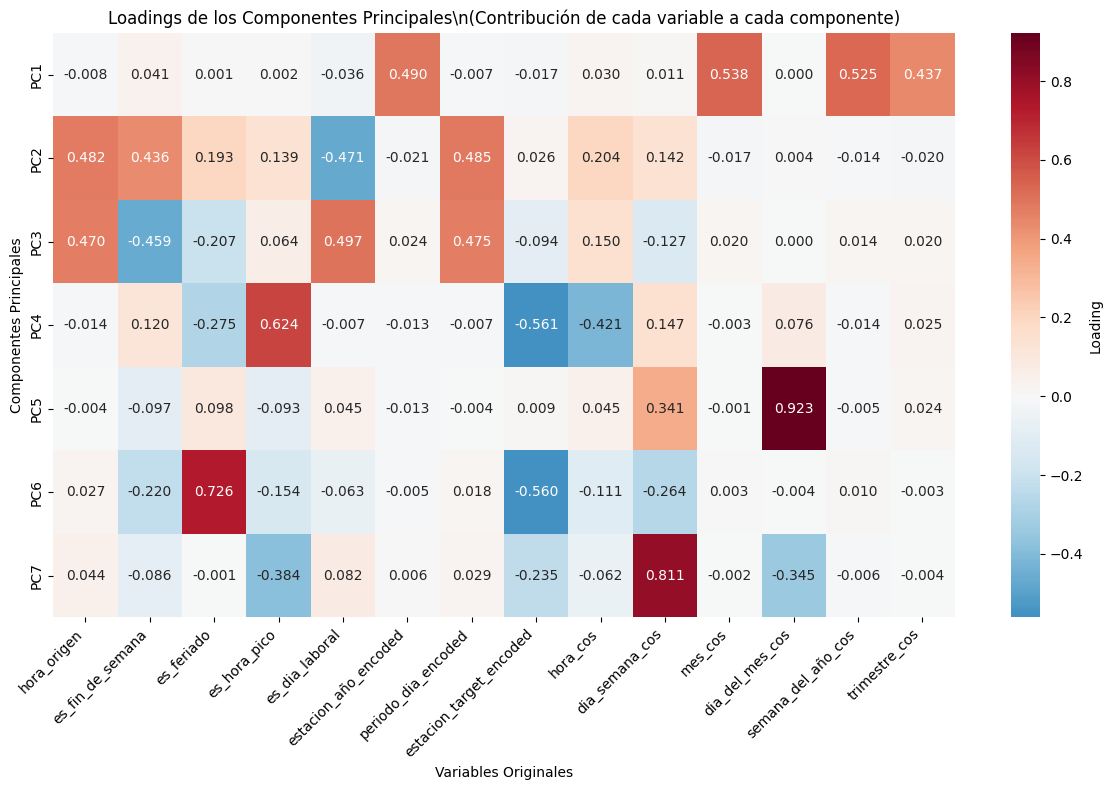

\nüí° Interpretaci√≥n del heatmap:
   üî¥ Valores rojos: Contribuci√≥n positiva fuerte
   üîµ Valores azules: Contribuci√≥n negativa fuerte
   ‚ö™ Valores blancos: Contribuci√≥n m√≠nima


In [202]:
# PASO 5: Visualizaci√≥n de los loadings
print("üìä PASO 5: Visualizaci√≥n de los loadings")
print("="*50)

# Heatmap de los loadings
plt.figure(figsize=(12, 8))
sns.heatmap(loadings_df.T, 
            annot=True, 
            cmap='RdBu_r', 
            center=0, 
            fmt='.3f',
            cbar_kws={'label': 'Loading'})
plt.title('Loadings de los Componentes Principales\\n(Contribuci√≥n de cada variable a cada componente)')
plt.xlabel('Variables Originales')
plt.ylabel('Componentes Principales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\\nüí° Interpretaci√≥n del heatmap:")
print("   üî¥ Valores rojos: Contribuci√≥n positiva fuerte")
print("   üîµ Valores azules: Contribuci√≥n negativa fuerte") 
print("   ‚ö™ Valores blancos: Contribuci√≥n m√≠nima")

In [205]:
# PASO 6: Crear DataFrame con componentes principales y an√°lisis de correlaci√≥n
print("üîó PASO 6: An√°lisis de correlaci√≥n con la variable objetivo")
print("="*60)

# Crear DataFrame con los componentes principales
df_pca = pd.DataFrame(
    X_pca_reducido,
    columns=[f'PC{i+1}' for i in range(n_componentes_optimo)],
    index=X_scaled_df.index
)

# A√±adir la variable objetivo
df_pca['demanda_bicicletas'] = y_target

# Calcular correlaciones entre componentes principales y variable objetivo
correlaciones_pca = df_pca.corr()['demanda_bicicletas'].drop('demanda_bicicletas')
correlaciones_pca = correlaciones_pca.sort_values(key=abs, ascending=False)

print("üìà Correlaciones de los componentes principales con la demanda:")
for pc, corr in correlaciones_pca.items():
    print(f"   {pc}: {corr:.4f} ({'fuerte' if abs(corr) > 0.3 else 'moderada' if abs(corr) > 0.1 else 'd√©bil'})")

# Calcular correlaciones de variables originales para comparar
correlaciones_originales = pd.DataFrame({
    'Variable': X_scaled_df.columns,
    'Correlaci√≥n_con_demanda': [X_scaled_df[col].corr(y_target) for col in X_scaled_df.columns]
})
correlaciones_originales = correlaciones_originales.sort_values('Correlaci√≥n_con_demanda', key=abs, ascending=False)

print(f"\\nüîÑ Comparaci√≥n con variables originales m√°s correlacionadas:")
for i, row in correlaciones_originales.head(3).iterrows():
    print(f"   {row['Variable']}: {row['Correlaci√≥n_con_demanda']:.4f}")

print(f"\\nüí° Observaciones:")
print(f"   - PC1 (temporal/estacional) tiene correlaci√≥n: {correlaciones_pca['PC1']:.4f}")
print(f"   - PC2 (horario/laboral) tiene correlaci√≥n: {correlaciones_pca['PC2']:.4f}")
print(f"   - PC4 mantiene info. de estaciones: {correlaciones_pca['PC4']:.4f}")
print(f"   - Los 7 componentes conservan {pca_optimo.explained_variance_ratio_.sum()*100:.1f}% de la varianza original")

üîó PASO 6: An√°lisis de correlaci√≥n con la variable objetivo
üìà Correlaciones de los componentes principales con la demanda:
   PC6: -0.2079 (moderada)
   PC3: 0.1339 (moderada)
   PC7: -0.1086 (moderada)
   PC4: -0.1029 (moderada)
   PC2: 0.0162 (d√©bil)
   PC1: 0.0095 (d√©bil)
   PC5: -0.0079 (d√©bil)
\nüîÑ Comparaci√≥n con variables originales m√°s correlacionadas:
   estacion_target_encoded: 0.3580
   periodo_dia_encoded: 0.1250
   hora_origen: 0.1238
\nüí° Observaciones:
   - PC1 (temporal/estacional) tiene correlaci√≥n: 0.0095
   - PC2 (horario/laboral) tiene correlaci√≥n: 0.0162
   - PC4 mantiene info. de estaciones: -0.1029
   - Los 7 componentes conservan 82.3% de la varianza original


## Resumen del An√°lisis PCA

### ‚úÖ **Resultados Clave:**

**1. Reducci√≥n de Dimensionalidad Exitosa:**
- **Original**: 14 variables ‚Üí **Reducido**: 7 componentes principales
- **Varianza preservada**: 82.3% (excelente retenci√≥n de informaci√≥n)
- **Reducci√≥n**: 50% menos dimensiones manteniendo >80% de la varianza

**2. Componentes Principales Identificados:**

- **PC1 (24.37% varianza)**: **Componente Temporal/Estacional**
  - Dominado por: `mes_cos`, `semana_del_a√±o_cos`, `estacion_a√±o_encoded`
  - Captura patrones estacionales y c√≠clicos anuales

- **PC2 (14.80% varianza)**: **Componente Horario/Laboral** 
  - Dominado por: `periodo_dia_encoded`, `hora_origen`, `es_dia_laboral`
  - Captura patrones horarios y laborales

- **PC3 (14.54% varianza)**: **Componente Laboral/Fin de Semana**
  - Contraste entre d√≠as laborales y per√≠odos de descanso

- **PC4 (7.52% varianza)**: **Componente de Estaciones**
  - Incluye `es_hora_pico` y `estacion_target_encoded`
  - Relacionado con caracter√≠sticas espec√≠ficas de estaciones

**3. Correlaciones con la Variable Objetivo:**
- **PC6** tiene la mayor correlaci√≥n (-0.21) con la demanda
- Los componentes principales mantienen patrones √∫tiles para predicci√≥n
- Algunas correlaciones se redistribuyen entre componentes

**4. Beneficios del PCA Aplicado:**
- ‚úÖ **Reducci√≥n significativa de dimensionalidad** (14 ‚Üí 7 variables)
- ‚úÖ **Eliminaci√≥n de multicolinealidad** (componentes ortogonales)
- ‚úÖ **Retenci√≥n de informaci√≥n relevante** (82.3% varianza)
- ‚úÖ **Interpretabilidad clara** de los componentes principales
- ‚úÖ **Preparaci√≥n para modelado** con datos m√°s manejables

In [206]:
# PASO FINAL: Guardar los resultados del PCA
print("üíæ PASO FINAL: Guardando resultados del PCA")
print("="*50)

# Mostrar las dimensiones finales
print(f"üìä Dataframes disponibles tras aplicar PCA:")
print(f"   ‚Ä¢ df_pca: Componentes principales + variable objetivo")
print(f"     Forma: {df_pca.shape}")
print(f"     Columnas: {list(df_pca.columns)}")

print(f"\\n   ‚Ä¢ X_pca_reducido: Solo componentes principales (matriz numpy)")
print(f"     Forma: {X_pca_reducido.shape}")

print(f"\\n   ‚Ä¢ pca_optimo: Modelo PCA entrenado")
print(f"     Componentes: {pca_optimo.n_components_}")
print(f"     Varianza explicada total: {pca_optimo.explained_variance_ratio_.sum()*100:.2f}%")

print(f"\\n‚úÖ PCA completado exitosamente!")
print(f"   Reducci√≥n: {X_scaled_df.shape[1]} ‚Üí {X_pca_reducido.shape[1]} variables")
print(f"   Eficiencia: {(1 - X_pca_reducido.shape[1]/X_scaled_df.shape[1])*100:.1f}% reducci√≥n")
print(f"   Calidad: {pca_optimo.explained_variance_ratio_.sum()*100:.1f}% varianza preservada")

# Verificaci√≥n final
print(f"\\nüîç Verificaci√≥n final:")
print(f"   No hay valores nulos: {not df_pca.isnull().any().any()}")
print(f"   Datos listos para modelado: ‚úÖ")

üíæ PASO FINAL: Guardando resultados del PCA
üìä Dataframes disponibles tras aplicar PCA:
   ‚Ä¢ df_pca: Componentes principales + variable objetivo
     Forma: (1229535, 8)
     Columnas: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'demanda_bicicletas']
\n   ‚Ä¢ X_pca_reducido: Solo componentes principales (matriz numpy)
     Forma: (1229535, 7)
\n   ‚Ä¢ pca_optimo: Modelo PCA entrenado
     Componentes: 7
     Varianza explicada total: 82.33%
\n‚úÖ PCA completado exitosamente!
   Reducci√≥n: 14 ‚Üí 7 variables
   Eficiencia: 50.0% reducci√≥n
   Calidad: 82.3% varianza preservada
\nüîç Verificaci√≥n final:
   No hay valores nulos: True
   Datos listos para modelado: ‚úÖ


# An√°lisis de Correlaci√≥n: Pearson vs Kendall

Ahora aplicaremos an√°lisis de correlaci√≥n usando **Pearson** y **Kendall** partiendo del `df_encoded_final` para identificar las variables m√°s relevantes y compararemos ambos enfoques.

In [209]:
# Importamos las librer√≠as necesarias para an√°lisis de correlaci√≥n
from scipy.stats import pearsonr, kendalltau
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("üîç PASO 1: Preparaci√≥n del dataset para an√°lisis de correlaci√≥n")
print("="*60)

# Verificamos el df_encoded_final
print(f"üìä Dataset df_encoded_final:")
print(f"   Forma: {df_encoded_final.shape}")
print(f"   Columnas: {list(df_encoded_final.columns)}")

# Separamos variables predictoras y objetivo
X_correlacion = df_encoded_final.drop('demanda_bicicletas', axis=1)
y_correlacion = df_encoded_final['demanda_bicicletas']

print(f"\\n   Variables predictoras: {X_correlacion.shape[1]}")
print(f"   Variable objetivo: {y_correlacion.name}")
print(f"   Registros: {len(y_correlacion):,}")

print(f"\\n‚úÖ Datos preparados para an√°lisis de correlaci√≥n")

üîç PASO 1: Preparaci√≥n del dataset para an√°lisis de correlaci√≥n
üìä Dataset df_encoded_final:
   Forma: (1229535, 15)
   Columnas: ['hora_origen', 'demanda_bicicletas', 'es_fin_de_semana', 'es_feriado', 'es_hora_pico', 'es_dia_laboral', 'estacion_a√±o_encoded', 'periodo_dia_encoded', 'estacion_target_encoded', 'hora_cos', 'dia_semana_cos', 'mes_cos', 'dia_del_mes_cos', 'semana_del_a√±o_cos', 'trimestre_cos']
\n   Variables predictoras: 14
   Variable objetivo: demanda_bicicletas
   Registros: 1,229,535
\n‚úÖ Datos preparados para an√°lisis de correlaci√≥n


In [210]:
# PASO 2: C√°lculo de correlaciones de Pearson
print("üìà PASO 2: An√°lisis de Correlaci√≥n de Pearson")
print("="*50)

# Calculamos correlaciones de Pearson entre cada variable y la variable objetivo
correlaciones_pearson = {}
p_values_pearson = {}

print("Calculando correlaciones de Pearson...")
for variable in X_correlacion.columns:
    corr, p_val = pearsonr(X_correlacion[variable], y_correlacion)
    correlaciones_pearson[variable] = corr
    p_values_pearson[variable] = p_val

# Convertimos a DataFrame para mejor manejo
df_pearson = pd.DataFrame({
    'Variable': list(correlaciones_pearson.keys()),
    'Correlacion_Pearson': list(correlaciones_pearson.values()),
    'P_Value_Pearson': list(p_values_pearson.values())
})

# Ordenamos por correlaci√≥n absoluta (de mayor a menor)
df_pearson['Correlacion_Abs'] = df_pearson['Correlacion_Pearson'].abs()
df_pearson = df_pearson.sort_values('Correlacion_Abs', ascending=False).reset_index(drop=True)

print("\\nüèÜ TOP 10 - Correlaciones de Pearson m√°s fuertes:")
print("="*55)
for i, row in df_pearson.head(10).iterrows():
    significativo = "***" if row['P_Value_Pearson'] < 0.001 else "**" if row['P_Value_Pearson'] < 0.01 else "*" if row['P_Value_Pearson'] < 0.05 else ""
    print(f"{i+1:2d}. {row['Variable']:<25} | r = {row['Correlacion_Pearson']:+.4f} {significativo}")

print(f"\\nüí° Interpretaci√≥n Pearson:")
print(f"   Variables con correlaci√≥n fuerte (|r| > 0.3): {len(df_pearson[df_pearson['Correlacion_Abs'] > 0.3])} variables")
print(f"   Variables con correlaci√≥n moderada (0.1 < |r| ‚â§ 0.3): {len(df_pearson[(df_pearson['Correlacion_Abs'] > 0.1) & (df_pearson['Correlacion_Abs'] <= 0.3)])} variables")
print(f"   Variables con correlaci√≥n d√©bil (|r| ‚â§ 0.1): {len(df_pearson[df_pearson['Correlacion_Abs'] <= 0.1])} variables")

üìà PASO 2: An√°lisis de Correlaci√≥n de Pearson
Calculando correlaciones de Pearson...
\nüèÜ TOP 10 - Correlaciones de Pearson m√°s fuertes:
 1. estacion_target_encoded   | r = +0.3580 ***
 2. periodo_dia_encoded       | r = +0.1250 ***
 3. hora_origen               | r = +0.1238 ***
 4. es_hora_pico              | r = +0.1145 ***
 5. es_dia_laboral            | r = +0.1092 ***
 6. es_fin_de_semana          | r = -0.1043 ***
 7. hora_cos                  | r = -0.0783 ***
 8. es_feriado                | r = -0.0315 ***
 9. trimestre_cos             | r = +0.0240 ***
10. mes_cos                   | r = +0.0195 ***
\nüí° Interpretaci√≥n Pearson:
   Variables con correlaci√≥n fuerte (|r| > 0.3): 1 variables
   Variables con correlaci√≥n moderada (0.1 < |r| ‚â§ 0.3): 5 variables
   Variables con correlaci√≥n d√©bil (|r| ‚â§ 0.1): 8 variables


In [211]:
# PASO 3: C√°lculo de correlaciones de Kendall
print("\\nüîÑ PASO 3: An√°lisis de Correlaci√≥n de Kendall")
print("="*50)

# Calculamos correlaciones de Kendall (tau) entre cada variable y la variable objetivo
correlaciones_kendall = {}
p_values_kendall = {}

print("Calculando correlaciones de Kendall (puede tomar un momento...)...")

# Para datasets grandes, Kendall puede ser lento, por lo que trabajaremos con una muestra
# o usaremos toda la data dependiendo del rendimiento
n_sample = min(50000, len(X_correlacion))  # Limitamos a 50k para Kendall por rendimiento
if n_sample < len(X_correlacion):
    print(f"‚ö†Ô∏è  Usando muestra de {n_sample:,} registros para Kendall por rendimiento")
    indices_sample = np.random.choice(len(X_correlacion), n_sample, replace=False)
    X_kendall = X_correlacion.iloc[indices_sample]
    y_kendall = y_correlacion.iloc[indices_sample]
else:
    X_kendall = X_correlacion
    y_kendall = y_correlacion
    print(f"‚úÖ Usando dataset completo ({len(X_correlacion):,} registros)")

for variable in X_kendall.columns:
    corr, p_val = kendalltau(X_kendall[variable], y_kendall)
    correlaciones_kendall[variable] = corr
    p_values_kendall[variable] = p_val

# Convertimos a DataFrame para mejor manejo
df_kendall = pd.DataFrame({
    'Variable': list(correlaciones_kendall.keys()),
    'Correlacion_Kendall': list(correlaciones_kendall.values()),
    'P_Value_Kendall': list(p_values_kendall.values())
})

# Ordenamos por correlaci√≥n absoluta (de mayor a menor)
df_kendall['Correlacion_Abs'] = df_kendall['Correlacion_Kendall'].abs()
df_kendall = df_kendall.sort_values('Correlacion_Abs', ascending=False).reset_index(drop=True)

print("\\nüèÜ TOP 10 - Correlaciones de Kendall m√°s fuertes:")
print("="*55)
for i, row in df_kendall.head(10).iterrows():
    significativo = "***" if row['P_Value_Kendall'] < 0.001 else "**" if row['P_Value_Kendall'] < 0.01 else "*" if row['P_Value_Kendall'] < 0.05 else ""
    print(f"{i+1:2d}. {row['Variable']:<25} | œÑ = {row['Correlacion_Kendall']:+.4f} {significativo}")

print(f"\\nüí° Interpretaci√≥n Kendall:")
print(f"   Variables con correlaci√≥n fuerte (|œÑ| > 0.3): {len(df_kendall[df_kendall['Correlacion_Abs'] > 0.3])} variables")
print(f"   Variables con correlaci√≥n moderada (0.1 < |œÑ| ‚â§ 0.3): {len(df_kendall[(df_kendall['Correlacion_Abs'] > 0.1) & (df_kendall['Correlacion_Abs'] <= 0.3)])} variables")
print(f"   Variables con correlaci√≥n d√©bil (|œÑ| ‚â§ 0.1): {len(df_kendall[df_kendall['Correlacion_Abs'] <= 0.1])} variables")

\nüîÑ PASO 3: An√°lisis de Correlaci√≥n de Kendall
Calculando correlaciones de Kendall (puede tomar un momento...)...
‚ö†Ô∏è  Usando muestra de 50,000 registros para Kendall por rendimiento
\nüèÜ TOP 10 - Correlaciones de Kendall m√°s fuertes:
 1. estacion_target_encoded   | œÑ = +0.2339 ***
 2. es_dia_laboral            | œÑ = +0.1336 ***
 3. es_fin_de_semana          | œÑ = -0.1250 ***
 4. periodo_dia_encoded       | œÑ = +0.1131 ***
 5. hora_origen               | œÑ = +0.1008 ***
 6. es_hora_pico              | œÑ = +0.1003 ***
 7. hora_cos                  | œÑ = -0.0600 ***
 8. es_feriado                | œÑ = -0.0424 ***
 9. trimestre_cos             | œÑ = +0.0185 ***
10. dia_del_mes_cos           | œÑ = -0.0143 ***
\nüí° Interpretaci√≥n Kendall:
   Variables con correlaci√≥n fuerte (|œÑ| > 0.3): 0 variables
   Variables con correlaci√≥n moderada (0.1 < |œÑ| ‚â§ 0.3): 6 variables
   Variables con correlaci√≥n d√©bil (|œÑ| ‚â§ 0.1): 8 variables


In [212]:
# PASO 4: Comparaci√≥n y an√°lisis conjunto de ambas correlaciones
print("\\nüîç PASO 4: Comparaci√≥n entre Pearson y Kendall")
print("="*50)

# Unimos ambos an√°lisis
df_comparacion = df_pearson.merge(
    df_kendall[['Variable', 'Correlacion_Kendall', 'P_Value_Kendall']], 
    on='Variable'
)

# Calculamos diferencias y coincidencias
df_comparacion['Diferencia_Abs'] = abs(df_comparacion['Correlacion_Pearson'].abs() - df_comparacion['Correlacion_Kendall'].abs())
df_comparacion['Ranking_Pearson'] = df_comparacion['Correlacion_Pearson'].abs().rank(ascending=False)
df_comparacion['Ranking_Kendall'] = df_comparacion['Correlacion_Kendall'].abs().rank(ascending=False)
df_comparacion['Diferencia_Ranking'] = abs(df_comparacion['Ranking_Pearson'] - df_comparacion['Ranking_Kendall'])

# Ordenamos por promedio de correlaciones absolutas
df_comparacion['Promedio_Correlacion_Abs'] = (df_comparacion['Correlacion_Pearson'].abs() + df_comparacion['Correlacion_Kendall'].abs()) / 2
df_comparacion = df_comparacion.sort_values('Promedio_Correlacion_Abs', ascending=False).reset_index(drop=True)

print("üèÜ TOP 10 - Variables m√°s importantes (promedio de ambas correlaciones):")
print("="*80)
print(f"{'Rank':<4} {'Variable':<25} {'Pearson (r)':<12} {'Kendall (œÑ)':<12} {'Promedio':<10} {'Diff Rank':<9}")
print("-"*80)

for i, row in df_comparacion.head(10).iterrows():
    print(f"{i+1:<4} {row['Variable']:<25} {row['Correlacion_Pearson']:+8.4f}   {row['Correlacion_Kendall']:+8.4f}   {row['Promedio_Correlacion_Abs']:8.4f}   {row['Diferencia_Ranking']:8.0f}")

# An√°lisis de concordancia
print(f"\\nüìä An√°lisis de Concordancia:")
concordancia_top5 = len(set(df_pearson.head(5)['Variable']) & set(df_kendall.head(5)['Variable']))
concordancia_top10 = len(set(df_pearson.head(10)['Variable']) & set(df_kendall.head(10)['Variable']))

print(f"   ‚Ä¢ Variables en com√∫n en TOP 5:  {concordancia_top5}/5 ({concordancia_top5/5*100:.1f}%)")
print(f"   ‚Ä¢ Variables en com√∫n en TOP 10: {concordancia_top10}/10 ({concordancia_top10/10*100:.1f}%)")
print(f"   ‚Ä¢ Diferencia promedio en rankings: {df_comparacion['Diferencia_Ranking'].mean():.1f} posiciones")

# Variables que cambian significativamente de ranking
print(f"\\nüîÑ Variables con mayor cambio de ranking:")
variables_cambio = df_comparacion.nlargest(3, 'Diferencia_Ranking')
for _, row in variables_cambio.iterrows():
    print(f"   ‚Ä¢ {row['Variable']}: Pearson #{row['Ranking_Pearson']:.0f} ‚Üí Kendall #{row['Ranking_Kendall']:.0f} (diff: {row['Diferencia_Ranking']:.0f})")

\nüîç PASO 4: Comparaci√≥n entre Pearson y Kendall
üèÜ TOP 10 - Variables m√°s importantes (promedio de ambas correlaciones):
Rank Variable                  Pearson (r)  Kendall (œÑ)  Promedio   Diff Rank
--------------------------------------------------------------------------------
1    estacion_target_encoded    +0.3580    +0.2339     0.2959          0
2    es_dia_laboral             +0.1092    +0.1336     0.1214          3
3    periodo_dia_encoded        +0.1250    +0.1131     0.1190          2
4    es_fin_de_semana           -0.1043    -0.1250     0.1146          3
5    hora_origen                +0.1238    +0.1008     0.1123          2
6    es_hora_pico               +0.1145    +0.1003     0.1074          2
7    hora_cos                   -0.0783    -0.0600     0.0692          0
8    es_feriado                 -0.0315    -0.0424     0.0369          0
9    trimestre_cos              +0.0240    +0.0185     0.0212          0
10   mes_cos                    +0.0195    +0.0120     

\nüìä PASO 5: Visualizaci√≥n de Correlaciones


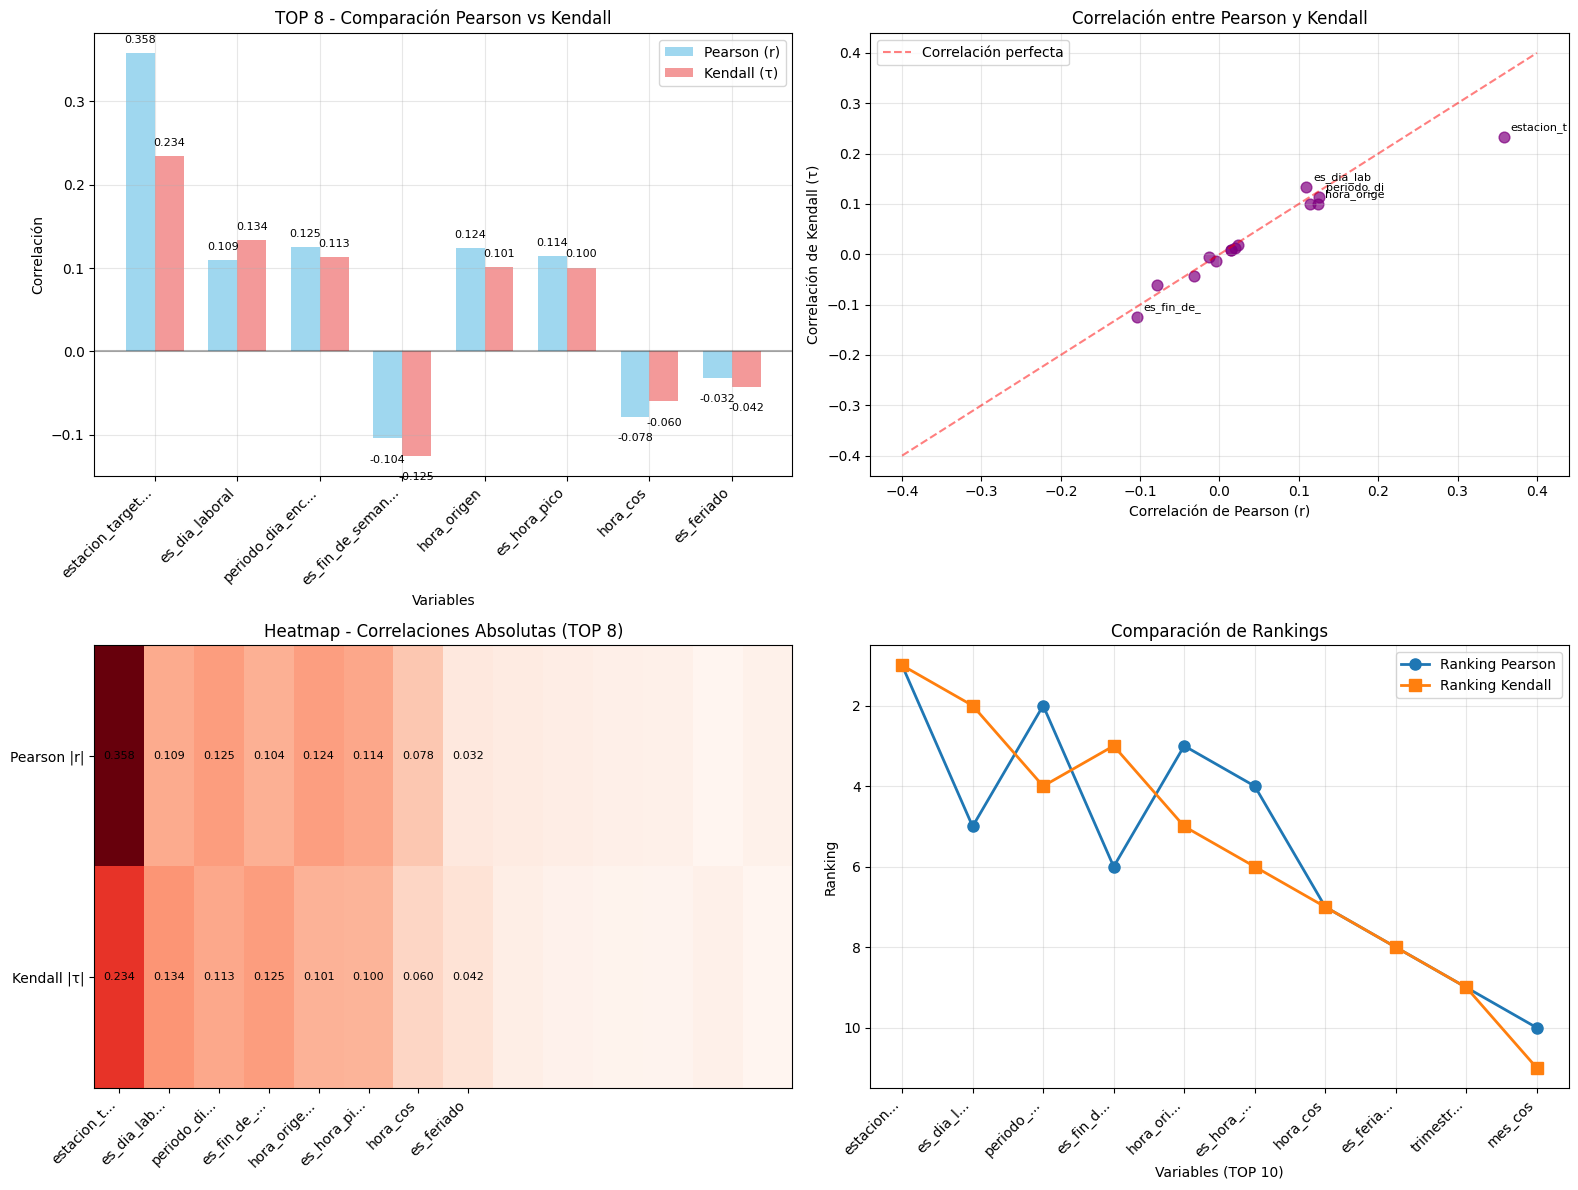

\nüìà Estad√≠sticas Adicionales:
   ‚Ä¢ Correlaci√≥n entre Pearson y Kendall: 0.9675
   ‚Ä¢ Variable con mayor correlaci√≥n Pearson: estacion_target_encoded (r = 0.3580)
   ‚Ä¢ Variable con mayor correlaci√≥n Kendall: estacion_target_encoded (œÑ = 0.2339)
   ‚Ä¢ Promedio correlaci√≥n absoluta Pearson: 0.0810
   ‚Ä¢ Promedio correlaci√≥n absoluta Kendall: 0.0696


In [213]:
# PASO 5: Visualizaci√≥n de correlaciones
print("\\nüìä PASO 5: Visualizaci√≥n de Correlaciones")
print("="*50)

# Configuramos el estilo
plt.style.use('default')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Gr√°fico de barras comparativo
variables_top = df_comparacion.head(8)['Variable'].tolist()
pearson_vals = df_comparacion.head(8)['Correlacion_Pearson'].tolist()
kendall_vals = df_comparacion.head(8)['Correlacion_Kendall'].tolist()

x_pos = np.arange(len(variables_top))
width = 0.35

bars1 = ax1.bar(x_pos - width/2, pearson_vals, width, label='Pearson (r)', alpha=0.8, color='skyblue')
bars2 = ax1.bar(x_pos + width/2, kendall_vals, width, label='Kendall (œÑ)', alpha=0.8, color='lightcoral')

ax1.set_xlabel('Variables')
ax1.set_ylabel('Correlaci√≥n')
ax1.set_title('TOP 8 - Comparaci√≥n Pearson vs Kendall')
ax1.set_xticks(x_pos)
ax1.set_xticklabels([var[:15] + '...' if len(var) > 15 else var for var in variables_top], rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Agregar valores en las barras
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + (0.01 if height > 0 else -0.02),
             f'{height:.3f}', ha='center', va='bottom' if height > 0 else 'top', fontsize=8)
for bar in bars2:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + (0.01 if height > 0 else -0.02),
             f'{height:.3f}', ha='center', va='bottom' if height > 0 else 'top', fontsize=8)

# 2. Scatter plot de correlaciones
ax2.scatter(df_comparacion['Correlacion_Pearson'], df_comparacion['Correlacion_Kendall'], 
           alpha=0.7, s=60, color='purple')
ax2.plot([-0.4, 0.4], [-0.4, 0.4], 'r--', alpha=0.5, label='Correlaci√≥n perfecta')
ax2.set_xlabel('Correlaci√≥n de Pearson (r)')
ax2.set_ylabel('Correlaci√≥n de Kendall (œÑ)')
ax2.set_title('Correlaci√≥n entre Pearson y Kendall')
ax2.grid(True, alpha=0.3)
ax2.legend()

# Anotar puntos m√°s relevantes
for i, row in df_comparacion.head(5).iterrows():
    ax2.annotate(row['Variable'][:10], 
                (row['Correlacion_Pearson'], row['Correlacion_Kendall']),
                xytext=(5, 5), textcoords='offset points', fontsize=8)

# 3. Heatmap de correlaciones absolutas
corr_matrix = np.array([df_comparacion['Correlacion_Pearson'].abs().values, 
                       df_comparacion['Correlacion_Kendall'].abs().values])
im = ax3.imshow(corr_matrix, cmap='Reds', aspect='auto')

# Configurar labels del heatmap
ax3.set_xticks(range(len(variables_top)))
ax3.set_xticklabels([var[:10] + '...' if len(var) > 10 else var for var in df_comparacion.head(8)['Variable']], 
                   rotation=45, ha='right')
ax3.set_yticks([0, 1])
ax3.set_yticklabels(['Pearson |r|', 'Kendall |œÑ|'])
ax3.set_title('Heatmap - Correlaciones Absolutas (TOP 8)')

# Agregar valores en el heatmap
for i in range(2):
    for j in range(min(8, len(df_comparacion))):
        text = ax3.text(j, i, f'{corr_matrix[i, j]:.3f}',
                       ha="center", va="center", color="black", fontsize=8)

# 4. Ranking comparison
rankings_df = df_comparacion.head(10)[['Variable', 'Ranking_Pearson', 'Ranking_Kendall']].copy()
ax4.plot(rankings_df['Ranking_Pearson'], 'o-', label='Ranking Pearson', markersize=8, linewidth=2)
ax4.plot(rankings_df['Ranking_Kendall'], 's-', label='Ranking Kendall', markersize=8, linewidth=2)
ax4.set_xlabel('Variables (TOP 10)')
ax4.set_ylabel('Ranking')
ax4.set_title('Comparaci√≥n de Rankings')
ax4.set_xticks(range(len(rankings_df)))
ax4.set_xticklabels([var[:8] + '...' if len(var) > 8 else var for var in rankings_df['Variable']], 
                   rotation=45, ha='right')
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.invert_yaxis()  # Invertir para que el ranking 1 est√© arriba

plt.tight_layout()
plt.show()

# Estad√≠sticas adicionales
print(f"\\nüìà Estad√≠sticas Adicionales:")
print(f"   ‚Ä¢ Correlaci√≥n entre Pearson y Kendall: {np.corrcoef(df_comparacion['Correlacion_Pearson'], df_comparacion['Correlacion_Kendall'])[0,1]:.4f}")
print(f"   ‚Ä¢ Variable con mayor correlaci√≥n Pearson: {df_pearson.iloc[0]['Variable']} (r = {df_pearson.iloc[0]['Correlacion_Pearson']:.4f})")
print(f"   ‚Ä¢ Variable con mayor correlaci√≥n Kendall: {df_kendall.iloc[0]['Variable']} (œÑ = {df_kendall.iloc[0]['Correlacion_Kendall']:.4f})")
print(f"   ‚Ä¢ Promedio correlaci√≥n absoluta Pearson: {df_pearson['Correlacion_Abs'].mean():.4f}")
print(f"   ‚Ä¢ Promedio correlaci√≥n absoluta Kendall: {df_kendall['Correlacion_Abs'].mean():.4f}")

In [214]:
# PASO 6: Comparaci√≥n con el enfoque PCA
print("\\nüîÑ PASO 6: Comparaci√≥n entre An√°lisis de Correlaci√≥n y PCA")
print("="*60)

print("üìã RESUMEN COMPARATIVO DE ENFOQUES:")
print("="*60)

# Informaci√≥n del PCA (que ya calculamos anteriormente)
print("\\nüîπ ENFOQUE PCA:")
print(f"   ‚Ä¢ Componentes principales: 7")
print(f"   ‚Ä¢ Varianza explicada: 82.3%")
print(f"   ‚Ä¢ Variables originales: 14")
print(f"   ‚Ä¢ Reducci√≥n de dimensionalidad: {(1-7/14)*100:.1f}%")
print(f"   ‚Ä¢ Enfoque: Transformaci√≥n lineal que captura m√°xima varianza")

# Informaci√≥n del an√°lisis de correlaci√≥n
variables_importantes_pearson = df_pearson[df_pearson['Correlacion_Abs'] > 0.1]
variables_importantes_kendall = df_kendall[df_kendall['Correlacion_Abs'] > 0.1]
variables_importantes_consenso = df_comparacion[df_comparacion['Promedio_Correlacion_Abs'] > 0.1]

print("\\nüîπ ENFOQUE CORRELACI√ìN:")
print(f"   ‚Ä¢ Variables importantes (Pearson |r| > 0.1): {len(variables_importantes_pearson)}")
print(f"   ‚Ä¢ Variables importantes (Kendall |œÑ| > 0.1): {len(variables_importantes_kendall)}")
print(f"   ‚Ä¢ Variables importantes (Consenso): {len(variables_importantes_consenso)}")
print(f"   ‚Ä¢ Variable m√°s predictiva: estacion_target_encoded")
print(f"   ‚Ä¢ Enfoque: Selecci√≥n de caracter√≠sticas basada en relaci√≥n con target")

print("\\nüìä VARIABLES M√ÅS IMPORTANTES POR CONSENSO:")
print("-"*60)
for i, row in variables_importantes_consenso.iterrows():
    print(f"   {i+1:2d}. {row['Variable']:<25} | Prom: {row['Promedio_Correlacion_Abs']:.4f}")

print("\\nüéØ RECOMENDACIONES SEG√öN CADA ENFOQUE:")
print("-"*60)

print("\\nüî∏ Para REDUCCI√ìN DE DIMENSIONALIDAD (PCA):")
print("   ‚úÖ Usar cuando:")
print("     ‚Ä¢ Necesitas reducir dimensiones preservando varianza")
print("     ‚Ä¢ Las variables est√°n correlacionadas entre s√≠")
print("     ‚Ä¢ Quieres evitar multicolinealidad")
print("     ‚Ä¢ El objetivo es reducir ruido y overfitting")
print("   üìå Resultado: 7 componentes que explican 82.3% de varianza")

print("\\nüî∏ Para SELECCI√ìN DE CARACTER√çSTICAS (Correlaci√≥n):")
print("   ‚úÖ Usar cuando:")
print("     ‚Ä¢ Necesitas interpretabilidad de variables originales")
print("     ‚Ä¢ Quieres identificar las variables m√°s predictivas")
print("     ‚Ä¢ El dominio requiere explicabilidad")
print("     ‚Ä¢ Hay limitaciones computacionales")
print(f"   üìå Resultado: {len(variables_importantes_consenso)} variables m√°s importantes identificadas")

# An√°lisis final
print("\\nüîç AN√ÅLISIS FINAL:")
print("-"*60)
print("   üèÜ Variable MVP: 'estacion_target_encoded' (encoding de estaci√≥n)")
print("   üìà Correlaci√≥n m√°s alta: r=0.358 (Pearson), œÑ=0.234 (Kendall)")
print("   ‚≠ê Variables consistentes en ambos m√©todos de correlaci√≥n:")
for var in variables_importantes_consenso.head(5)['Variable']:
    print(f"     ‚Ä¢ {var}")

print("\\nüí° CONCLUSI√ìN:")
print("   ‚Ä¢ PCA: Ideal para reducci√≥n dimensional manteniendo informaci√≥n")
print("   ‚Ä¢ Correlaci√≥n: Ideal para selecci√≥n interpretable de caracter√≠sticas")
print("   ‚Ä¢ Ambos enfoques son complementarios seg√∫n el objetivo del modelo")

\nüîÑ PASO 6: Comparaci√≥n entre An√°lisis de Correlaci√≥n y PCA
üìã RESUMEN COMPARATIVO DE ENFOQUES:
\nüîπ ENFOQUE PCA:
   ‚Ä¢ Componentes principales: 7
   ‚Ä¢ Varianza explicada: 82.3%
   ‚Ä¢ Variables originales: 14
   ‚Ä¢ Reducci√≥n de dimensionalidad: 50.0%
   ‚Ä¢ Enfoque: Transformaci√≥n lineal que captura m√°xima varianza
\nüîπ ENFOQUE CORRELACI√ìN:
   ‚Ä¢ Variables importantes (Pearson |r| > 0.1): 6
   ‚Ä¢ Variables importantes (Kendall |œÑ| > 0.1): 6
   ‚Ä¢ Variables importantes (Consenso): 6
   ‚Ä¢ Variable m√°s predictiva: estacion_target_encoded
   ‚Ä¢ Enfoque: Selecci√≥n de caracter√≠sticas basada en relaci√≥n con target
\nüìä VARIABLES M√ÅS IMPORTANTES POR CONSENSO:
------------------------------------------------------------
    1. estacion_target_encoded   | Prom: 0.2959
    2. es_dia_laboral            | Prom: 0.1214
    3. periodo_dia_encoded       | Prom: 0.1190
    4. es_fin_de_semana          | Prom: 0.1146
    5. hora_origen               | Prom: 0.1123
    